# Comisiones legislativas 

Las comisiones legislativas son órganos de asesoramiento existentes en ambas Cámaras del Congreso de la Nación. Estan integradas por legísladores, asesores y personal de planta. Su función es estudiar los proyectos de ley y producir dictámenes sobre los mísmos. Pueden ser permanentes o especiales.

Las comisiones de asesoramiento permanente se dedican a estudiar todos los proyectos de ley ingresados a través de la Cámara de Diputados o del Senado de la Nación. Cada comisión es especialista en un tema específico como salud, educación, economía y trabajo. Por lo general, todos los proyectos de ley presentados son derivados a una o varias comisiones para que los especialistas puedan analizarlos y elaborar un dictamen. En la Cámara de Diputados hay cuarenta y cinco comisiones permanentes de asesoramiento (45).

Órgano de asesoramiento no permanentes creadas para el estudio de un asunto determinado o en los casos que la Cámara estime conveniente o en aquellos que no estén previstos en el reglamento. Se forman de manera extraordinaria para atender asuntos que exceden por su tópico o tratamiento a las permanentes, pudiendo ser unicamerales (integradas solo por Diputados) o bicamerales (integradas por diputados y senadores).

Las Comisiones especiales son creadas por Ley o por Resolución, con un motivo determinado y pueden tener un plazo prorrogable o no. Pueden ser unicamerales o bicamerales.

Fuente de datos:
* Comisiones: https://www.hcdn.gob.ar/comisiones/index.html
* https://datos.hcdn.gob.ar/dataset/comisiones
* https://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION%20%E2%80%93%20COMISIONES.pdf




In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import pickle
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import os

# https://pypi.org/project/textacy/
import textacy
import textacy.preprocessing as tprep

# Configurar path
os.chdir('C:/iamas_datos2024/proyectos_parlamentarios/')
pd.set_option('display.max_colwidth', None)

In [2]:
"""
Para probar
print(tprep.normalize.quotation_marks('hola como "va2"'))
print(tprep.normalize.whitespace(' hola  casa    vale ') )
print(len(tprep.normalize.whitespace(' hola  casa    vale ')), len(' hola  casa    vale ') )
print(tprep.normalize.unicode('cumpleaño cómo qué'))
tprep.remove.accents('cumpleaño cómo qué')

print(tprep.remove.punctuation('cas ley 34.89') )
t = 'BICAMERAL ESPECIAL INVESTIGADORA SUBMARINO ARA SAN JUAN LEY 27 433'
print(tprep.normalize.whitespace(t))
print('LEY 27.433'.replace('.',''))
"""

'\nPara probar\nprint(tprep.normalize.quotation_marks(\'hola como "va2"\'))\nprint(tprep.normalize.whitespace(\' hola  casa    vale \') )\nprint(len(tprep.normalize.whitespace(\' hola  casa    vale \')), len(\' hola  casa    vale \') )\nprint(tprep.normalize.unicode(\'cumpleaño cómo qué\'))\ntprep.remove.accents(\'cumpleaño cómo qué\')\n\nprint(tprep.remove.punctuation(\'cas ley 34.89\') )\nt = \'BICAMERAL ESPECIAL INVESTIGADORA SUBMARINO ARA SAN JUAN LEY 27 433\'\nprint(tprep.normalize.whitespace(t))\nprint(\'LEY 27.433\'.replace(\'.\',\'\'))\n'

In [3]:
# Para limpiar nombres
def normalizar(text):
    try: 
       #text = tprep.normalize.hyphenated_words(text)
       # Elimina los acentos de cualquier carácter Unicode acentuado en el texto, ya sea reemplazándolos con equivalentes ASCII o eliminándolos por completo. 
       text = tprep.remove.accents(text)
       # Por tema de leyes y números 
       text = text.replace('.','') 
       # Elimine la puntuación del texto reemplazando todas las instancias de puntuación (o un subconjunto de la misma especificada por solamente) con espacios en blanco. 
       text = tprep.remove.punctuation(text) # ojo que lo reemplaza por espacio, por eso mejor normalize.whitespace al final
       ## Elimina los espacios
       #text = text.strip() 
       # Reemplza comillas simples y dobles a solo los equivalentes básicos de ASCII. 
       text = tprep.normalize.quotation_marks(text)
       # Normaliza los caracteres Unicode del texto en formas canónicas. 
       text = tprep.normalize.unicode(text)
       # Reemplaza espacios respetando la división entre palabras 
       text = tprep.normalize.whitespace(text) 
    
    except:
        print("Hubo un error")
    
    return text


### 1 - Lectura y Normalización de nombres de comisiones

In [4]:
# Documentación	http://www4.hcdn.gob.ar/Datos_doc/DOCUMENTACION – COMISIONES.pdf
# Responsable	Dirección de Información Parlamentaria
# Versión	1.0
# Última actualización	21 de marzo de 2024, 11:38 (UTC-03:00)
# Creado	5 de junio de 2018, 11:03 (UTC-03:00)
# Frecuencia de actualización	Eventual
comisiones_df = pd.read_csv('diputados/comisiones1.9.csv',encoding='latin-1') #  'utf-8' codec can't decode byte 0xd1 in position 1619: invalid continuation byte
display(comisiones_df.head())
display(comisiones_df.describe(include='all'))

id  \
0  HCDN00014   
1  HCDN00015   
2  HCDN00016   
3  HCDN00020   
4  HCDN00022   

                                                           comision_nombre  \
0        ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC. DE OBRAS VIALES   
1  ESPECIAL INVESTIGADORA DE HECHOS ILICITOS Y CORRUPCION CONTRA EL ESTADO   
2             ESPECIAL INVESTIGADORA CONTRATACIONES ESTADO ARGENTINO - IBM   
3                ESPECIAL INVESTIGADORA ADMINISTRACION NACIONAL DE ADUANAS   
4                                                      ASUNTOS MUNICIPALES   

  comision_grupo  periodo_inicio  periodo_finaliacion fecha_inicio  \
0             CD             116                  999   01/03/1998   
1             CD             116                  999   01/03/1998   
2             CD             116                  999   01/03/1998   
3             CD             116                  999   01/03/1998   
4             CD             116                  999   01/03/1998   

  fecha_finalizacion Tipo de ComisiÃ³n  
0                  0                 E  
1                  0                 E  
2                  0                 E  
3                  0                 E  
4                  0                 P

id  \
count          55   
unique         55   
top     HCDN00014   
freq            1   
mean          NaN   
std           NaN   
min           NaN   
25%           NaN   
50%           NaN   
75%           NaN   
max           NaN   

                                                          comision_nombre  \
count                                                                  55   
unique                                                                 55   
top     ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC. DE OBRAS VIALES   
freq                                                                    1   
mean                                                                  NaN   
std                                                                   NaN   
min                                                                   NaN   
25%                                                                   NaN   
50%                                                                   NaN   
75%                                                                   NaN   
max                                                                   NaN   

       comision_grupo  periodo_inicio  periodo_finaliacion fecha_inicio  \
count              55       55.000000            55.000000           55   
unique              1             NaN                  NaN           11   
top                CD             NaN                  NaN   01/03/1998   
freq               55             NaN                  NaN           43   
mean              NaN      118.218182           983.327273          NaN   
std               NaN        5.279909           116.232056          NaN   
min               NaN      116.000000           137.000000          NaN   
25%               NaN      116.000000           999.000000          NaN   
50%               NaN      116.000000           999.000000          NaN   
75%               NaN      116.000000           999.000000          NaN   
max               NaN      137.000000           999.000000          NaN   

       fecha_finalizacion Tipo de ComisiÃ³n  
count                  55                55  
unique                  2                 2  
top                     0                 P  
freq                   54                46  
mean                  NaN               NaN  
std                   NaN               NaN  
min                   NaN               NaN  
25%                   NaN               NaN  
50%                   NaN               NaN  
75%                   NaN               NaN  
max                   NaN               NaN

In [5]:
comisiones_df['comision_nombre_norm'] = comisiones_df['comision_nombre']
comisiones_df['comision_nombre_norm'] = comisiones_df['comision_nombre_norm'].apply(normalizar)

In [6]:
comisiones_df['comision_nombre_norm'].describe()

count                                                                   55
unique                                                                  55
top       ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC DE OBRAS VIALES
freq                                                                     1
Name: comision_nombre_norm, dtype: object

**Observaciones**
* La Cámara de Diputados cuenta actualmente con 46 comisiones permanentes, mostrando un marcado crecimiento desde 1983, cuando
contaba con sólo 26 comisiones. En promedio los legisladores participan en cinco comisiones, si bien algunos llegan a hacerlo en 10 comisiones
(Tchintian, Abdala y Bertazzo, 2021: 8). PÁG 246 de https://revista.saap.org.ar/contenido/revista-v17-n2/rsaap.17.2.a2.pdf
* En el dataset se observa que de las 55 comisiones con información, que llamaremos base, 43 inician en el 01/03/1998.



In [7]:
# Guardamos el archivo binario
with open('comisiones1.9_20241031.pkl', 'wb') as file:
    pickle.dump(comisiones_df,file)

In [8]:
# Giro a comisiones, con información de iniciativa y comisión
# Última actualización de los metadatos	Agosto 8, 2019
girocom_df = pd.read_csv('diputados/giro_comisiones1.9.csv')
print('Tamaño de dataset de Giro a comisiones:',girocom_df.shape)
display(girocom_df.head(2))
display(girocom_df.describe(include='all').T)

Tamaño de dataset de Giro a comisiones: (392092, 3)


proyecto_id         comision  orden
0  HCDN000000     SOBRE TABLAS      1
1  HCDN001090  OBRAS PUBLICAS       1

count  unique                     top   freq     mean  \
proyecto_id    392092  259585              HCDN061700     13      NaN   
comision       392092     195  PRESUPUESTO Y HACIENDA  45771      NaN   
orden        392092.0     NaN                     NaN    NaN  1.48154   

                  std  min  25%  50%  75%   max  
proyecto_id       NaN  NaN  NaN  NaN  NaN   NaN  
comision          NaN  NaN  NaN  NaN  NaN   NaN  
orden        0.805362  1.0  1.0  1.0  2.0  13.0

In [9]:
# Clean
girocom_df['comision_nombre_norm'] = girocom_df['comision']
girocom_df['comision_nombre_norm'] = girocom_df['comision_nombre_norm'].apply(normalizar)

In [10]:
# Normalizando ´nombre de comisión de 195 únicos nombres a 149 únicos nombres
girocom_df['comision_nombre_norm'].describe()

count                     392092
unique                       148
top       PRESUPUESTO Y HACIENDA
freq                       46530
Name: comision_nombre_norm, dtype: object

Utiliza la distancia de Levenshtein para calcular las diferencias entre secuencias o string

In [11]:
# libreria
from fuzzywuzzy import fuzz 
from fuzzywuzzy import process 

C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [12]:
# https://pypi.org/project/fuzzywuzzy/
# https://www.geeksforgeeks.org/how-to-do-fuzzy-matching-on-pandas-dataframe-column-using-python/

# Brindar un dataframe con los calculos de similitud de palabras por la distancia de Levenshtein 
def fuzzy_get(list1,list2, name = 'comision_nombre_norm', extractOne = True):
    
    mat = [] 

    try:
        dframe = pd.DataFrame(list1)
        # Iterando la lista1
        for i in list1: 
            # genero la lista de palabras a comparar
            list3 = [ x  for x in list2 if x!= i] 
            # Busco la primera palabra más alta mediante el calculo de scorer token_sort_ratio
            if (extractOne):
                fuzz_get = process.extractOne(i, list3, scorer=fuzz.token_sort_ratio)
            else:
                fuzz_get = process.extract(i, list3, scorer=fuzz.token_sort_ratio, limit = 10)
                
            # Agrego tupla a lista
            mat.append(fuzz_get) 
        if (extractOne):
            dframe[['matches','score']] = mat
            dframe.columns = [name, 'fuzz_match', 'fuzz_score']
        else: 
            dframe['matches'] = mat
            dframe.columns = [name, 'fuzz_match']
            

    except  Exception  as e:
       
        print("Hay error: Controlar los argumentos considerados como lista de palabras de string, nombre, score")
        print(e)
    else:
        print(f"Se logro encontrar similitudes {dframe.info()}")
    finally:
        print("** Proceso finalizado **")
    return dframe

In [13]:
# Lista de comisiones indicadas en los giros de proyectos
comision_list = girocom_df['comision_nombre_norm'].unique()
print(comision_list)

['SOBRE TABLAS' 'OBRAS PUBLICAS' 'PRESUPUESTO Y HACIENDA' 'TURISMO'
 'ASUNTOS CONSTITUCIONALES' 'INTERIOR Y JUSTICIA' 'ECONOMIA'
 'RECURSOS HIDRICOS' 'ECOLOGIA Y DESARROLLO HUMANO' 'LEGISLACION GENERAL'
 'RECURSOS NATURALES Y CONSERVACION DEL AMBIENTE HUMANO'
 'INTERESES MARITIMOS FLUVIALES PESQUEROS Y PORTUARIOS'
 'DEFENSA DEL CONSUMIDOR' 'FAMILIA MUJER Y MINORIDAD' 'DEPORTES'
 'COMERCIO' 'DEFENSA NACIONAL' 'ASUNTOS MUNICIPALES'
 'AGRICULTURA Y GANADERIA' 'COMUNICACIONES E INFORMATICA' 'FINANZAS'
 'ACCION SOCIAL Y SALUD PUBLICA' 'EDUCACION'
 'ECONOMIAS Y DESARROLLO REGIONAL' 'ENERGIA Y COMBUSTIBLES' 'CULTURA'
 'MINERIA' 'POBLACION Y RECURSOS HUMANOS' 'DROGADICCION' 'JUSTICIA'
 'SEGURIDAD INTERIOR' 'LEGISLACION DEL TRABAJO' 'DISCAPACIDAD' 'INDUSTRIA'
 'LABOR PARLAMENTARIA' 'PEQUENAS Y MEDIANAS EMPRESAS'
 'VIVIENDA Y ORDENAMIENTO URBANO' 'TRANSPORTES' 'LEGISLACION PENAL'
 'DERECHOS HUMANOS Y GARANTIAS' 'TRABAJO Y PREVISION SOCIAL'
 'ASUNTOS PENALES Y REGIMENES CARCELARIOS' 'COMUNICACION

In [14]:
# Primera busqueda de similitud de nombres de comisiones
listx = comision_list.copy()
dframe1 = fuzzy_get(listx, listx.copy(),'comision_nombre_norm', True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   comision_nombre_norm  148 non-null    object
 1   fuzz_match            148 non-null    object
 2   fuzz_score            148 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
Se logro encontrar similitudes None
** Proceso finalizado **


In [15]:
dframe1.head(2)

comision_nombre_norm           fuzz_match fuzz_score
0         SOBRE TABLAS       OBRAS PUBLICAS         62
1       OBRAS PUBLICAS  ASUNTOS MUNICIPALES         48

#### Comisiones relacionadas por similitud de nombre, > 80 (cálculo de distancia Levenshtein y selección 1 a 1 por máx. similitud) 

In [16]:
dframe1[dframe1.fuzz_score>80].sort_values(by = 'fuzz_score', ascending = False)

comision_nombre_norm  \
145    BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061   
138        BICAMERAL DE LOS DERECHOS DE NINAS NINOS Y ADOLESCENTES LEY 26061   
113  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO   
110  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 124 DEL REGLAMENTO H SENADO   
14                                                                  DEPORTES   
128                                                                  DEPORTE   
18                                                   AGRICULTURA Y GANADERIA   
104                                            AGRICULTURA GANADERIA Y PESCA   
129     ECONOMIAS REGIONALES ECONOMIA SOCIAL MICRO PEQUENA Y MEDIANA EMPRESA   
96                      ECONOMIAS REGIONALES MICRO PEQUENA Y MEDIANA EMPRESA   
97                                             POBLACION Y DESARROLLO HUMANO   
13                                                 FAMILIA MUJER Y MINORIDAD   
63                                                       FAMILIA Y MINORIDAD   
75                                                    POBLACION Y DESARROLLO   
61                                           MICRO PEQUENA Y MEDIANA EMPRESA   
111                                           MINERIA ENERGIA Y COMBUSTIBLES   
35                                              PEQUENAS Y MEDIANAS EMPRESAS   
24                                                    ENERGIA Y COMBUSTIBLES   
46                                         ASISTENCIA SOCIAL Y SALUD PUBLICA   
21                                             ACCION SOCIAL Y SALUD PUBLICA   
62                                                      DERECHOS Y GARANTIAS   
39                                              DERECHOS HUMANOS Y GARANTIAS   

                                                                  fuzz_match  \
145        BICAMERAL DE LOS DERECHOS DE NINAS NINOS Y ADOLESCENTES LEY 26061   
138    BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061   
113  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 124 DEL REGLAMENTO H SENADO   
110  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO   
14                                                                   DEPORTE   
128                                                                 DEPORTES   
18                                             AGRICULTURA GANADERIA Y PESCA   
104                                                  AGRICULTURA Y GANADERIA   
129                     ECONOMIAS REGIONALES MICRO PEQUENA Y MEDIANA EMPRESA   
96      ECONOMIAS REGIONALES ECONOMIA SOCIAL MICRO PEQUENA Y MEDIANA EMPRESA   
97                                                    POBLACION Y DESARROLLO   
13                                                       FAMILIA Y MINORIDAD   
63                                                 FAMILIA MUJER Y MINORIDAD   
75                                             POBLACION Y DESARROLLO HUMANO   
61                                              PEQUENAS Y MEDIANAS EMPRESAS   
111                                                   ENERGIA Y COMBUSTIBLES   
35                                           MICRO PEQUENA Y MEDIANA EMPRESA   
24                                            MINERIA ENERGIA Y COMBUSTIBLES   
46                                             ACCION SOCIAL Y SALUD PUBLICA   
21                                         ASISTENCIA SOCIAL Y SALUD PUBLICA   
62                                              DERECHOS HUMANOS Y GARANTIAS   
39                                                      DERECHOS Y GARANTIAS   

    fuzz_score  
145         97  
138         97  
113         97  
110         97  
14          93  
128         93  
18          88  
104         88  
129         87  
96          87  
97          86  
13          86  
63          86  
75          86  
61          85  
111         85  
35          85  
24          85  
46          84  
21          84  
62          83  


In [17]:
# Diccionario de limpieza
ids = {'Id':['BICAMERAL DE LOS DERECHOS DE NINAS NINOS Y ADOLESCENTES LEY 26061','DEPORTES'],
      'fuzzy':['BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061','DEPORTE']}

ids = dict(zip(ids['Id'], ids['fuzzy']))
print (ids)


{'BICAMERAL DE LOS DERECHOS DE NINAS NINOS Y ADOLESCENTES LEY 26061': 'BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061', 'DEPORTES': 'DEPORTE'}


In [18]:
# Reemplazamos en base a fuzzy
girocom_df['comision_nombre_norm'] = girocom_df['comision_nombre_norm'].replace(ids, regex=True)

In [19]:
# Reemplazamos en base a fuzzy
comisiones_df['comision_nombre_norm'] = comisiones_df['comision_nombre_norm'].replace(ids, regex=True)

In [20]:
print('test 1:',girocom_df[girocom_df['comision_nombre_norm'].str.contains('BICAMERAL DE LOS DERECHOS DE NINAS NINOS')])
print('test 2:',girocom_df[girocom_df['comision_nombre_norm'].str.contains('DEPORTES')])

test 1: Empty DataFrame
Columns: [proyecto_id, comision, orden, comision_nombre_norm]
Index: []
test 2: Empty DataFrame
Columns: [proyecto_id, comision, orden, comision_nombre_norm]
Index: []


In [21]:
# Dado a que se modificaron los nombres por reg. Corremos nuevamente fuzzy
# Segunda búsqueda de similitud de nombres de comisiones . 146 NOMBRES
comision_list2 = girocom_df['comision_nombre_norm'].unique()
listx = comision_list2.copy()
dframe1 = fuzzy_get(listx, listx.copy(),'comision_nombre_norm', True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   comision_nombre_norm  146 non-null    object
 1   fuzz_match            146 non-null    object
 2   fuzz_score            146 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
Se logro encontrar similitudes None
** Proceso finalizado **


In [22]:
#dframe1[dframe1.comision_nombre_norm.str.contains('DEPORTES')]

In [23]:
# Están fuertemente relacionadas 
dframe1[dframe1.fuzz_score>80].sort_values(by = 'fuzz_score', ascending = False)

comision_nombre_norm  \
113  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO   
110  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 124 DEL REGLAMENTO H SENADO   
18                                                   AGRICULTURA Y GANADERIA   
104                                            AGRICULTURA GANADERIA Y PESCA   
128     ECONOMIAS REGIONALES ECONOMIA SOCIAL MICRO PEQUENA Y MEDIANA EMPRESA   
96                      ECONOMIAS REGIONALES MICRO PEQUENA Y MEDIANA EMPRESA   
97                                             POBLACION Y DESARROLLO HUMANO   
75                                                    POBLACION Y DESARROLLO   
13                                                 FAMILIA MUJER Y MINORIDAD   
63                                                       FAMILIA Y MINORIDAD   
61                                           MICRO PEQUENA Y MEDIANA EMPRESA   
35                                              PEQUENAS Y MEDIANAS EMPRESAS   
24                                                    ENERGIA Y COMBUSTIBLES   
111                                           MINERIA ENERGIA Y COMBUSTIBLES   
46                                         ASISTENCIA SOCIAL Y SALUD PUBLICA   
21                                             ACCION SOCIAL Y SALUD PUBLICA   
62                                                      DERECHOS Y GARANTIAS   
39                                              DERECHOS HUMANOS Y GARANTIAS   

                                                                  fuzz_match  \
113  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 124 DEL REGLAMENTO H SENADO   
110  AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO   
18                                             AGRICULTURA GANADERIA Y PESCA   
104                                                  AGRICULTURA Y GANADERIA   
128                     ECONOMIAS REGIONALES MICRO PEQUENA Y MEDIANA EMPRESA   
96      ECONOMIAS REGIONALES ECONOMIA SOCIAL MICRO PEQUENA Y MEDIANA EMPRESA   
97                                                    POBLACION Y DESARROLLO   
75                                             POBLACION Y DESARROLLO HUMANO   
13                                                       FAMILIA Y MINORIDAD   
63                                                 FAMILIA MUJER Y MINORIDAD   
61                                              PEQUENAS Y MEDIANAS EMPRESAS   
35                                           MICRO PEQUENA Y MEDIANA EMPRESA   
24                                            MINERIA ENERGIA Y COMBUSTIBLES   
111                                                   ENERGIA Y COMBUSTIBLES   
46                                             ACCION SOCIAL Y SALUD PUBLICA   
21                                         ASISTENCIA SOCIAL Y SALUD PUBLICA   
62                                              DERECHOS HUMANOS Y GARANTIAS   
39                                                      DERECHOS Y GARANTIAS   

    fuzz_score  
113         97  
110         97  
18          88  
104         88  
128         87  
96          87  
97          86  
75          86  
13          86  
63          86  
61          85  
35          85  
24          85  
111         85  
46          84  
21          84  
62          83  
39          83

In [24]:
# Guardamos el archivo binario comisiones relacionadas por similitud de nombre
with open('comision_fuzz_20241031.pkl', 'wb') as file:
    pickle.dump(dframe1,file)

In [25]:
# # Guardamos el archivo binario
with open('girocomisiones1.9_20241031.pkl', 'wb') as file:
    pickle.dump(girocom_df,file)

**Observaciones**
* Se identifican en datos abiertos de proyectos girados a comisión, 146 nombres de comisión normalizados, de 149 únicos.
* PRESUPUESTO Y HACIENDA es la comisión en donde se gira la mayoría de los proyectos.
* Se identifican proyectos con un máximo de 13 giros a comisiones.

### 2 - Identificación de comisiones de salud

In [26]:
# Palabra clave
palabra = 'SALUD'

In [27]:
# Nombre de comisión permanente 'P'
comisiones_df[comisiones_df['comision_nombre_norm'].str.contains(palabra)]

id                comision_nombre comision_grupo  periodo_inicio  \
30  HCDN00053  ACCION SOCIAL Y SALUD PUBLICA             CD             116   

    periodo_finaliacion fecha_inicio fecha_finalizacion Tipo de ComisiÃ³n  \
30                  999   01/03/1998                  0                 P   

             comision_nombre_norm  
30  ACCION SOCIAL Y SALUD PUBLICA

In [28]:
# Se identifican 4 comisiones
salud_list = girocom_df.loc[girocom_df['comision_nombre_norm'].str.contains(palabra),'comision_nombre_norm'].unique()
salud_list

array(['ACCION SOCIAL Y SALUD PUBLICA',
       'ASISTENCIA SOCIAL Y SALUD PUBLICA', 'SALUD Y DEPORTE', 'SALUD'],
      dtype=object)

In [29]:
# Por fuzzy
dframe1[dframe1['comision_nombre_norm'].str.contains(palabra)]

comision_nombre_norm                         fuzz_match  \
21       ACCION SOCIAL Y SALUD PUBLICA  ASISTENCIA SOCIAL Y SALUD PUBLICA   
46   ASISTENCIA SOCIAL Y SALUD PUBLICA      ACCION SOCIAL Y SALUD PUBLICA   
89                     SALUD Y DEPORTE                            DEPORTE   
126                              SALUD                    SALUD Y DEPORTE   

    fuzz_score  
21          84  
46          84  
89          64  
126         50

In [30]:
# Analizo las cuatro comisiones y busco similitud de nombre tal que tomen los top 10 score para cada comision
listx = girocom_df['comision_nombre_norm'].unique()
salud_dframe = fuzzy_get(salud_list, listx.copy(),'comision_nombre_norm', False)
salud_dframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   comision_nombre_norm  4 non-null      object
 1   fuzz_match            4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes
Se logro encontrar similitudes None
** Proceso finalizado **


comision_nombre_norm  \
0      ACCION SOCIAL Y SALUD PUBLICA   
1  ASISTENCIA SOCIAL Y SALUD PUBLICA   
2                    SALUD Y DEPORTE   
3                              SALUD   

                                                                                                                                                                                                                                                                                                                                                     fuzz_match  
0                                [(ASISTENCIA SOCIAL Y SALUD PUBLICA, 84), (PREVISION Y SEGURIDAD SOCIAL, 60), (OBRAS PUBLICAS, 47), (TRABAJO Y PREVISION SOCIAL, 44), (PRESUPUESTO Y HACIENDA, 43), (DROGADICCION Y NARCOTRAFICO, 43), (FAMILIAS NINEZ Y JUVENTUDES, 43), (INTERIOR Y JUSTICIA, 42), (AGRICULTURA Y GANADERIA, 42), (FAMILIA Y MINORIDAD, 42)]  
1  [(ACCION SOCIAL Y SALUD PUBLICA, 84), (PREVISION Y SEGURIDAD SOCIAL, 52), (FAMILIA MUJER NINEZ Y ADOLESCENCIA, 51), (OBRAS PUBLICAS, 47), (JUSTICIA Y ASUNTOS PENALES, 47), (CIENCIA Y TECNOLOGIA, 45), (EDUCACION CULTURA CIENCIA Y TECNOLOGIA, 45), (PRESUPUESTO Y HACIENDA, 44), (CIENCIA TECNOLOGIA E INNOVACION PRODUCTIVA, 43), (SALUD Y DEPORTE, 42)]  
2                                                                               [(DEPORTE, 64), (SALUD, 50), (TRANSPORTES, 46), (DERECHOS Y GARANTIAS, 46), (MUJERES Y DIVERSIDAD, 46), (LIBERTAD DE EXPRESION, 44), (SEGURIDAD INTERIOR, 42), (PEQUENAS Y MEDIANAS EMPRESAS, 42), (DERECHOS HUMANOS Y GARANTIAS, 42), (ASISTENCIA SOCIAL Y SALUD PUBLICA, 42)]  
3                                                                                                                          [(SALUD Y DEPORTE, 50), (SOBRE TABLAS, 35), (DISCAPACIDAD, 35), (JUSTICIA, 31), (MERCOSUR, 31), (DEFENSA NACIONAL, 29), (AGRICULTURA Y GANADERIA, 29), (ACCION SOCIAL Y SALUD PUBLICA, 29), (INDUSTRIA, 29), (AL ORDEN DEL DIA, 29)]

### 3 - Identificación de CATEGORIAS DE COMISIONES 
####  3.1 Por relación de comisiones mediante similitud de nombre (SNA)

In [31]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Ejemplo
# Grafos no dirigidos con bucles propios
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
# Mediante lista de aristas
G.add_edges_from([(1, 2), (2, 3),(2,1),(1,1)])
print(f'Número de nodos en el gráfo: {len(G.nodes())}')
print(f'Número de aristas en el gráfo: {len(G.edges())}')
print(G.edges())
# nx.selfloop_edges(G): Devuelve un iterador sobre aristas de bucle propio. Una arista de bucle propio tiene el mismo nodo en ambos extremos.
# Se elimina
G.remove_edges_from(nx.selfloop_edges(G))
print(f'Número de nodos en el gráfo: {len(G.nodes())}')
print(f'Número de aristas en el gráfo: {len(G.edges())}')
print(G.edges())
#https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

Número de nodos en el gráfo: 3
Número de aristas en el gráfo: 3
[(1, 2), (1, 1), (2, 3)]
Número de nodos en el gráfo: 3
Número de aristas en el gráfo: 2
[(1, 2), (2, 3)]


In [33]:
dframe1.columns

Index(['comision_nombre_norm', 'fuzz_match', 'fuzz_score'], dtype='object')

In [34]:
# Genero gráfo base, tener en cuenta la lista de variable peso
def graph_get(df, titulo, x_from='comision_nombre_norm', x_to="fuzz_match", pesos_l = ['fuzz_score']):
    try:
        if(len(pesos_l)>0):
            G = nx.from_pandas_edgelist(df, x_from, x_to, pesos_l)
        else: 
            G = nx.from_pandas_edgelist(df, x_from, x_to)
            
        G.remove_edges_from(nx.selfloop_edges(G))
        print(f'Número de nodos en el gráfo: {len(G.nodes())}')
        print(f'Número de aristas en el gráfo: {len(G.edges())}')
        plt.figure(figsize=(12, 10))
        nx.draw(G, with_labels=False, node_color='skyblue', node_size=10, edge_color='gray')
        plt.title(titulo)
        plt.show()
    except Except as e:
        print("Controlar los datos")
        print(e)
    return G

Exploramos el puntaje de similitud ( Levenshtein) entre pares de nombres para deteminar el corte

In [35]:
# Pasamo a entero
dframe1.fuzz_score = dframe1.fuzz_score.astype(int)

In [36]:
dframe1.fuzz_score.describe()

count    146.000000
mean      63.931507
std       12.344289
min       40.000000
25%       55.000000
50%       62.500000
75%       71.000000
max       97.000000
Name: fuzz_score, dtype: float64

<Axes: >

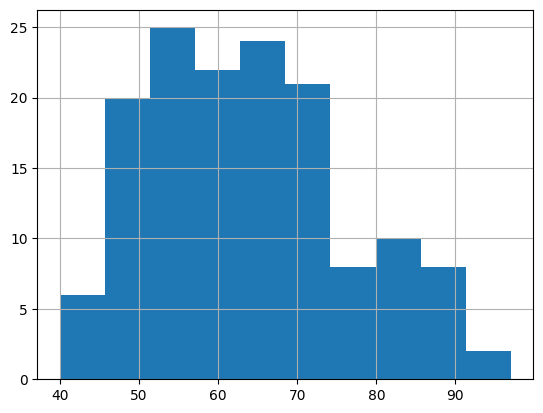

In [37]:
dframe1.fuzz_score.hist()

La media de similitud ( Levenshtein) es  63.93150684931507
Número de nodos en el gráfo: 68
Número de aristas en el gráfo: 39


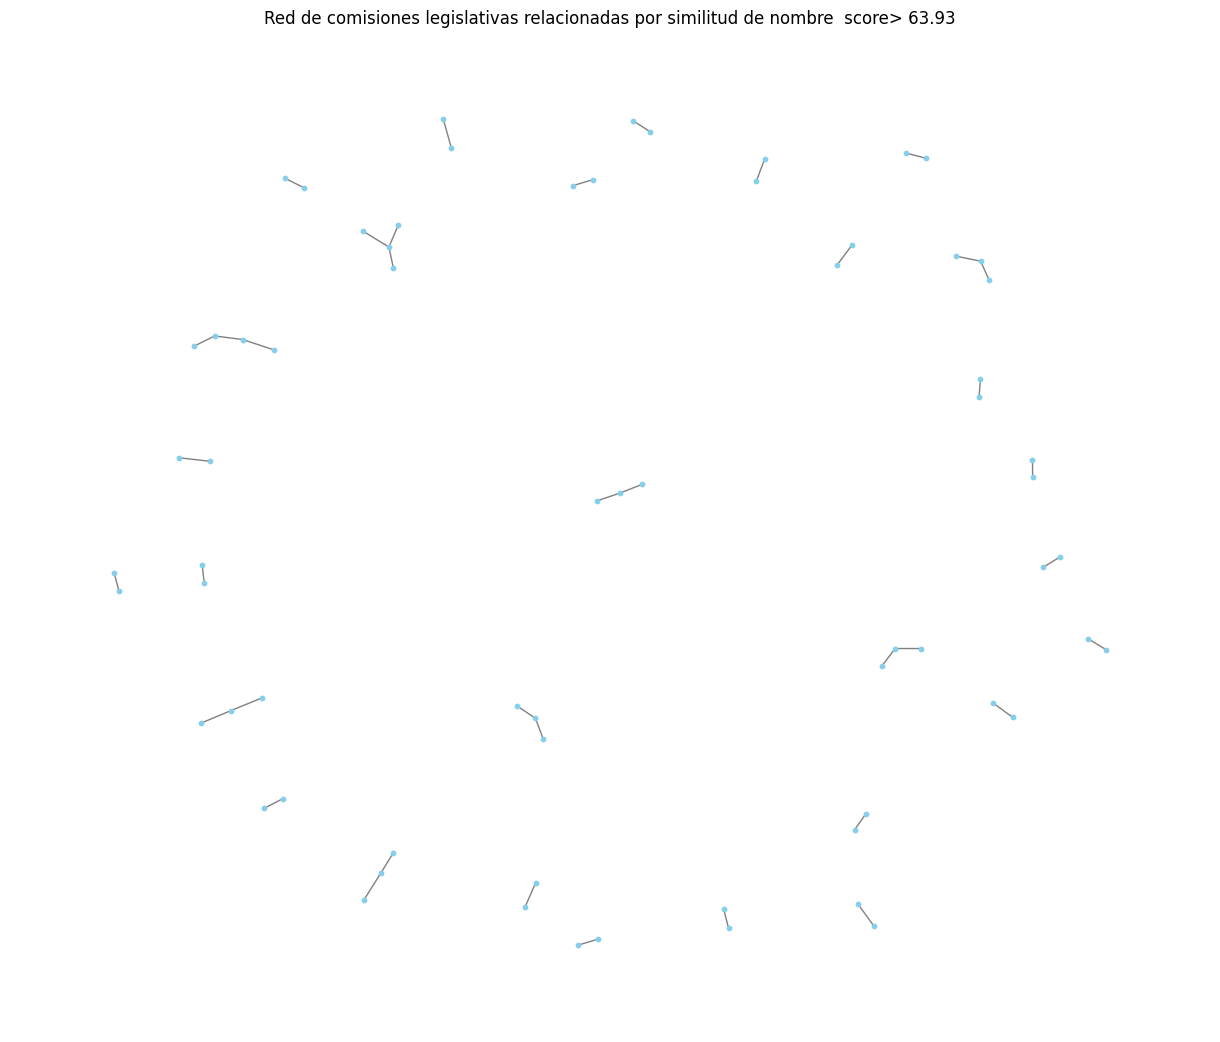

In [38]:
# Se crea un grafo de similitud de nombres de comisiones tal que la similitud de nombres es superior al 60% de 100%
mean = dframe1.fuzz_score.mean() # 63.93150684931507
print("La media de similitud ( Levenshtein) es ", mean)
G_60 = graph_get(dframe1[dframe1.fuzz_score>mean], f"Red de comisiones legislativas relacionadas por similitud de nombre  score> {round(mean,2)}" )

In [39]:
# Comunidad por louvain_communities 
# https://cienciadedatos.net/documentos/pygml02-detecion-comunidades-grafos-redes-python
comunidades = nx.community.louvain_communities(
                G          = G_60,
                #weight     = 'weight',
                resolution = 1,
                seed=123,
             )


In [40]:
# Tamaño de las comunidades
# ======================================================================================
print("Cantidad de Comunidades", len(comunidades))
tam = [len(comunidad) for comunidad in comunidades]
tam

Cantidad de Comunidades 29


[4,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2]

In [41]:
comunidades_map = {}
for i in range(len(comunidades)):
    comunidades_map.update(dict.fromkeys(comunidades[i], i))

comunidades_map

{'JUSTICIA Y ASUNTOS PENALES': 0,
 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES': 0,
 'ASUNTOS CONSTITUCIONALES': 0,
 'ASUNTOS MUNICIPALES': 0,
 'INTERIOR Y JUSTICIA': 1,
 'SEGURIDAD INTERIOR': 1,
 'SEGURIDAD INTERIOR Y NARCOTRAFICO': 1,
 'ECONOMIAS REGIONALES': 2,
 'ECONOMIAS Y DESARROLLO REGIONAL': 2,
 'ECOLOGIA Y DESARROLLO HUMANO': 2,
 'LEGISLACION GENERAL': 3,
 'LEGISLACION PENAL': 3,
 'LEGISLACION DEL TRABAJO': 3,
 'PESCA INTERESES MARITIMOS Y PORTUARIOS': 4,
 'INTERESES MARITIMOS FLUVIALES PESQUEROS Y PORTUARIOS': 4,
 'FAMILIA Y MINORIDAD': 5,
 'FAMILIA MUJER Y MINORIDAD': 5,
 'SALUD Y DEPORTE': 6,
 'DEPORTE': 6,
 'AGRICULTURA Y GANADERIA': 7,
 'AGRICULTURA GANADERIA Y PESCA': 7,
 'COMUNICACIONES': 8,
 'COMUNICACIONES E INFORMATICA': 8,
 'ACCION SOCIAL Y SALUD PUBLICA': 9,
 'ASISTENCIA SOCIAL Y SALUD PUBLICA': 9,
 'EDUCACION CULTURA CIENCIA Y TECNOLOGIA': 10,
 'EDUCACION': 10,
 'CIENCIA Y TECNOLOGIA': 10,
 'EDUCACION Y CULTURA': 10,
 'COMBUSTIBLES': 11,
 'ENERGIA Y COMBUSTIBLES': 11,


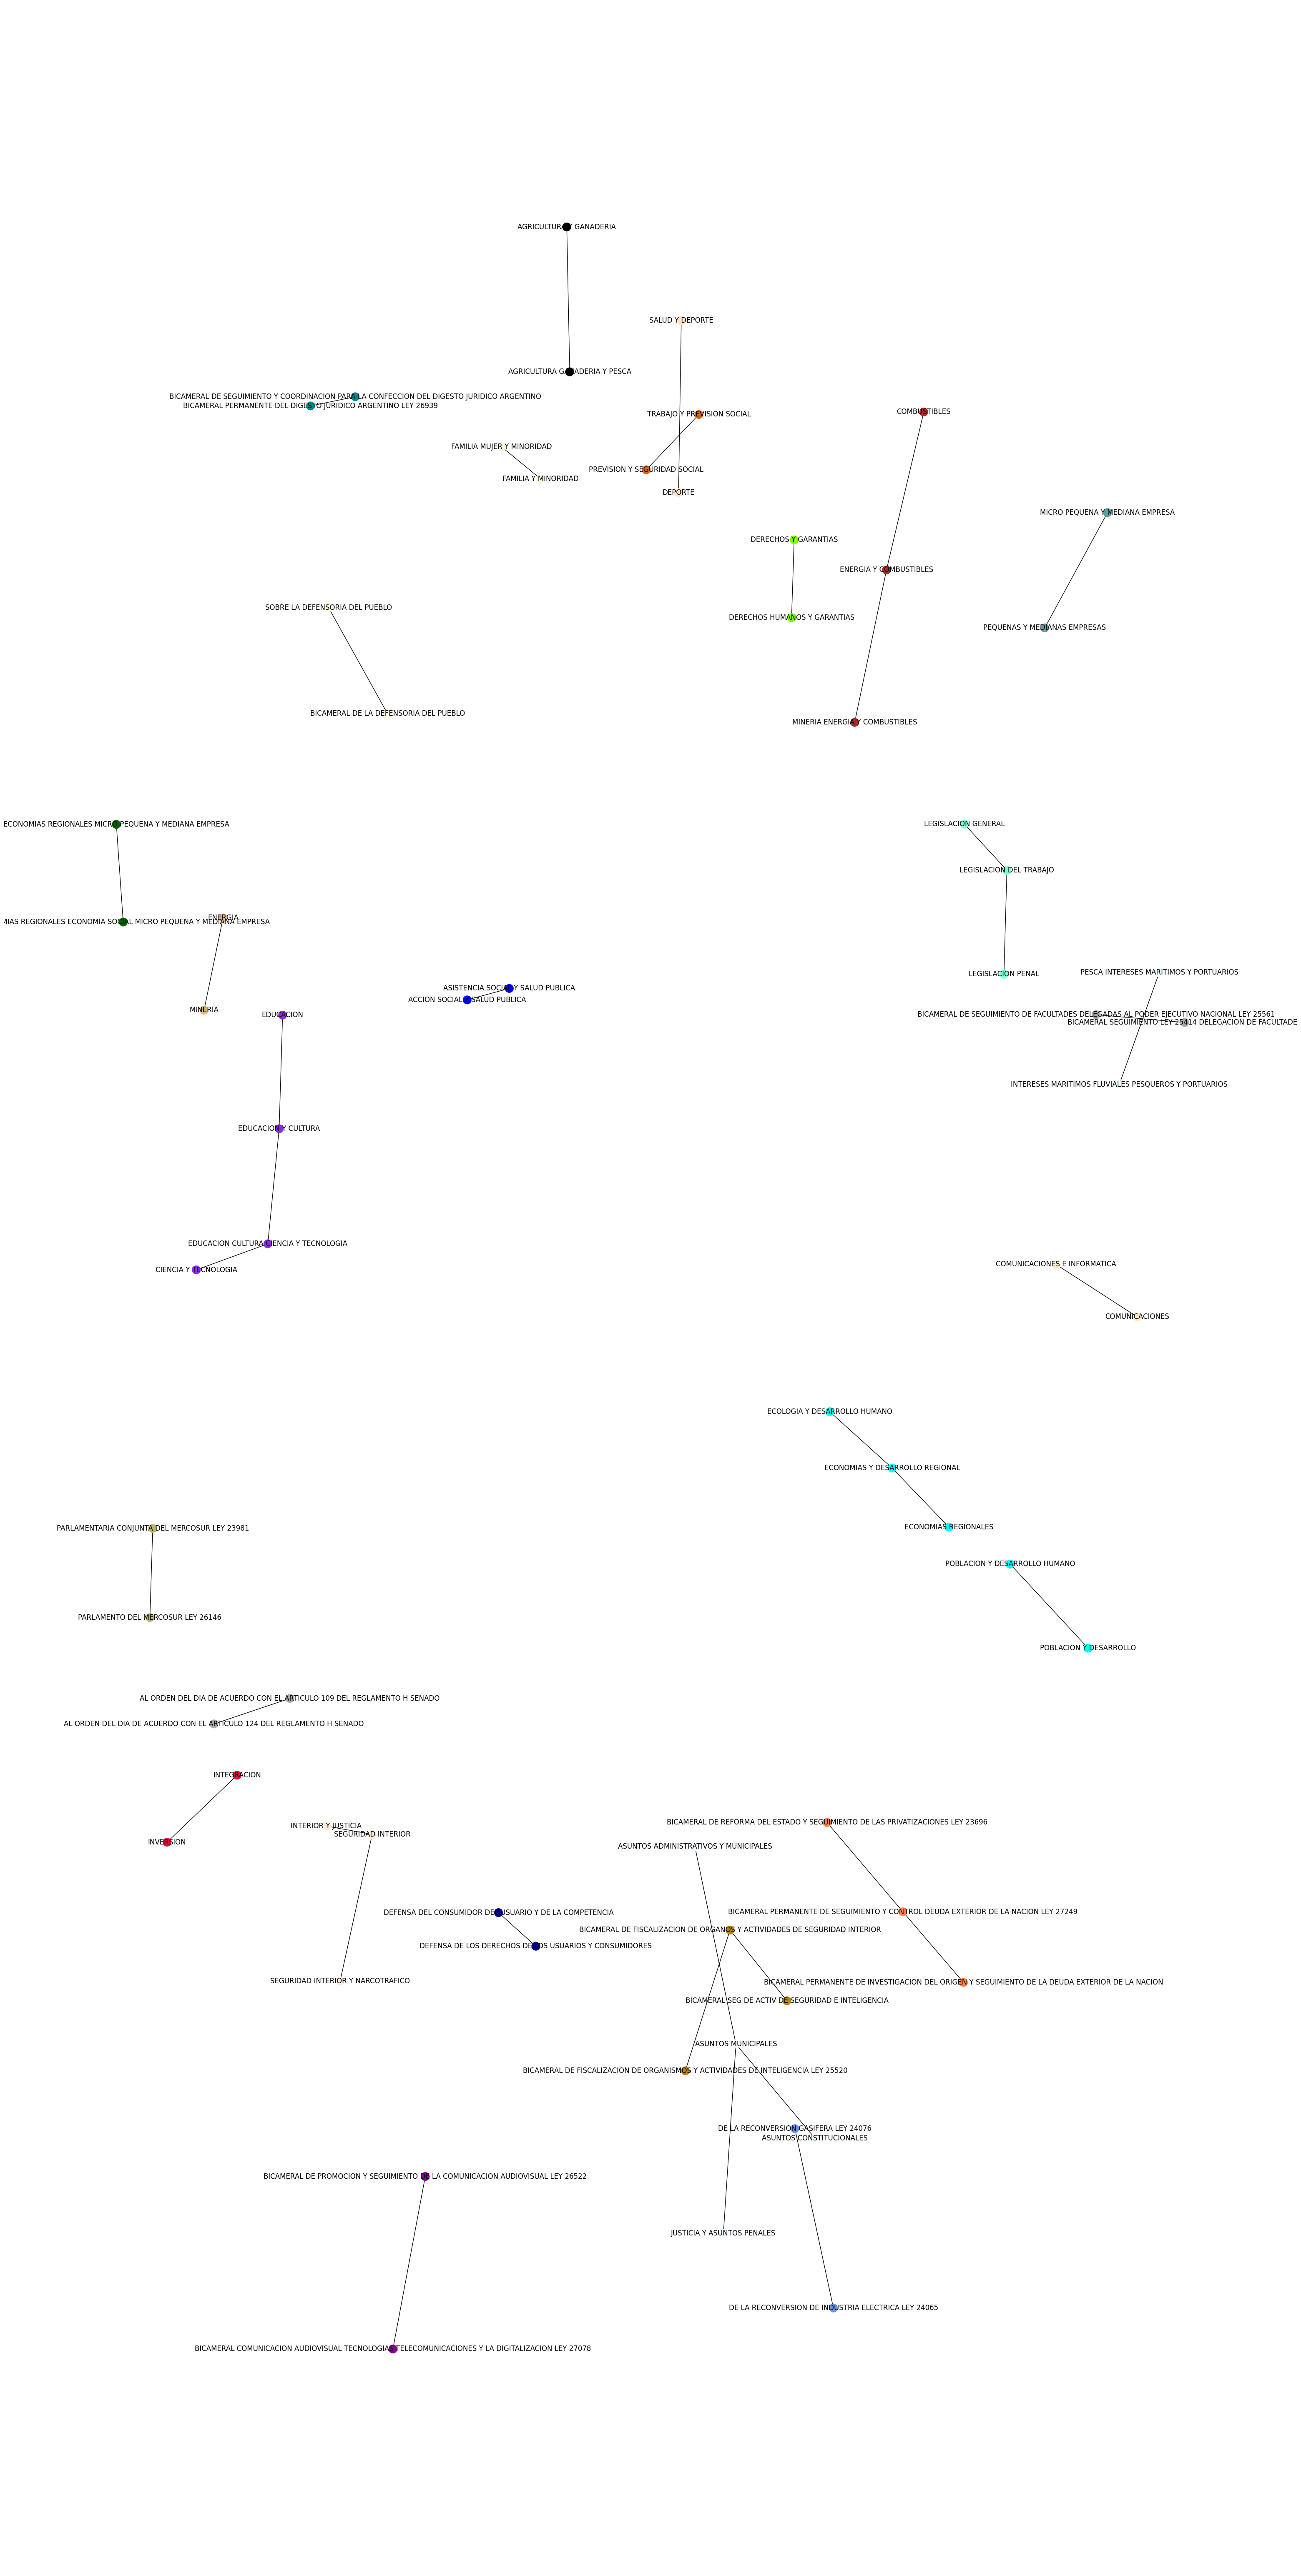

In [42]:
# Colorear los nodos en función de la comunidad
# ======================================================================================
import matplotlib.colors as mcolors
color_pallet = list(mcolors.CSS4_COLORS.values())
color_nodos = []
for node in G_60:
    color_nodos.append(color_pallet[comunidades_map[node]])

#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
pos = nx.spring_layout(G_60,scale=1, iterations=20, seed=6)
fig, ax = plt.subplots(figsize=(40, 80))
nx.draw_networkx_edges(G_60, pos)
nx.draw_networkx_nodes(G_60, pos, node_color=color_nodos,  node_size=200)
nx.draw_networkx_labels(G_60, pos,font_size=12)
plt.axis("off")
plt.show()



In [43]:
# Dataframe de comunidades de comisiones por distancia Levenshtein y algoritmo de comunidades louvain
comun_comi_df = pd.DataFrame.from_dict(comunidades_map, orient='index').reset_index()
comun_comi_df.columns = ['comision_nombre_norm','categ_louvain_LevenshteinMayor_60']
comun_comi_df

comision_nombre_norm  \
0                                                                        JUSTICIA Y ASUNTOS PENALES   
1                                                             ASUNTOS ADMINISTRATIVOS Y MUNICIPALES   
2                                                                          ASUNTOS CONSTITUCIONALES   
3                                                                               ASUNTOS MUNICIPALES   
4                                                                               INTERIOR Y JUSTICIA   
..                                                                                              ...   
63                          AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO   
64                                                                PARLAMENTO DEL MERCOSUR LEY 26146   
65                                                    PARLAMENTARIA CONJUNTA DEL MERCOSUR LEY 23981   
66  BICAMERAL COMUNICACION AUDIOVISUAL TECNOLOGIAS TELECOMUNICACIONES Y LA DIGITALIZACION LEY 27078   
67                    BICAMERAL DE PROMOCION Y SEGUIMIENTO DE LA COMUNICACION AUDIOVISUAL LEY 26522   

    categ_louvain_LevenshteinMayor_60  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   1  
..                                ...  
63                                 26  
64                                 27  
65                                 27  
66                                 28  
67                                 28  

[68 rows x 2 columns]

In [44]:
fuzz_df =  pd.merge(dframe1, comun_comi_df, how='left', left_on='comision_nombre_norm' , right_on = 'comision_nombre_norm')
values = {"categ_louvain_LevenshteinMayor_60": -1}
fuzz_df.fillna(value=values, inplace = True)
fuzz_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   comision_nombre_norm               146 non-null    object 
 1   fuzz_match                         146 non-null    object 
 2   fuzz_score                         146 non-null    int64  
 3   categ_louvain_LevenshteinMayor_60  146 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ KB


In [45]:
# Check
fuzz_df[fuzz_df.comision_nombre_norm.str.contains('DEPORTE')]           

comision_nombre_norm       fuzz_match  fuzz_score  \
14              DEPORTE  SALUD Y DEPORTE          64   
89      SALUD Y DEPORTE          DEPORTE          64   

    categ_louvain_LevenshteinMayor_60  
14                                6.0  
89                                6.0

####  3.2 dinámica interrelacionada dentro del sistema de comités (SNA)
* ¿Cómo funcionan las comisiones? 
* ¿Existen comisiones especiales? ¿algunas comisiones son más importantes que otras?
  
Paper de referencia:  https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3711556
* De acuerdo al paper: Se elaboró un conjunto de datos de 17.224 proyectos de ley presentados entre 2016 y 2018
* Se identifican 7 comisiones , tal que se hay aquellas de asuntos relacionados con la economía (A), aquellas que involucran recursos naturales (B) y aquellas que parecen estar más relacionadas con asuntos institucionales (C). Luego, dos grupos parecen estar relacionados con asuntos de derechos (D y E), y luego un grupo misceláneo con conexiones más elusivas (F). Hay dos casos atípicos fuertes: las comisiones que trabajan en turismo (G) y negocios cooperativos (G) no comparten miembros con otras comisiones. Este tipo de análisis puede revelar patrones interesantes y conexiones obvias, como por ejemplo las comisiones que se ocupan de defensa nacional y seguridad interna, entre minería y energía, entre políticas de comunicación y libertad de expresión, etc.
Por otro lado, la información sobre correferencias sugiere que no todas las comisiones son igualmente importantes, como se muestra en la Tabla 2 y la Figura 6. Cuando se mide según su centralidad, la comisión más relevante en la Cámara es la encargada de discutir el presupuesto (Presupuesto y Hacienda).
De manera similar, los comités que parecen tener un alcance temático más amplio también obtienen una puntuación alta bajo esta luz, como Legislación General, Asuntos Constitucionales, Legislación del Trabajo y Peticiones, Poderes y Reglamentos (similar al Comité de Reglas de la Cámara de Representantes de los Estados Unidos). Este tipo de análisis permite identificar qué comités realizan funciones esenciales y cuáles son más periféricas. Esta conclusión es fácil de explicar y se confirmó a través de entrevistas con funcionarios relevantes: por ejemplo, todos los proyectos de ley que presumiblemente exigen fondos del presupuesto se remiten automáticamente al comité de presupuesto y el comité de Legislación General recibe todos los proyectos de ley que no encajan claramente en la jurisdicción de comités más especializados
(Álvarez Ugarte 2019, 18-21).


In [46]:
# Controlar nulos
girocom_df.isnull().sum().sort_values(ascending=False)


proyecto_id             0
comision                0
orden                   0
comision_nombre_norm    0
dtype: int64

In [47]:
# Puede haber proyectos con màs de 1 giro. Va a depender de comisiones asociadas a proyectos
girocom_df['proyecto_id'].value_counts()

proyecto_id
HCDN061700    13
HCDN010321    13
HCDN006292    11
HCDN011280    11
HCDN040870    11
              ..
HCDN272748     1
HCDN272747     1
HCDN272746     1
HCDN272745     1
HCDN272744     1
Name: count, Length: 259585, dtype: int64

In [48]:
# Chequear en sentido de un proyecto con varios giro. Se repite RELACIONES EXTERIORES Y CULTO y PRESUPUESTO Y HACIENDA
girocom_df[girocom_df['proyecto_id']== 'HCDN061700'].sort_values(by =['orden'], ascending=False)


proyecto_id                           comision  orden  \
110450  HCDN061700             PRESUPUESTO Y HACIENDA     13   
110449  HCDN061700  AMBIENTE Y DESARROLLO SUSTENTABLE     12   
110448  HCDN061700         JUSTICIA Y ASUNTOS PENALES     11   
110447  HCDN061700      RELACIONES EXTERIORES Y CULTO     10   
110446  HCDN061700                   DEFENSA NACIONAL      9   
110445  HCDN061700             PRESUPUESTO Y HACIENDA      8   
110444  HCDN061700      ACCION SOCIAL Y SALUD PUBLICA      7   
110443  HCDN061700                  LEGISLACION PENAL      6   
110442  HCDN061700                          INDUSTRIA      5   
110453  HCDN061700                           COMERCIO      4   
110452  HCDN061700                 SEGURIDAD INTERIOR      3   
110451  HCDN061700                   DEFENSA NACIONAL      2   
110454  HCDN061700      RELACIONES EXTERIORES Y CULTO      1   

                     comision_nombre_norm  
110450             PRESUPUESTO Y HACIENDA  
110449  AMBIENTE Y DESARROLLO SUSTENTABLE  
110448         JUSTICIA Y ASUNTOS PENALES  
110447      RELACIONES EXTERIORES Y CULTO  
110446                   DEFENSA NACIONAL  
110445             PRESUPUESTO Y HACIENDA  
110444      ACCION SOCIAL Y SALUD PUBLICA  
110443                  LEGISLACION PENAL  
110442                          INDUSTRIA  
110453                           COMERCIO  
110452                 SEGURIDAD INTERIOR  
110451                   DEFENSA NACIONAL  
110454      RELACIONES EXTERIORES Y CULTO

In [49]:
# Controlar duplicados
girocom_df[girocom_df.duplicated(keep=False)]

proyecto_id                comision  orden    comision_nombre_norm
314268  HCDN213048     LEGISLACION GENERAL      1     LEGISLACION GENERAL
314270  HCDN213048     LEGISLACION GENERAL      1     LEGISLACION GENERAL
319627  HCDN218577  PRESUPUESTO Y HACIENDA      3  PRESUPUESTO Y HACIENDA
319629  HCDN218577  PRESUPUESTO Y HACIENDA      3  PRESUPUESTO Y HACIENDA
334572  HCDN232156     LEGISLACION GENERAL      1     LEGISLACION GENERAL
334575  HCDN232156     LEGISLACION GENERAL      1     LEGISLACION GENERAL

In [50]:
# Eliminar giros duplicados
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
print("Antes de eliminar duplicados:", girocom_df.shape)
girocom_df.drop_duplicates(keep='last', inplace=True)
print("Despues de eliminar duplicados:", girocom_df.shape)

Antes de eliminar duplicados: (392092, 4)
Despues de eliminar duplicados: (392089, 4)


In [51]:
# Giro de comisiones sin duplicados y con orden
with open('girocomisiones1.9_20241031.pkl', 'wb') as file:
    pickle.dump(girocom_df,file)

In [52]:
# Me interesa la relación proyecto y comisión. No la cantidad de veces girado a dicha comisión
giro_com_nombre_df = girocom_df[['proyecto_id','comision','comision_nombre_norm']].copy() 
print("Antes de eliminar duplicados (relación proyecto y comisión):", giro_com_nombre_df.shape)
giro_com_nombre_df.drop_duplicates(keep='last', inplace=True)
print("Despues de eliminar duplicados (relación proyecto y comisión):", giro_com_nombre_df.shape)

Antes de eliminar duplicados (relación proyecto y comisión): (392089, 3)
Despues de eliminar duplicados (relación proyecto y comisión): (388202, 3)


In [53]:
giro_com_nombre_df.describe(include='all').T

count  unique                     top   freq
proyecto_id           388202  259585              HCDN006292     11
comision              388202     195  PRESUPUESTO Y HACIENDA  44728
comision_nombre_norm  388202     146  PRESUPUESTO Y HACIENDA  45487

se elabora una lista de aristas para documentar el vínculo entre las comisiones que recibieron la misma pieza legislativa (proyecto legislativo).

In [54]:
edge_df  = pd.merge(giro_com_nombre_df,giro_com_nombre_df, how = 'left',left_on = 'proyecto_id', right_on = "proyecto_id")[['comision_nombre_norm_x','comision_nombre_norm_y','proyecto_id']]

Número de nodos en el gráfo: 146
Número de aristas en el gráfo: 2825


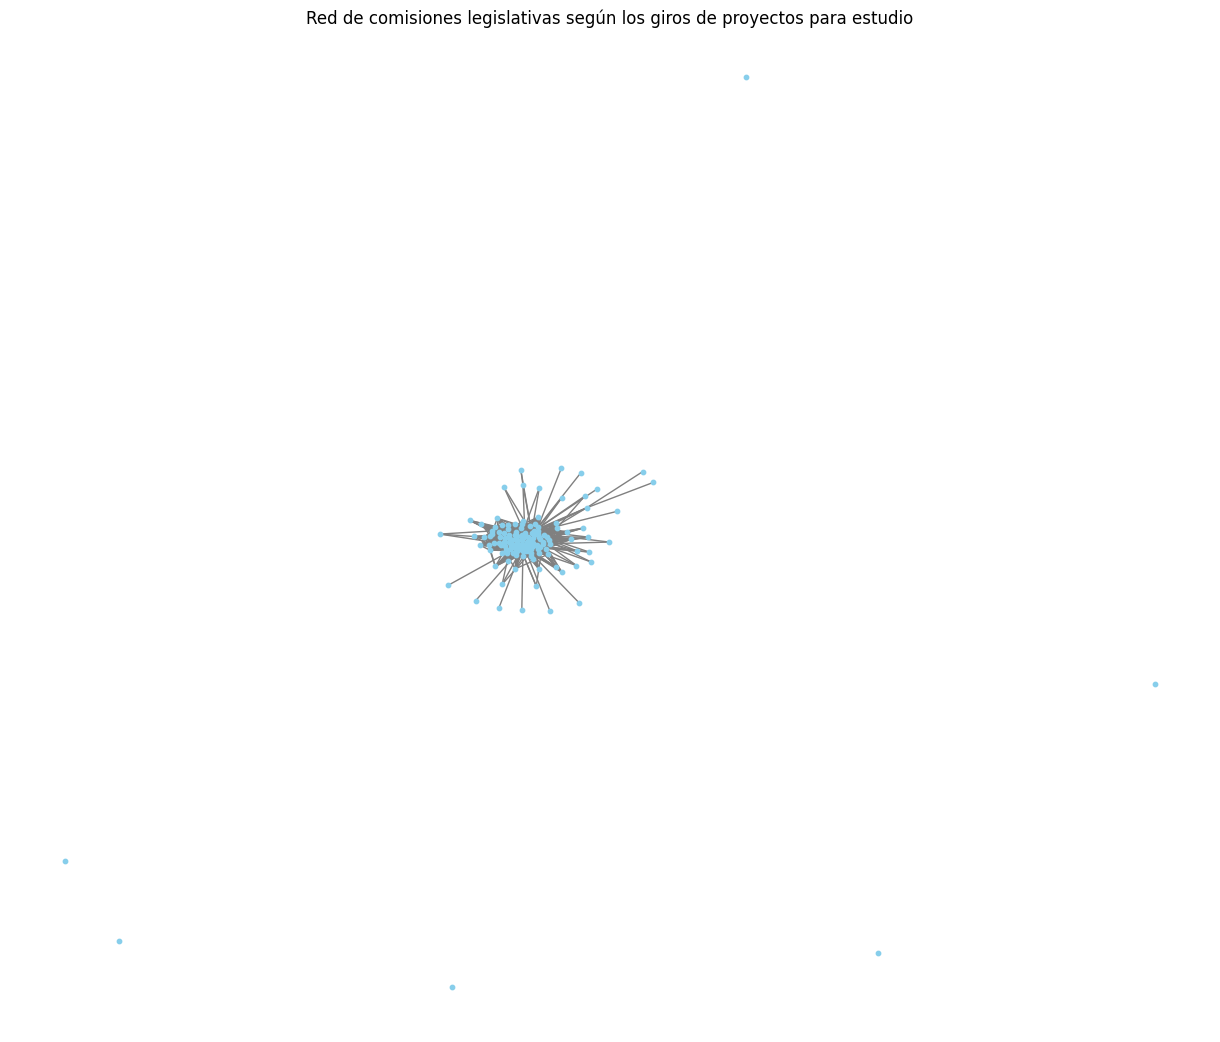

In [55]:
# graph_get(df, titulo, x_from='comision_nombre_norm', x_to="fuzz_match", pesos_l = ['fuzz_score']):
# Grafos no dirigidos
G_dinamica = graph_get(edge_df,"Red de comisiones legislativas según los giros de proyectos para estudio", 'comision_nombre_norm_x','comision_nombre_norm_y' ,[] )


In [56]:
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html
# que mide la cantidad de aristas totales en una red contra la cantidad total de aristas posibles de una red. Una red totalmente integrada igual a 1 
# De modo exploratorio esta red tiende a estar desconectada, habria  comisiones con casi nula intervención en estudio de proyectos. Como se observa en gráfica y con la medidad densidad
den = nx.density(G_dinamica)
print('densidad del grafo',den)

densidad del grafo 0.266887104393009


In [57]:
# https://cienciadedatos.net/documentos/pygml03-analisis-redes-python-networkx

**Grado (Degree)**

El grado (degree) es una medida sencilla que se basa en el número de enlaces que tiene un nodo. Acorde a esta métrica, los nodos con un alto grado de centralidad son los que están conectados directamente a muchos otros nodos de la red.

In [58]:
degree = dict(nx.degree(G_dinamica))
# Dataframe de comunidades de comisiones por distancia Levenshtein y algoritmo de comunidades louvain
com_grafo_df = pd.DataFrame.from_dict(degree, orient='index').reset_index()
com_grafo_df.columns = ['comision_nombre_norm','grados']

print(com_grafo_df['grados'].describe())
com_grafo_df.sort_values(by='grados', ascending=False)

count    146.000000
mean      38.698630
std       30.702436
min        0.000000
25%        6.250000
50%       37.000000
75%       65.000000
max      119.000000
Name: grados, dtype: float64


comision_nombre_norm  \
2                                                       PRESUPUESTO Y HACIENDA   
4                                                     ASUNTOS CONSTITUCIONALES   
9                                                          LEGISLACION GENERAL   
43                                               RELACIONES EXTERIORES Y CULTO   
45                                       ASUNTOS ADMINISTRATIVOS Y MUNICIPALES   
..                                                                         ...   
109                               RESERVADO EN MESA A CONSIDERACION DEL CUERPO   
110    AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 124 DEL REGLAMENTO H SENADO   
120  ESPECIAL ANALISIS EVALUACION E INVESTIGACION DE LA VIOLENCIA EN EL FUTBOL   
133              BICAMERAL PERMANENTE DEL DIGESTO JURIDICO ARGENTINO LEY 26939   
141     BICAMERAL DE SEGUIMIENTO DE CONTRATOS DE PARTICIPACION PUBLICO PRIVADA   

     grados  
2       119  
4       113  
9       101  
43      100  
45       94  
..      ...  
109       0  
110       0  
120       0  
133       0  
141       0  

[146 rows x 2 columns]

In [59]:
# Métricas de posición en la red
# ======================================================================================
degree      = pd.Series(dict(nx.degree(G_dinamica)), name='degree')
centrality  = pd.Series(dict(nx.degree_centrality(G_dinamica)), name='centrality')
eigenvector =  pd.Series(nx.eigenvector_centrality(G_dinamica), name='eigenvector')
pagerank    =  pd.Series(nx.pagerank(G_dinamica), name='pagerank')
betweenness =  pd.Series(nx.betweenness_centrality(G_dinamica), name='betweenness')
centralidad = pd.concat([degree,centrality, eigenvector, pagerank, betweenness], axis=1)
centralidad.index.name = 'node'
centralidad.head(3)

degree  centrality  eigenvector  pagerank  betweenness
node                                                                          
SOBRE TABLAS                28    0.193103     0.055928  0.005494     0.002123
OBRAS PUBLICAS              82    0.565517     0.132852  0.012973     0.008452
PRESUPUESTO Y HACIENDA     119    0.820690     0.154600  0.024041     0.121554

In [60]:
# Top 6 nodos para cada métrica
# ======================================================================================
for col in centralidad.columns:
    top_nodos = centralidad[col].sort_values(ascending=False).head(6).index.to_list()
    print(f"Nodos con mayor {col}: {top_nodos}")

Nodos con mayor degree: ['PRESUPUESTO Y HACIENDA', 'ASUNTOS CONSTITUCIONALES', 'LEGISLACION GENERAL', 'RELACIONES EXTERIORES Y CULTO', 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES', 'COMERCIO']
Nodos con mayor centrality: ['PRESUPUESTO Y HACIENDA', 'ASUNTOS CONSTITUCIONALES', 'LEGISLACION GENERAL', 'RELACIONES EXTERIORES Y CULTO', 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES', 'COMERCIO']
Nodos con mayor eigenvector: ['PRESUPUESTO Y HACIENDA', 'LEGISLACION GENERAL', 'ASUNTOS CONSTITUCIONALES', 'RELACIONES EXTERIORES Y CULTO', 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES', 'COMERCIO']
Nodos con mayor pagerank: ['ASUNTOS CONSTITUCIONALES', 'PRESUPUESTO Y HACIENDA', 'RELACIONES EXTERIORES Y CULTO', 'LEGISLACION GENERAL', 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES', 'TRABAJO Y PREVISION SOCIAL']
Nodos con mayor betweenness: ['ASUNTOS CONSTITUCIONALES', 'PRESUPUESTO Y HACIENDA', 'RELACIONES EXTERIORES Y CULTO', 'SISTEMAS MEDIOS DE COMUNICACION Y LIBERTAD DE EXPRESION', 'PARLAMENTARIA MIXTA REVISORA DE CUENTAS', 

**Observaciones**

Son varias las métricas de centralidad que tratan de cuantificar la importancia de los nodos dentro de una red, y no todas ellas tienen por qué coincidir. Por esta razón, es conveniente calcular varias métricas y explorar en qué nodos coinciden y en cuáles no. 

Según estás métricas, comisiones claves:  ['PRESUPUESTO Y HACIENDA', 'ASUNTOS CONSTITUCIONALES', 'LEGISLACION GENERAL', 'RELACIONES EXTERIORES Y CULTO']
   

* La centralidad basada en eigenvectors, también conocida como eigencentrality o prestige score es una medida que tiene en cuenta, no sólo el número de conexiones que tiene un nodo, sino también la importancia de los nodos a los que se conectan. Es decir, los nodos se consideran más importantes si están conectados a nodos que, a su vez, son importantes. Ver 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES' y 'COMERCIO'
* PageRank: La métrica de PageRank está basada en el concepto de paseo aleatorio (random walks). Acorde a esta métrica, la importancia de un nodo es proporcional a la probabilidad límite de llegar a ducho nodo si se navega de forma aleatoria por la red. Ver: 'TRABAJO Y PREVISION SOCIAL'
* Betweenness: El betweenness centrality de un nodo o enlace se define como el número de caminos más cortos del grafo que pasan por él dividido por el número total de caminos más cortos. Aquellos nodos y enlaces con alta centralidad pueden tener una influencia considerable dentro de una red por la cantidad de información que pasa por ellos (intermediación o funciones de control ). Ver: 'PARLAMENTARIA MIXTA REVISORA DE CUENTAS', 'SISTEMAS MEDIOS DE COMUNICACION Y LIBERTAD DE EXPRESION'

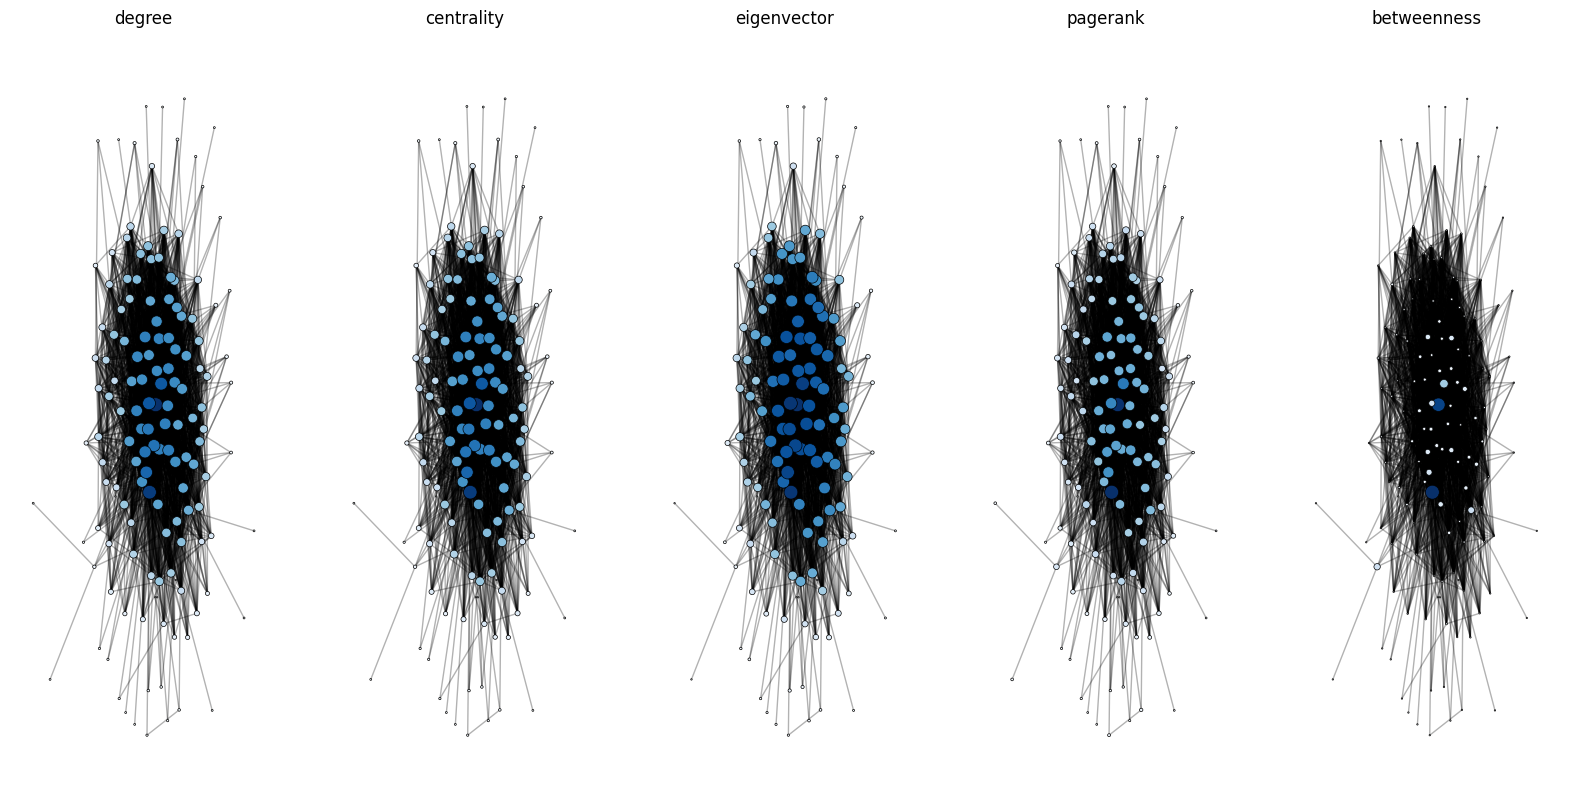

In [61]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

# Escalado de las métricas para pooder compararlas
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(centralidad)
centralidad_scaled = pd.DataFrame(
                        scaler.transform(centralidad),
                        columns=scaler.feature_names_in_,
                        index=centralidad.index
                    )
centralidad_scaled.head(3)



# Representación del grafo coloreado por cada métrica de centralidad
# ======================================================================================
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

# Posición de los nodos
pos = nx.kamada_kawai_layout(G_dinamica)

# Mapa de colores
cmap =  mpl.colormaps['Blues']


for i, metrica in enumerate(centralidad_scaled.columns):
    node_size = 100 * centralidad_scaled[metrica] + 1
    node_color = cmap(centralidad_scaled[metrica])
    nx.draw_networkx_nodes(
        G_dinamica,
        pos=pos,
        node_size=node_size,
        node_color=node_color,
        linewidths=0.5,
        edgecolors='black',
        ax=axs[i]
    )
    nx.draw_networkx_edges(G_dinamica, pos=pos, edgelist=G_dinamica.edges, alpha=0.3, ax=axs[i])
    axs[i].set_title(metrica)
    axs[i].axis('off')


In [62]:
#centralidad_scaled
# Import the python libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

In [63]:
# Datos
x = centralidad_scaled[['centrality','betweenness','pagerank']]
x.head()

centrality  betweenness  pagerank
node                                                       
SOBRE TABLAS                0.235294     0.016193  0.191615
OBRAS PUBLICAS              0.689076     0.064454  0.515182
PRESUPUESTO Y HACIENDA      1.000000     0.927019  0.994017
TURISMO                     0.697479     0.051258  0.514562
ASUNTOS CONSTITUCIONALES    0.949580     1.000000  1.000000

In [64]:
# Para obtener gráfica
# ver https://cienciadedatos.net/documentos/py20-clustering-con-python
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    ddata = dendrogram(linkage_matrix, **kwargs)
    return linkage_matrix, ddata

In [65]:
# Modelos
# ==============================================================================
modelo_hclust_complete = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=x)

modelo_hclust_average = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=x)

modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=x)



AgglomerativeClustering(distance_threshold=0, n_clusters=None)

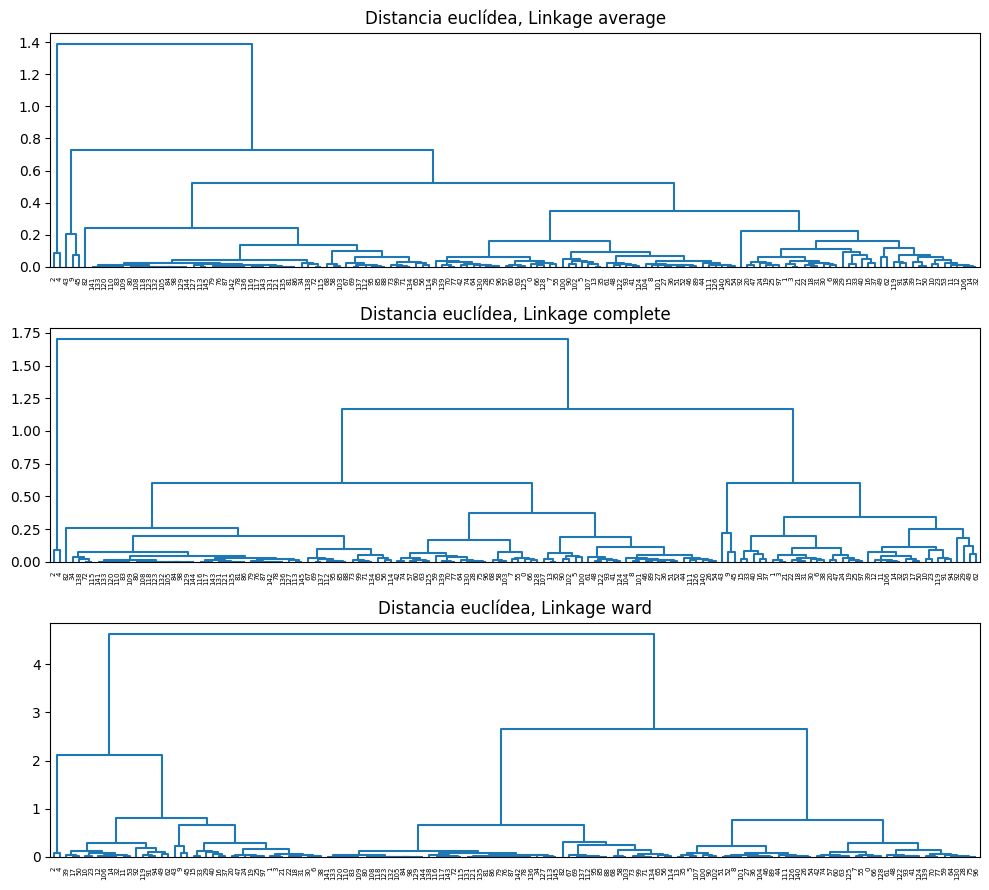

In [66]:
# Dendrogramas
# ==============================================================================
fig, axs = plt.subplots(3, 1, figsize=(10, 9))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();



In [67]:
# En este caso, los tres tipos de linkage identifican claramente 4 clusters, si bien esto no significa que en los 3 dendrogramas los clusters estén formados por exactamente las mismas observaciones.

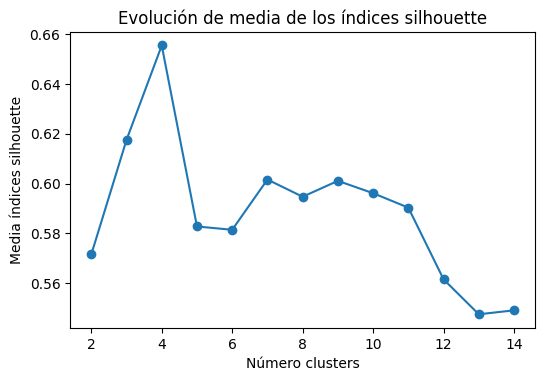

In [68]:
# El método de average silhouette considera como número óptimo de clusters aquel que maximiza la media del silhouette coeficient de todas las observaciones.
#El silhouette coeficient (si)
#cuantifica cómo de buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.

from sklearn.metrics import silhouette_score

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');



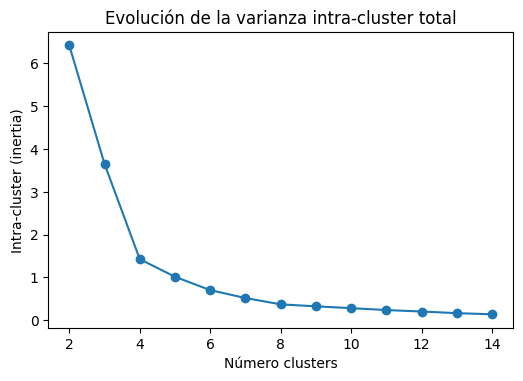

In [69]:
#El método Elbow, también conocido como método del codo, sigue una estrategia comúnmente empleada para encontrar el valor óptimo de un hiperparámetro.
#La idea es probar un rango de valores del hiperparámetro en cuestión, representar gráficamente los resultados obtenidos con cada uno, e identificar 
#aquel punto de la curva (codo) a partir del cual la mejora deja de ser notable. En los casos de partitioning clustering, como por ejemplo K-means, 
#las observaciones se agrupan de una forma tal que se minimiza la varianza total intra-cluster. 
#El método Elbow calcula la varianza total intra-cluster en función del número de clusters y escoge como óptimo aquel valor a partir del cual añadir más clusters apenas consigue mejoría. 

from sklearn.cluster import KMeans
range_n_clusters = range(2, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(x)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');


In [70]:
import matplotlib.colors as mcolors
from matplotlib import colormaps
import matplotlib as mlp

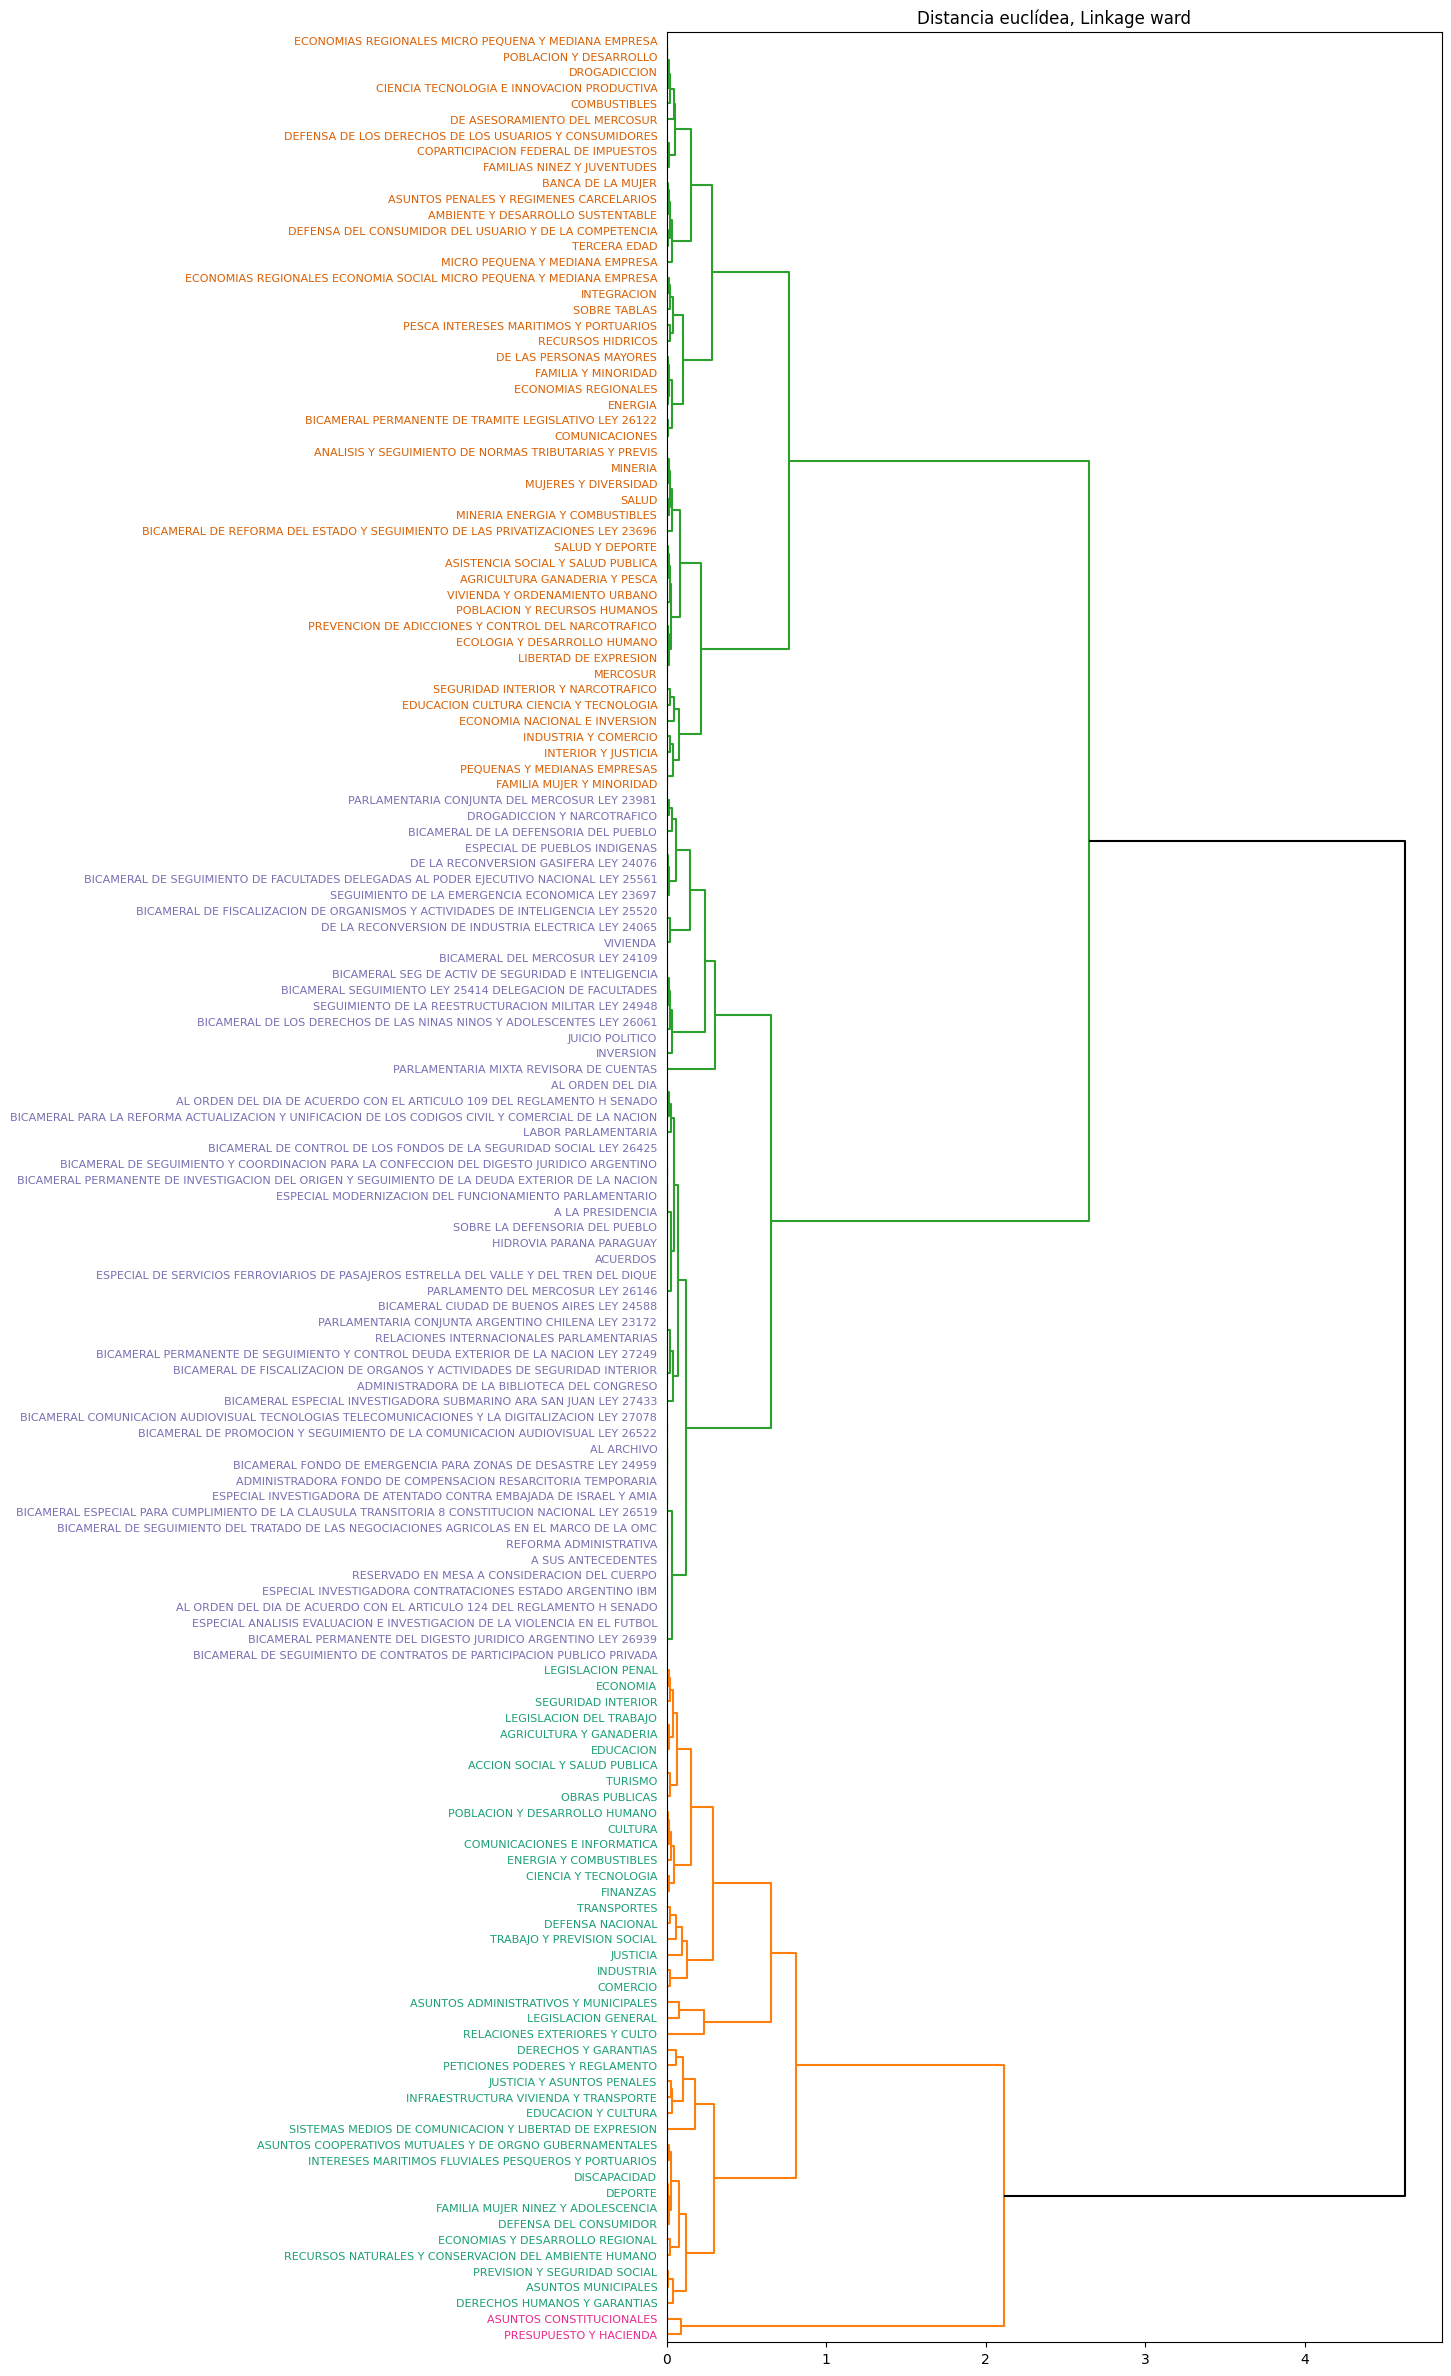

categ_agg_ward_k4
2    55
1    48
0    41
3     2
Name: count, dtype: int64

In [71]:
k= 4
modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            compute_distances=True,
                            linkage  = 'ward',
                            n_clusters  = k
                     )
aggmodel = modelo_hclust_ward.fit(X=x)

# Seteamos color
#hierarchy.set_link_color_palette(colors)

cmap = mpl.colormaps['Dark2'].colors
a_colors = [mlp.colors.to_hex(cmap[i]) for i in range(0,k)]
agg_map = {}
l = aggmodel.labels_
for i in range(len(l)):
    agg_map[i]=  int(l[i])

# Dendograma
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
z, d = plot_dendrogram(aggmodel, labels = x.index, ax= ax, leaf_font_size=8, orientation="right", above_threshold_color='black')

# Asiganamos color
l = d['leaves']
color_nodos = []
for node in l:
    color_nodos.append(a_colors[agg_map[node]])
color_nodos

d['leaves_color_list'] = color_nodos
for leaf, leaf_color in zip(plt.gca().get_yticklabels(),d['leaves_color_list']):
    leaf.set_color(leaf_color)

d
ax.set_title("Distancia euclídea, Linkage ward")
plt.show()



# Creaamos dataframe
aggmodel_df =  pd.DataFrame(aggmodel.labels_ ,index = x.index).reset_index()
aggmodel_df.columns = ['comision_nombre_norm','categ_agg_ward_k'+str(k)]
display(aggmodel_df.categ_agg_ward_k4.value_counts())


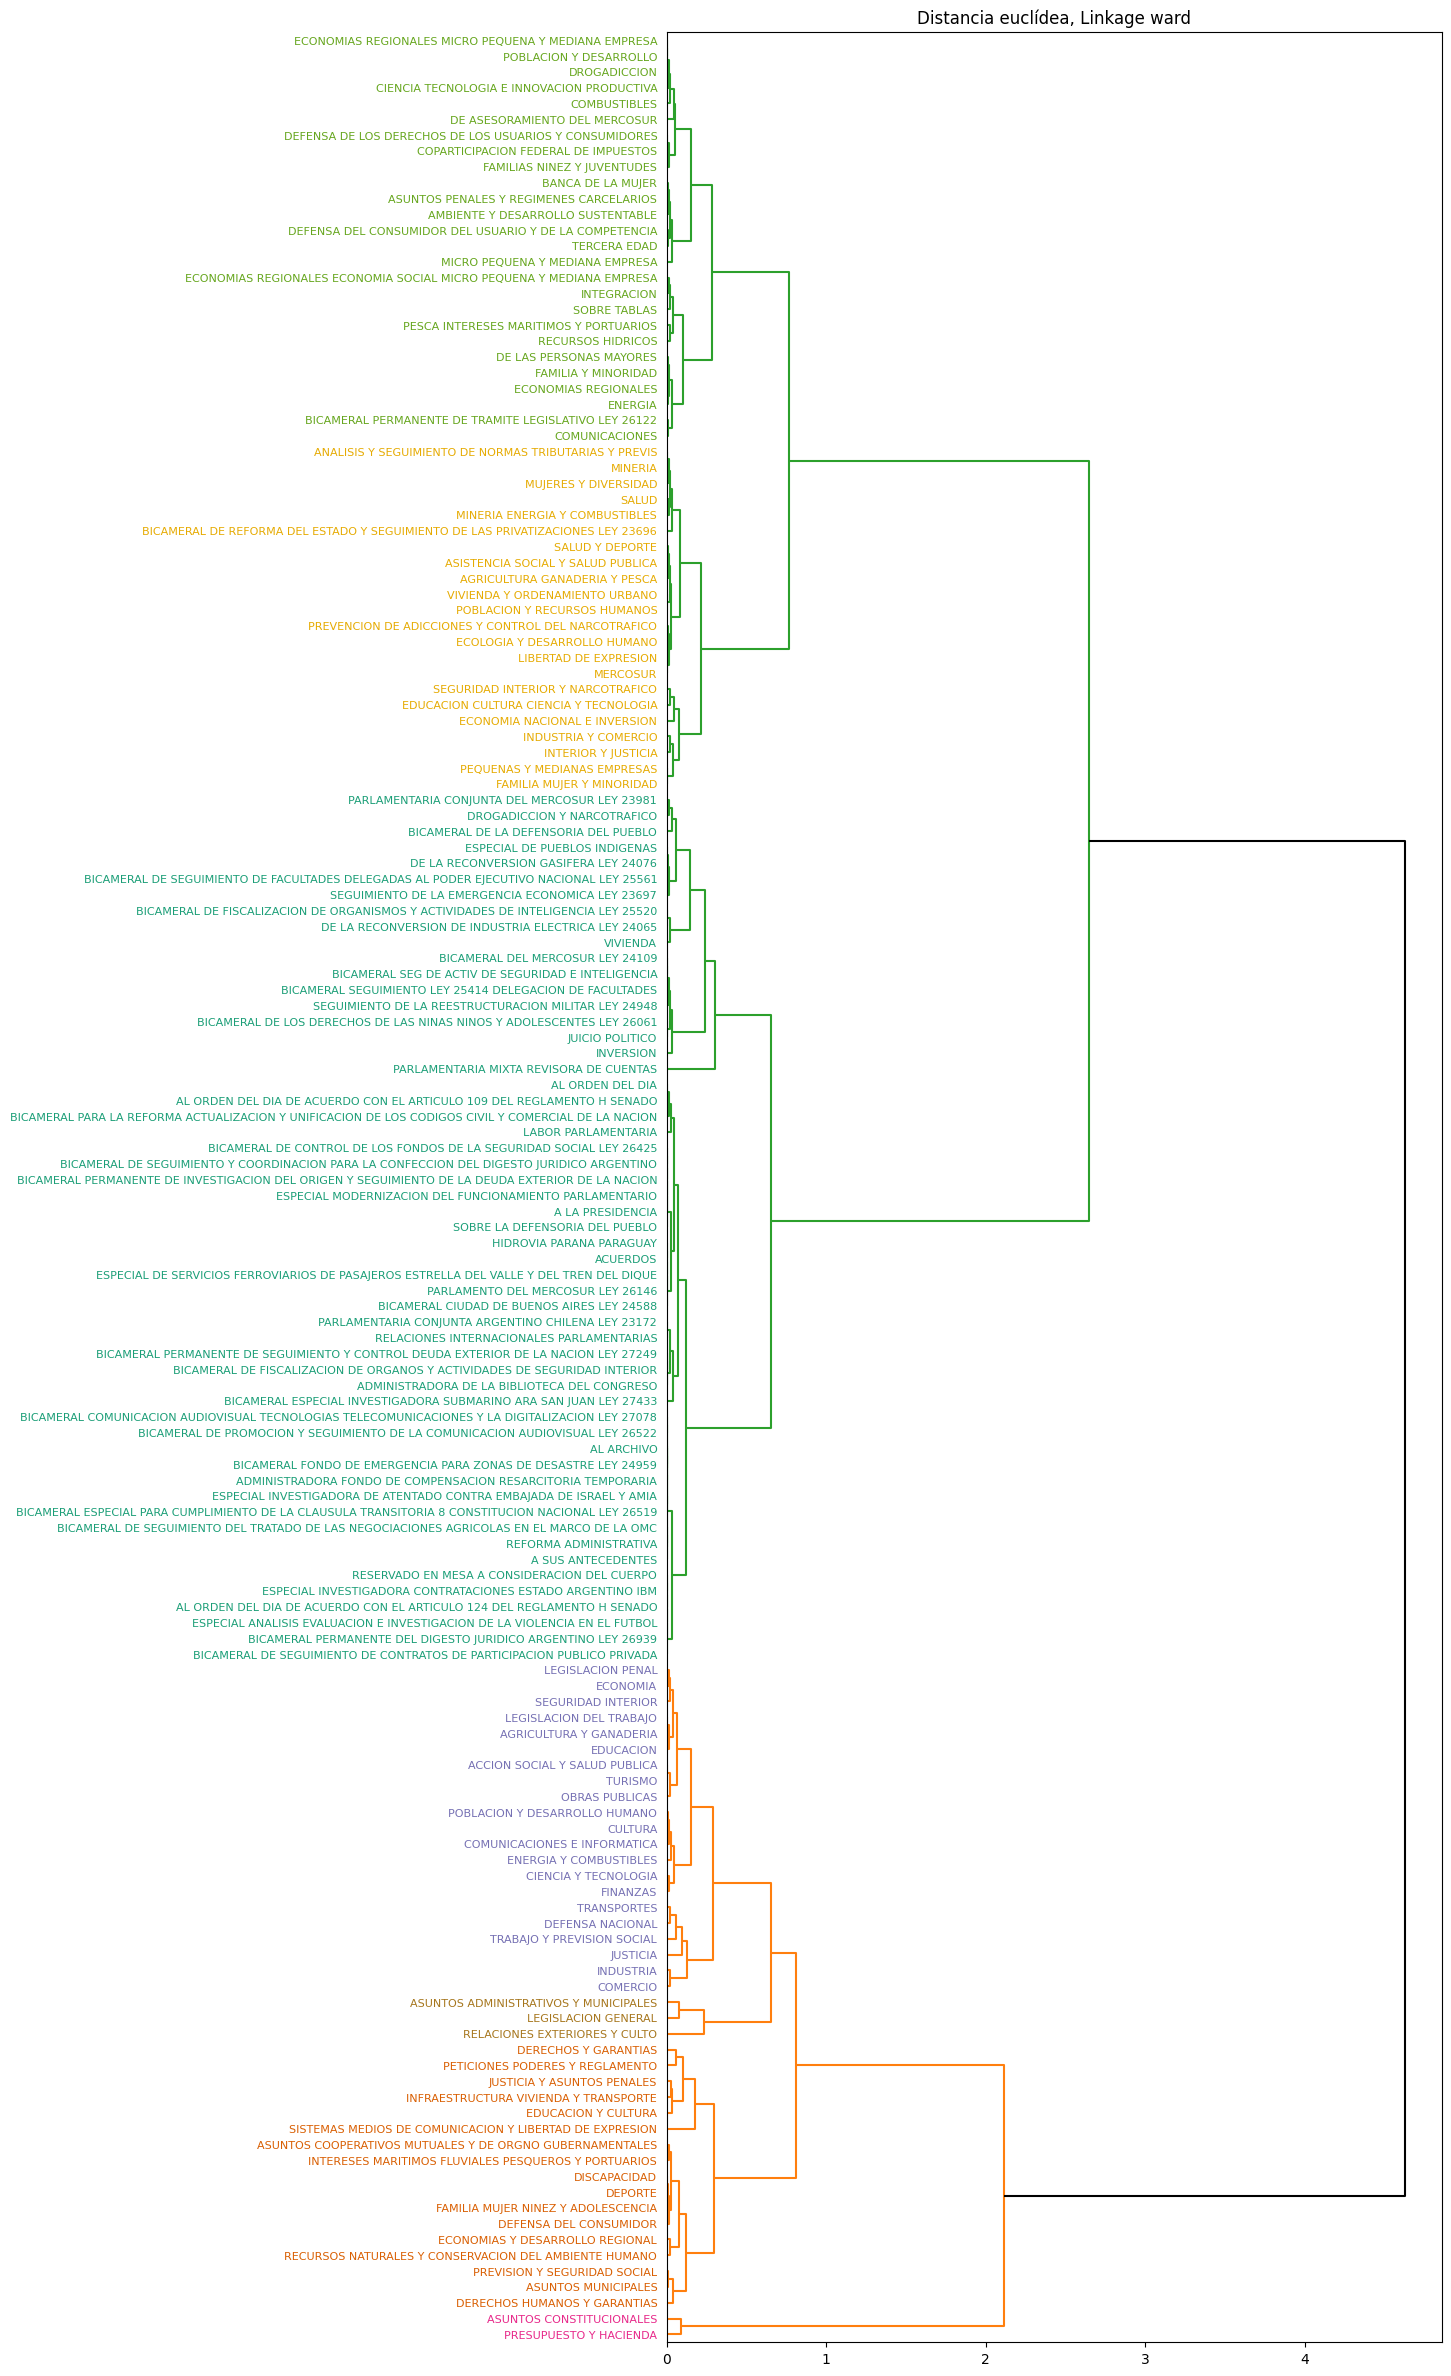

categ_agg_ward_k7
0    55
4    26
5    22
2    21
1    17
6     3
3     2
Name: count, dtype: int64

In [72]:
k= 7
modelo_hclust_ward = AgglomerativeClustering(
                            metric = 'euclidean',
                            compute_distances=True,
                            linkage  = 'ward',
                            n_clusters  = k
                     )
aggmodel = modelo_hclust_ward.fit(X=x)

# Seteamos color
#hierarchy.set_link_color_palette(colors)

cmap = mpl.colormaps['Dark2'].colors
a_colors = [mlp.colors.to_hex(cmap[i]) for i in range(0,k)]
agg_map = {}
l = aggmodel.labels_
for i in range(len(l)):
    agg_map[i]=  int(l[i])

# Dendograma
fig, ax = plt.subplots(1, 1, figsize=(10, 30))
z, d = plot_dendrogram(aggmodel, labels = x.index, ax= ax, leaf_font_size=8, orientation="right", above_threshold_color='black')

# Asiganamos color
l = d['leaves']
color_nodos = []
for node in l:
    color_nodos.append(a_colors[agg_map[node]])
color_nodos

d['leaves_color_list'] = color_nodos
for leaf, leaf_color in zip(plt.gca().get_yticklabels(),d['leaves_color_list']):
    leaf.set_color(leaf_color)

d
ax.set_title("Distancia euclídea, Linkage ward")
plt.show()



# Creaamos dataframe
aggmodelk7_df =  pd.DataFrame(aggmodel.labels_ ,index = x.index).reset_index()
aggmodelk7_df.columns = ['comision_nombre_norm','categ_agg_ward_k'+str(k)]
display(aggmodelk7_df.categ_agg_ward_k7.value_counts())


In [73]:
#A partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 4 es una buena opción.


In [74]:
# Integramos tablas
aggmodelk_df = pd.merge(aggmodelk7_df,aggmodel_df, how = 'left', left_on = 'comision_nombre_norm', right_on = 'comision_nombre_norm' )
aggmodelk_df.head()

comision_nombre_norm  categ_agg_ward_k7  categ_agg_ward_k4
0              SOBRE TABLAS                  4                  1
1            OBRAS PUBLICAS                  2                  0
2    PRESUPUESTO Y HACIENDA                  3                  3
3                   TURISMO                  2                  0
4  ASUNTOS CONSTITUCIONALES                  3                  3

In [75]:
# Centralidad top 10
centralidad_scaled.sort_values(by = 'centrality', ascending =False).head(10)

degree  centrality  eigenvector  \
node                                                                       
PRESUPUESTO Y HACIENDA                 1.000000    1.000000     1.000000   
ASUNTOS CONSTITUCIONALES               0.949580    0.949580     0.973497   
LEGISLACION GENERAL                    0.848739    0.848739     0.975151   
RELACIONES EXTERIORES Y CULTO          0.840336    0.840336     0.945188   
ASUNTOS ADMINISTRATIVOS Y MUNICIPALES  0.789916    0.789916     0.919645   
COMERCIO                               0.739496    0.739496     0.910939   
TRABAJO Y PREVISION SOCIAL             0.739496    0.739496     0.867087   
INDUSTRIA                              0.722689    0.722689     0.897255   
DEFENSA NACIONAL                       0.705882    0.705882     0.859424   
TURISMO                                0.697479    0.697479     0.887082   

                                       pagerank  betweenness  
node                                                          
PRESUPUESTO Y HACIENDA                 0.994017     0.927019  
ASUNTOS CONSTITUCIONALES               1.000000     1.000000  
LEGISLACION GENERAL                    0.665403     0.184589  
RELACIONES EXTERIORES Y CULTO          0.720343     0.366926  
ASUNTOS ADMINISTRATIVOS Y MUNICIPALES  0.623415     0.175083  
COMERCIO                               0.548473     0.067188  
TRABAJO Y PREVISION SOCIAL             0.578695     0.132278  
INDUSTRIA                              0.537734     0.065639  
DEFENSA NACIONAL                       0.553838     0.122954  
TURISMO                                0.514562     0.051258

In [76]:
# Que pasa en salud
centralidad_scaled.loc[centralidad_scaled.index.str.contains('SALUD')]

degree  centrality  eigenvector  \
node                                                                   
ACCION SOCIAL Y SALUD PUBLICA      0.697479    0.697479     0.890099   
ASISTENCIA SOCIAL Y SALUD PUBLICA  0.411765    0.411765     0.547029   
SALUD Y DEPORTE                    0.411765    0.411765     0.586853   
SALUD                              0.378151    0.378151     0.523709   

                                   pagerank  betweenness  
node                                                      
ACCION SOCIAL Y SALUD PUBLICA      0.514503     0.051090  
ASISTENCIA SOCIAL Y SALUD PUBLICA  0.302450     0.012548  
SALUD Y DEPORTE                    0.307529     0.014614  
SALUD                              0.283275     0.010323

In [77]:
# QUE SUCEDE CON PRESUPUESTO 
#aggmodelk_df[aggmodelk_df['comision_nombre_norm'].str.contains('PRESUPUESTO')]
aggmodelk_df[aggmodelk_df.categ_agg_ward_k7==3]

comision_nombre_norm  categ_agg_ward_k7  categ_agg_ward_k4
2    PRESUPUESTO Y HACIENDA                  3                  3
4  ASUNTOS CONSTITUCIONALES                  3                  3

In [78]:
# QUE PASA CON SALUD
aggmodelk_df[aggmodelk_df['comision_nombre_norm'].str.contains('SALUD')]
#aggmodelk_df[aggmodelk_df.categ_agg_ward_k7==3]

comision_nombre_norm  categ_agg_ward_k7  categ_agg_ward_k4
21       ACCION SOCIAL Y SALUD PUBLICA                  2                  0
46   ASISTENCIA SOCIAL Y SALUD PUBLICA                  5                  1
89                     SALUD Y DEPORTE                  5                  1
126                              SALUD                  5                  1

In [79]:
aggmodelk_df[aggmodelk_df.categ_agg_ward_k7==2]

comision_nombre_norm  categ_agg_ward_k7  categ_agg_ward_k4
1                  OBRAS PUBLICAS                  2                  0
3                         TURISMO                  2                  0
6                        ECONOMIA                  2                  0
15                       COMERCIO                  2                  0
16               DEFENSA NACIONAL                  2                  0
18        AGRICULTURA Y GANADERIA                  2                  0
19   COMUNICACIONES E INFORMATICA                  2                  0
20                       FINANZAS                  2                  0
21  ACCION SOCIAL Y SALUD PUBLICA                  2                  0
22                      EDUCACION                  2                  0
24         ENERGIA Y COMBUSTIBLES                  2                  0
25                        CULTURA                  2                  0
29                       JUSTICIA                  2                  0
30             SEGURIDAD INTERIOR                  2                  0
31        LEGISLACION DEL TRABAJO                  2                  0
33                      INDUSTRIA                  2                  0
37                    TRANSPORTES                  2                  0
38              LEGISLACION PENAL                  2                  0
40     TRABAJO Y PREVISION SOCIAL                  2                  0
47           CIENCIA Y TECNOLOGIA                  2                  0
97  POBLACION Y DESARROLLO HUMANO                  2                  0

In [80]:
aggmodelk_df[aggmodelk_df.categ_agg_ward_k7==5]

comision_nombre_norm  \
5                                                               INTERIOR Y JUSTICIA   
8                                                      ECOLOGIA Y DESARROLLO HUMANO   
13                                                        FAMILIA MUJER Y MINORIDAD   
26                                                                          MINERIA   
27                                                     POBLACION Y RECURSOS HUMANOS   
35                                                     PEQUENAS Y MEDIANAS EMPRESAS   
36                                                   VIVIENDA Y ORDENAMIENTO URBANO   
44   BICAMERAL DE REFORMA DEL ESTADO Y SEGUIMIENTO DE LAS PRIVATIZACIONES LEY 23696   
46                                                ASISTENCIA SOCIAL Y SALUD PUBLICA   
51                                                                         MERCOSUR   
52                                                            LIBERTAD DE EXPRESION   
54                            ANALISIS Y SEGUIMIENTO DE NORMAS TRIBUTARIAS Y PREVIS   
89                                                                  SALUD Y DEPORTE   
90                                           EDUCACION CULTURA CIENCIA Y TECNOLOGIA   
100                                                   ECONOMIA NACIONAL E INVERSION   
101                             PREVENCION DE ADICCIONES Y CONTROL DEL NARCOTRAFICO   
102                                               SEGURIDAD INTERIOR Y NARCOTRAFICO   
104                                                   AGRICULTURA GANADERIA Y PESCA   
107                                                            INDUSTRIA Y COMERCIO   
111                                                  MINERIA ENERGIA Y COMBUSTIBLES   
126                                                                           SALUD   
140                                                            MUJERES Y DIVERSIDAD   

     categ_agg_ward_k7  categ_agg_ward_k4  
5                    5                  1  
8                    5                  1  
13                   5                  1  
26                   5                  1  
27                   5                  1  
35                   5                  1  
36                   5                  1  
44                   5                  1  
46                   5                  1  
51                   5                  1  
52                   5                  1  
54                   5                  1  
89                   5                  1  
90                   5                  1  
100                  5                  1  
101                  5                  1  
102                  5                  1  
104                  5                  1  
107                  5                  1  
111                  5                  1  
126                  5                  1  
140                  5                  1

**Componente conexo (connected component)**

Un connected component de un grafo no dirigido es un conjunto de nodos en el que es posible llegar desde cualquier nodo  i de ese conjunto a cualquier otro nodo  j de ese mismo conjunto. Un grafo está totalmente conectado si tiene un único componente conectado.

In [81]:
# Identificar los componentes conectados del grafo y ordenarlos de mayor a menor
# ======================================================================================
[len(c) for c in sorted(nx.connected_components(G_dinamica), key=len, reverse=True)]

[140, 1, 1, 1, 1, 1, 1]

**Detección de comunidades**

Existen dos tipos principales de técnicas de detección de comunidades, aglomerativas y divisorias. Dos de los algoritmos más empleados para encontrar comunidades son el algoritmo Girvan-Newman y el algoritmo de Louvain.


In [82]:
# Algoritmo Girvan-Newman
# ======================================================================================
# El resultado devuelto por la función es un generador. En cada iteración se obtiene una tupla de sets, donde cada set contiene los nodos que forman cada comunidad.
communities_generator = nx.community.girvan_newman(G_dinamica, most_valuable_edge=None)
communities_generator

<generator object girvan_newman at 0x000002122B9ADF30>

In [83]:
from networkx import edge_betweenness_centrality
from random import random


def most_central_edge(G):
    centrality = edge_betweenness_centrality(G)
    max_cent = max(centrality.values())
    # Scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e: c / max_cent for e, c in centrality.items()}
    # Add some random noise.
    centrality = {e: c + random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)


communities_generator = nx.community.girvan_newman(G_dinamica, most_valuable_edge=most_central_edge)
communities_generator

<generator object girvan_newman at 0x000002122B9AE3E0>

In [84]:
# Comunidades tras la primera iteración del algoritmo
# ======================================================================================
communities = next(communities_generator)
communities

({'A LA PRESIDENCIA',
  'A SUS ANTECEDENTES',
  'ACCION SOCIAL Y SALUD PUBLICA',
  'ACUERDOS',
  'ADMINISTRADORA DE LA BIBLIOTECA DEL CONGRESO',
  'ADMINISTRADORA FONDO DE COMPENSACION RESARCITORIA TEMPORARIA',
  'AGRICULTURA GANADERIA Y PESCA',
  'AGRICULTURA Y GANADERIA',
  'AL ARCHIVO',
  'AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO',
  'AMBIENTE Y DESARROLLO SUSTENTABLE',
  'ANALISIS Y SEGUIMIENTO DE NORMAS TRIBUTARIAS Y PREVIS',
  'ASISTENCIA SOCIAL Y SALUD PUBLICA',
  'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES',
  'ASUNTOS CONSTITUCIONALES',
  'ASUNTOS COOPERATIVOS MUTUALES Y DE ORGNO GUBERNAMENTALES',
  'ASUNTOS MUNICIPALES',
  'ASUNTOS PENALES Y REGIMENES CARCELARIOS',
  'BANCA DE LA MUJER',
  'BICAMERAL CIUDAD DE BUENOS AIRES LEY 24588',
  'BICAMERAL COMUNICACION AUDIOVISUAL TECNOLOGIAS TELECOMUNICACIONES Y LA DIGITALIZACION LEY 27078',
  'BICAMERAL DE CONTROL DE LOS FONDOS DE LA SEGURIDAD SOCIAL LEY 26425',
  'BICAMERAL DE FISCALIZACION DE ORGANISMOS Y

Cantidad de Comunidades 10
[47, 12, 1, 40, 1, 1, 1, 41, 1, 1]
{'SALUD Y DEPORTE': 0, 'CIENCIA Y TECNOLOGIA': 0, 'DERECHOS Y GARANTIAS': 0, 'BICAMERAL ESPECIAL INVESTIGADORA SUBMARINO ARA SAN JUAN LEY 27433': 0, 'PRESUPUESTO Y HACIENDA': 0, 'AL ARCHIVO': 0, 'INFRAESTRUCTURA VIVIENDA Y TRANSPORTE': 0, 'BICAMERAL DE FISCALIZACION DE ORGANISMOS Y ACTIVIDADES DE INTELIGENCIA LEY 25520': 0, 'BANCA DE LA MUJER': 0, 'JUSTICIA Y ASUNTOS PENALES': 0, 'BICAMERAL DE PROMOCION Y SEGUIMIENTO DE LA COMUNICACION AUDIOVISUAL LEY 26522': 0, 'BICAMERAL PERMANENTE DE SEGUIMIENTO Y CONTROL DEUDA EXTERIOR DE LA NACION LEY 27249': 0, 'ESPECIAL DE SERVICIOS FERROVIARIOS DE PASAJEROS ESTRELLA DEL VALLE Y DEL TREN DEL DIQUE': 0, 'PARLAMENTO DEL MERCOSUR LEY 26146': 0, 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES': 0, 'COPARTICIPACION FEDERAL DE IMPUESTOS': 0, 'ECONOMIA NACIONAL E INVERSION': 0, 'SISTEMAS MEDIOS DE COMUNICACION Y LIBERTAD DE EXPRESION': 0, 'ECONOMIAS REGIONALES ECONOMIA SOCIAL MICRO PEQUENA Y MEDIANA 

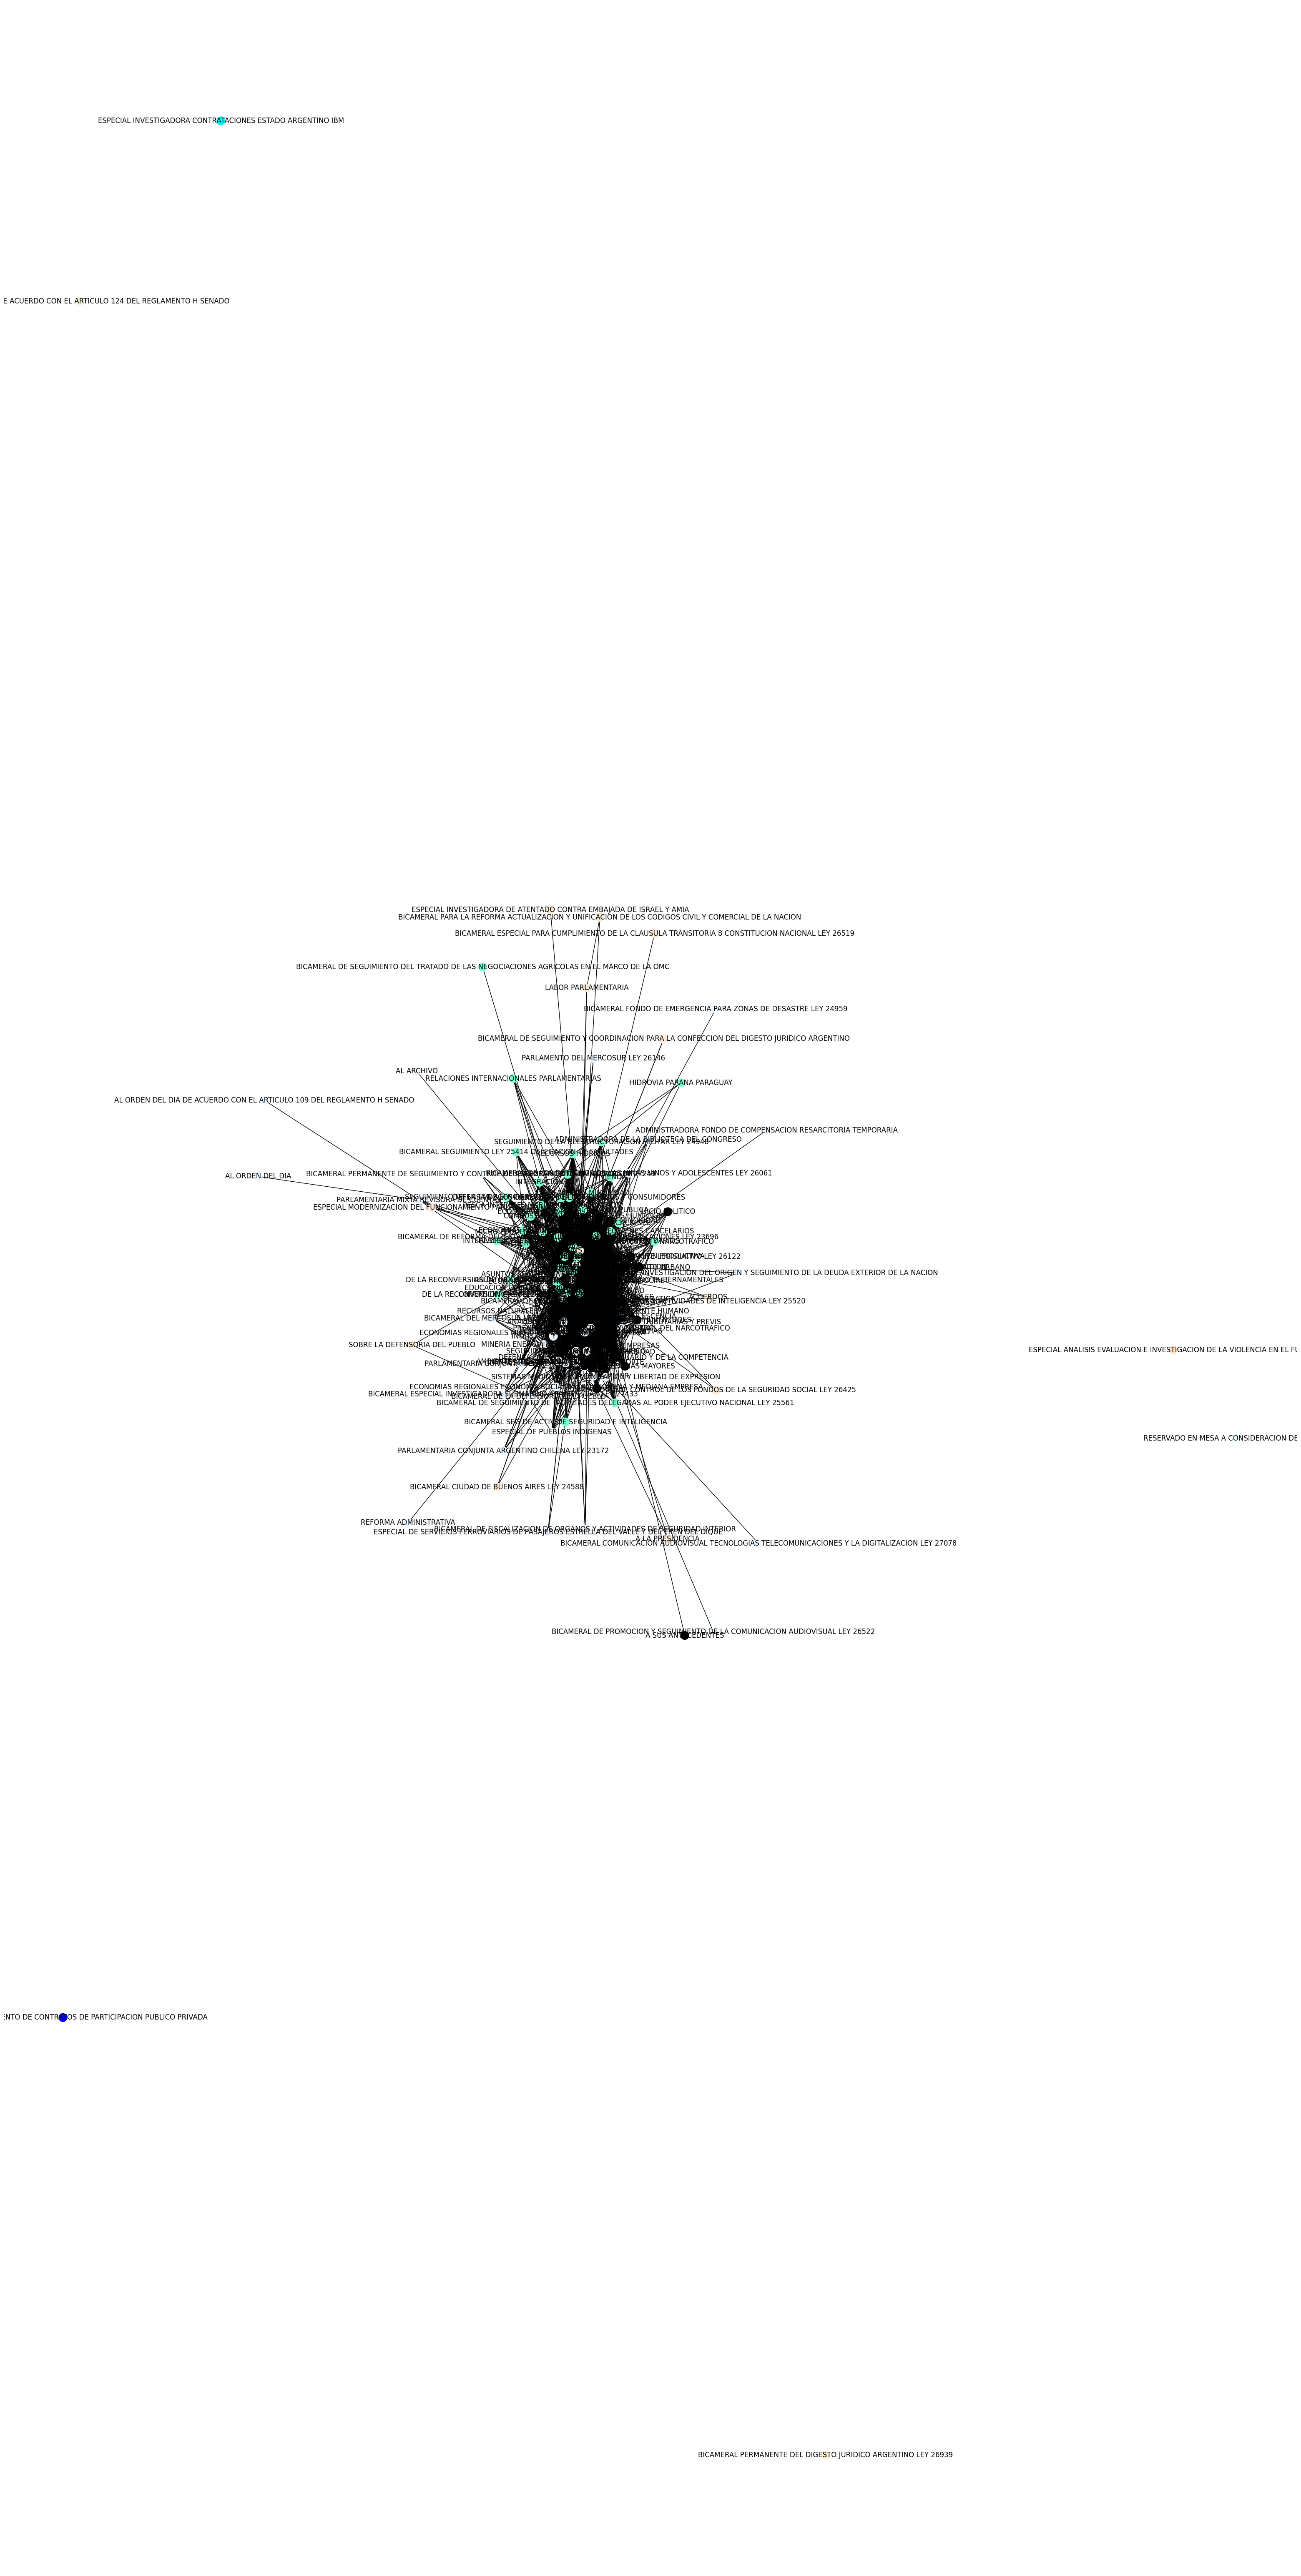

In [85]:
# louvain_communities
comunidades = nx.community.louvain_communities(
                G          = G_dinamica,
                #weight     = 'weight',
                resolution = 1,
                seed=123,
             )
# Tamaño de las comunidades
# ======================================================================================
print("Cantidad de Comunidades", len(comunidades))
tam = [len(comunidad) for comunidad in comunidades]
print(tam)


comunidades_map = {}
for i in range(len(comunidades)):
    comunidades_map.update(dict.fromkeys(comunidades[i], i))

print(comunidades_map)

# Colorear los nodos en función de la comunidad
# ======================================================================================
import matplotlib.colors as mcolors
color_pallet = list(mcolors.CSS4_COLORS.values())
color_nodos = []
for node in G_dinamica:
    color_nodos.append(color_pallet[comunidades_map[node]])

#https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html
pos = nx.spring_layout(G_dinamica,scale=1, iterations=20, seed=6)
fig, ax = plt.subplots(figsize=(40, 80))
nx.draw_networkx_edges(G_dinamica, pos)
nx.draw_networkx_nodes(G_dinamica, pos, node_color=color_nodos,  node_size=200)
nx.draw_networkx_labels(G_dinamica, pos,font_size=12)
plt.axis("off")
plt.show()


In [86]:
comunidades_map

{'SALUD Y DEPORTE': 0,
 'CIENCIA Y TECNOLOGIA': 0,
 'DERECHOS Y GARANTIAS': 0,
 'BICAMERAL ESPECIAL INVESTIGADORA SUBMARINO ARA SAN JUAN LEY 27433': 0,
 'PRESUPUESTO Y HACIENDA': 0,
 'AL ARCHIVO': 0,
 'INFRAESTRUCTURA VIVIENDA Y TRANSPORTE': 0,
 'BICAMERAL DE FISCALIZACION DE ORGANISMOS Y ACTIVIDADES DE INTELIGENCIA LEY 25520': 0,
 'BANCA DE LA MUJER': 0,
 'JUSTICIA Y ASUNTOS PENALES': 0,
 'BICAMERAL DE PROMOCION Y SEGUIMIENTO DE LA COMUNICACION AUDIOVISUAL LEY 26522': 0,
 'BICAMERAL PERMANENTE DE SEGUIMIENTO Y CONTROL DEUDA EXTERIOR DE LA NACION LEY 27249': 0,
 'ESPECIAL DE SERVICIOS FERROVIARIOS DE PASAJEROS ESTRELLA DEL VALLE Y DEL TREN DEL DIQUE': 0,
 'PARLAMENTO DEL MERCOSUR LEY 26146': 0,
 'ASUNTOS ADMINISTRATIVOS Y MUNICIPALES': 0,
 'COPARTICIPACION FEDERAL DE IMPUESTOS': 0,
 'ECONOMIA NACIONAL E INVERSION': 0,
 'SISTEMAS MEDIOS DE COMUNICACION Y LIBERTAD DE EXPRESION': 0,
 'ECONOMIAS REGIONALES ECONOMIA SOCIAL MICRO PEQUENA Y MEDIANA EMPRESA': 0,
 'TURISMO': 0,
 'BICAMERAL DE L

In [87]:
# Dataframe de comunidades de comisiones por distancia Levenshtein y algoritmo de comunidades louvain
dinamica_comi_df = pd.DataFrame.from_dict(comunidades_map, orient='index').reset_index()
dinamica_comi_df.columns = ['comision_nombre_norm','categ_louvain_dinamica']
dinamica_comi_df

comision_nombre_norm  \
0                                                           SALUD Y DEPORTE   
1                                                      CIENCIA Y TECNOLOGIA   
2                                                      DERECHOS Y GARANTIAS   
3         BICAMERAL ESPECIAL INVESTIGADORA SUBMARINO ARA SAN JUAN LEY 27433   
4                                                    PRESUPUESTO Y HACIENDA   
..                                                                      ...   
141                                                            TERCERA EDAD   
142                                                  DEFENSA DEL CONSUMIDOR   
143                                                     ASUNTOS MUNICIPALES   
144           BICAMERAL PERMANENTE DEL DIGESTO JURIDICO ARGENTINO LEY 26939   
145  BICAMERAL DE SEGUIMIENTO DE CONTRATOS DE PARTICIPACION PUBLICO PRIVADA   

     categ_louvain_dinamica  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
..                      ...  
141                       7  
142                       7  
143                       7  
144                       8  
145                       9  

[146 rows x 2 columns]

In [88]:
dinamica_comi_df[dinamica_comi_df['comision_nombre_norm'].str.contains('PRESUPUESTO')]
dinamica_comi_df[dinamica_comi_df['categ_louvain_dinamica']==0]


comision_nombre_norm  \
0                                                                                    SALUD Y DEPORTE   
1                                                                               CIENCIA Y TECNOLOGIA   
2                                                                               DERECHOS Y GARANTIAS   
3                                  BICAMERAL ESPECIAL INVESTIGADORA SUBMARINO ARA SAN JUAN LEY 27433   
4                                                                             PRESUPUESTO Y HACIENDA   
5                                                                                         AL ARCHIVO   
6                                                              INFRAESTRUCTURA VIVIENDA Y TRANSPORTE   
7                   BICAMERAL DE FISCALIZACION DE ORGANISMOS Y ACTIVIDADES DE INTELIGENCIA LEY 25520   
8                                                                                  BANCA DE LA MUJER   
9                                                                         JUSTICIA Y ASUNTOS PENALES   
10                     BICAMERAL DE PROMOCION Y SEGUIMIENTO DE LA COMUNICACION AUDIOVISUAL LEY 26522   
11               BICAMERAL PERMANENTE DE SEGUIMIENTO Y CONTROL DEUDA EXTERIOR DE LA NACION LEY 27249   
12           ESPECIAL DE SERVICIOS FERROVIARIOS DE PASAJEROS ESTRELLA DEL VALLE Y DEL TREN DEL DIQUE   
13                                                                 PARLAMENTO DEL MERCOSUR LEY 26146   
14                                                             ASUNTOS ADMINISTRATIVOS Y MUNICIPALES   
15                                                              COPARTICIPACION FEDERAL DE IMPUESTOS   
16                                                                     ECONOMIA NACIONAL E INVERSION   
17                                           SISTEMAS MEDIOS DE COMUNICACION Y LIBERTAD DE EXPRESION   
18                              ECONOMIAS REGIONALES ECONOMIA SOCIAL MICRO PEQUENA Y MEDIANA EMPRESA   
19                                                                                           TURISMO   
20                             BICAMERAL DE LOS DERECHOS DE LAS NINAS NINOS Y ADOLESCENTES LEY 26061   
21                                                                     AGRICULTURA GANADERIA Y PESCA   
22                                                             BICAMERAL DE LA DEFENSORIA DEL PUEBLO   
23                                      ADMINISTRADORA FONDO DE COMPENSACION RESARCITORIA TEMPORARIA   
24                                               PREVENCION DE ADICCIONES Y CONTROL DEL NARCOTRAFICO   
25                                              ECONOMIAS REGIONALES MICRO PEQUENA Y MEDIANA EMPRESA   
26  BICAMERAL PERMANENTE DE INVESTIGACION DEL ORIGEN Y SEGUIMIENTO DE LA DEUDA EXTERIOR DE LA NACION   
27                                                                  BICAMERAL DEL MERCOSUR LEY 24109   
28                                                                            REFORMA ADMINISTRATIVA   
29                                                     PARLAMENTARIA CONJUNTA DEL MERCOSUR LEY 23981   
30                                                                 AMBIENTE Y DESARROLLO SUSTENTABLE   
31                                                                               EDUCACION Y CULTURA   
32                         BICAMERAL DE FISCALIZACION DE ORGANOS Y ACTIVIDADES DE SEGURIDAD INTERIOR   
33                           AL ORDEN DEL DIA DE ACUERDO CON EL ARTICULO 109 DEL REGLAMENTO H SENADO   
34                                    BICAMERAL FONDO DE EMERGENCIA PARA ZONAS DE DESASTRE LEY 24959   
35                                                            EDUCACION CULTURA CIENCIA Y TECNOLOGIA   
36   BICAMERAL COMUNICACION AUDIOVISUAL TECNOLOGIAS TELECOMUNICACIONES Y LA DIGITALIZACION LEY 27078   
37                                                           PARLAMENTARIA MIXTA REVISORA DE CUENTAS   
38                      

In [89]:
dinamica_comi_df[dinamica_comi_df['comision_nombre_norm'].str.contains('SALUD')] # SE ENCUENTRA EN GRUPO DE PRESUPUESTO
dinamica_comi_df[dinamica_comi_df['categ_louvain_dinamica']==3] #0 3 7

comision_nombre_norm  \
60                                   BICAMERAL SEGUIMIENTO LEY 25414 DELEGACION DE FACULTADES   
61                                                     PESCA INTERESES MARITIMOS Y PORTUARIOS   
62                                         BICAMERAL SEG DE ACTIV DE SEGURIDAD E INTELIGENCIA   
63                                                            ECONOMIAS Y DESARROLLO REGIONAL   
64                                                                                INTEGRACION   
65                                                                DROGADICCION Y NARCOTRAFICO   
66                                       SEGUIMIENTO DE LA REESTRUCTURACION MILITAR LEY 24948   
67                                                                          RECURSOS HIDRICOS   
68                                                                 TRABAJO Y PREVISION SOCIAL   
69     BICAMERAL DE SEGUIMIENTO DE FACULTADES DELEGADAS AL PODER EJECUTIVO NACIONAL LEY 25561   
70                                           SEGUIMIENTO DE LA EMERGENCIA ECONOMICA LEY 23697   
71                                                            MICRO PEQUENA Y MEDIANA EMPRESA   
72                                                  RELACIONES INTERNACIONALES PARLAMENTARIAS   
73                                                               ECOLOGIA Y DESARROLLO HUMANO   
74                                                                                   COMERCIO   
75                                                                                  INDUSTRIA   
76                                                                               COMBUSTIBLES   
77  BICAMERAL DE SEGUIMIENTO DEL TRATADO DE LAS NEGOCIACIONES AGRICOLAS EN EL MARCO DE LA OMC   
78                                                                                  INVERSION   
79                                                                                   ECONOMIA   
80                                                                             OBRAS PUBLICAS   
81                                                              DE ASESORAMIENTO DEL MERCOSUR   
82                                                                        FAMILIA Y MINORIDAD   
83             BICAMERAL DE REFORMA DEL ESTADO Y SEGUIMIENTO DE LAS PRIVATIZACIONES LEY 23696   
84                                        DE LA RECONVERSION DE INDUSTRIA ELECTRICA LEY 24065   
85                                                                                    ENERGIA   
86                                                                     POBLACION Y DESARROLLO   
87                                                                     ENERGIA Y COMBUSTIBLES   
88                                                                             COMUNICACIONES   
89                                                          ASISTENCIA SOCIAL Y SALUD PUBLICA   
90                                                    ASUNTOS PENALES Y REGIMENES CARCELARIOS   
91                                                                   HIDROVIA PARANA PARAGUAY   
92                                                                       ECONOMIAS REGIONALES   
93                                                                                   VIVIENDA   
94                                                                    AGRICULTURA Y GANADERIA   
95                                                                        LEGISLACION GENERAL   
96                                                                        INTERIOR Y JUSTICIA   
97                                     DEFENSA DE LOS DERECHOS DE LOS USUARIOS Y CONSUMIDORES   
98                                                              RELACIONES EXTERIORES Y CULTO   
99                                                      DE LA RECONVERSION GASIFERA LEY 24076   

    categ_louvain_dinamica  
60                       3  
61                       3  
62      

In [90]:
dinamica_comi_df[dinamica_comi_df['categ_louvain_dinamica']==7]

comision_nombre_norm  \
103                                   DE LAS PERSONAS MAYORES   
104                                                  FINANZAS   
105                                     LIBERTAD DE EXPRESION   
106                                           JUICIO POLITICO   
107                        FAMILIA MUJER NINEZ Y ADOLESCENCIA   
108                                              DROGADICCION   
109                            VIVIENDA Y ORDENAMIENTO URBANO   
110     ANALISIS Y SEGUIMIENTO DE NORMAS TRIBUTARIAS Y PREVIS   
111                                         LEGISLACION PENAL   
112                           PETICIONES PODERES Y REGLAMENTO   
113                                                 EDUCACION   
114                                        SEGURIDAD INTERIOR   
115      INTERESES MARITIMOS FLUVIALES PESQUEROS Y PORTUARIOS   
116                              PEQUENAS Y MEDIANAS EMPRESAS   
117     BICAMERAL PERMANENTE DE TRAMITE LEGISLATIVO LEY 26122   
118                                              DISCAPACIDAD   
119                              PREVISION Y SEGURIDAD SOCIAL   
120                                                  JUSTICIA   
121                              DERECHOS HUMANOS Y GARANTIAS   
122                              COMUNICACIONES E INFORMATICA   
123                              POBLACION Y RECURSOS HUMANOS   
124                                              SOBRE TABLAS   
125     RECURSOS NATURALES Y CONSERVACION DEL AMBIENTE HUMANO   
126    DEFENSA DEL CONSUMIDOR DEL USUARIO Y DE LA COMPETENCIA   
127                                          DEFENSA NACIONAL   
128                             ACCION SOCIAL Y SALUD PUBLICA   
129                               FAMILIAS NINEZ Y JUVENTUDES   
130                                                   DEPORTE   
131  ASUNTOS COOPERATIVOS MUTUALES Y DE ORGNO GUBERNAMENTALES   
132                                                   MINERIA   
133                                      MUJERES Y DIVERSIDAD   
134                                               TRANSPORTES   
135                                        A SUS ANTECEDENTES   
136                                                  MERCOSUR   
137                                   LEGISLACION DEL TRABAJO   
138                                                   CULTURA   
139                CIENCIA TECNOLOGIA E INNOVACION PRODUCTIVA   
140                                 FAMILIA MUJER Y MINORIDAD   
141                                              TERCERA EDAD   
142                                    DEFENSA DEL CONSUMIDOR   
143                                       ASUNTOS MUNICIPALES   

     categ_louvain_dinamica  
103                       7  
104                       7  
105                       7  
106                       7  
107                       7  
108                       7  
109                       7  
110                       7  
111                       7  
112                       7  
113                       7  
114                       7  
115                       7  
116                       7  
117                       7  
118                       7  
119                       7  
120                       7  
121                       7  
122                       7  
123                       7  
124                       7  
125                       7  
126                       7  
127                       7  
128                       7  
129                       7  
130                       7  
131                       7  
132                       7  
133                       7  
134                       7  
135                       7  
136                       7  
137                       7  
138                       7  
139                       7  
140                       7  
141                       7  
142                       7  
143                       7

In [91]:
# Adaptamos tabla de centralidad
centralidad = centralidad.reset_index()
centralidad.columns = ['comision_nombre_norm', 'degree','centrality','eigenvector', 'pagerank', 'betweenness']
centralidad.head(3)


comision_nombre_norm  degree  centrality  eigenvector  pagerank  \
0            SOBRE TABLAS      28    0.193103     0.055928  0.005494   
1          OBRAS PUBLICAS      82    0.565517     0.132852  0.012973   
2  PRESUPUESTO Y HACIENDA     119    0.820690     0.154600  0.024041   

   betweenness  
0     0.002123  
1     0.008452  
2     0.121554

In [92]:
# Integramos tablas
dinamica_com_df = pd.merge(dinamica_comi_df,centralidad, how = 'left', left_on = 'comision_nombre_norm', right_on = 'comision_nombre_norm' )
dinamica_com_df = pd.merge(dinamica_com_df,aggmodelk_df, how = 'left', left_on = 'comision_nombre_norm', right_on = 'comision_nombre_norm' )
dinamica_com_df.describe(include = 'all'). T

count unique              top freq      mean  \
comision_nombre_norm      146    146  SALUD Y DEPORTE    1       NaN   
categ_louvain_dinamica  146.0    NaN              NaN  NaN   3.10274   
degree                  146.0    NaN              NaN  NaN  38.69863   
centrality              146.0    NaN              NaN  NaN  0.266887   
eigenvector             146.0    NaN              NaN  NaN  0.066378   
pagerank                146.0    NaN              NaN  NaN  0.006849   
betweenness             146.0    NaN              NaN  NaN  0.005073   
categ_agg_ward_k7       146.0    NaN              NaN  NaN  2.034247   
categ_agg_ward_k4       146.0    NaN              NaN  NaN  1.123288   

                              std       min       25%       50%       75%  \
comision_nombre_norm          NaN       NaN       NaN       NaN       NaN   
categ_louvain_dinamica   2.878528       0.0       0.0       3.0       7.0   
degree                  30.702436       0.0      6.25      37.0      65.0   
centrality               0.211741       0.0  0.043103  0.255172  0.448276   
eigenvector                0.0496       0.0  0.011057  0.068826  0.111495   
pagerank                 0.004755  0.001065  0.002237  0.006439  0.010507   
betweenness              0.015802       0.0  0.000004  0.000752  0.003927   
categ_agg_ward_k7        2.015165       0.0       0.0       2.0       4.0   
categ_agg_ward_k4        0.837817       0.0       0.0       1.0       2.0   

                             max  
comision_nombre_norm         NaN  
categ_louvain_dinamica       9.0  
degree                     119.0  
centrality               0.82069  
eigenvector               0.1546  
pagerank                 0.02418  
betweenness             0.131124  
categ_agg_ward_k7            6.0  
categ_agg_ward_k4            3.0

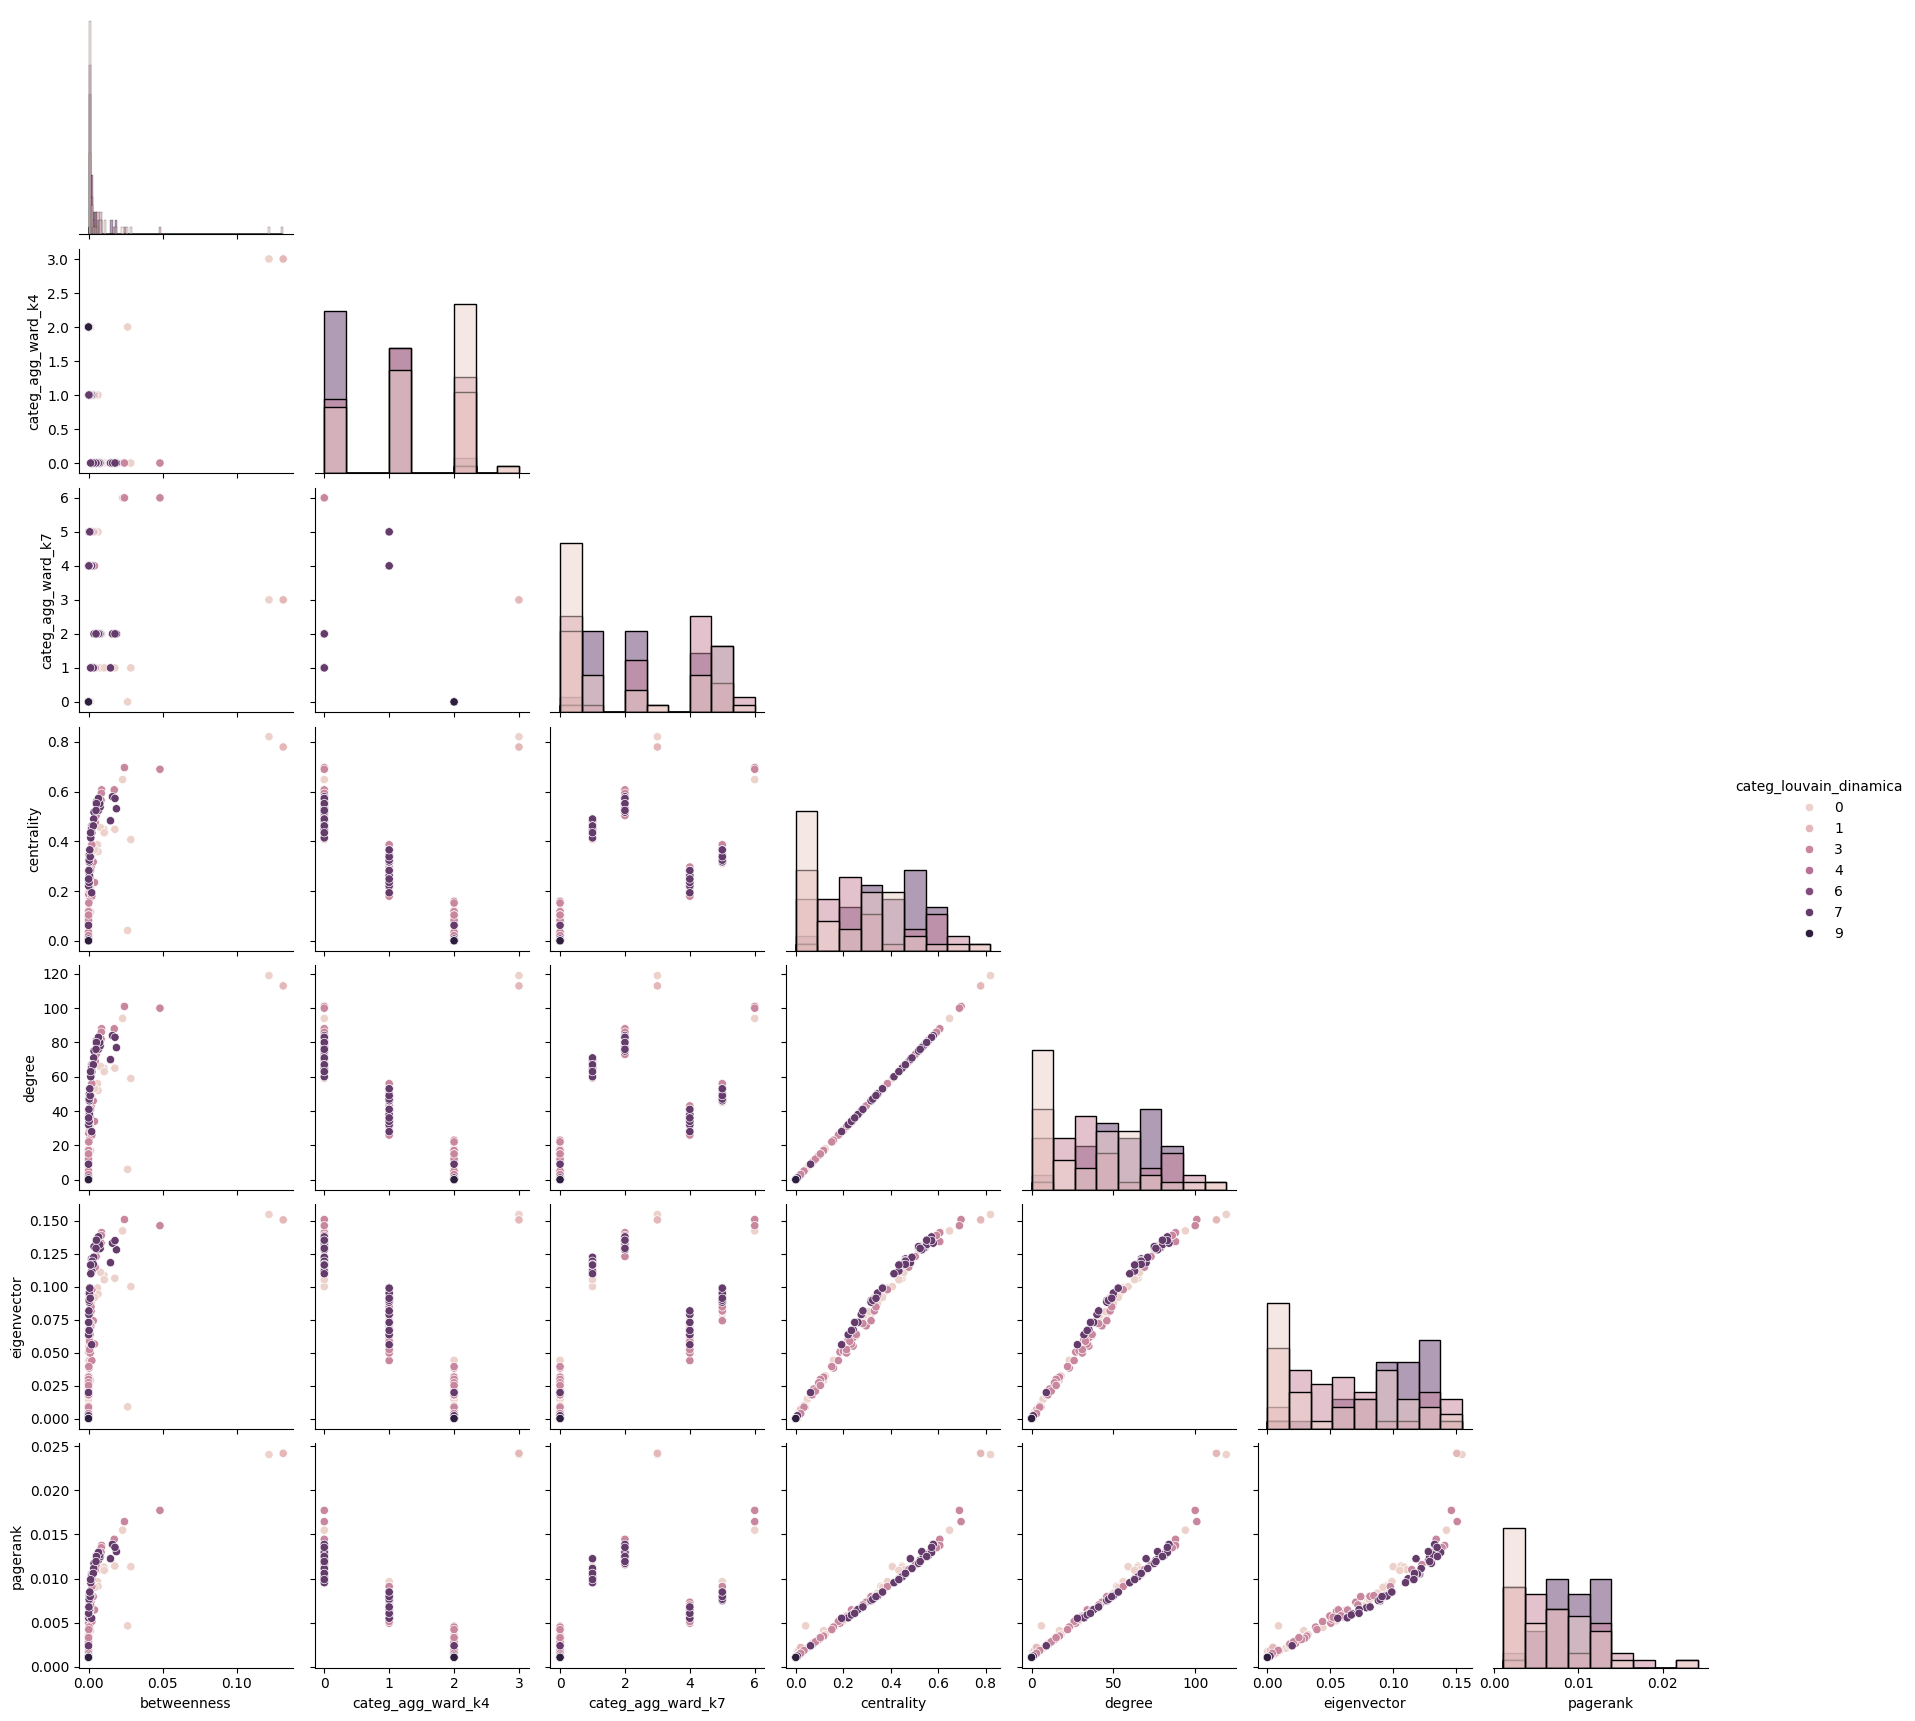

In [93]:
column = dinamica_com_df.select_dtypes(include=np.number).columns.union(["categ_louvain_dinamica"])
sns.pairplot(dinamica_com_df[column], hue="categ_louvain_dinamica", diag_kind="hist",corner=True)

In [94]:
# Integramos con información de fuzz
fuzz_df = pd.merge(fuzz_df, dinamica_com_df, how='outer', left_on='comision_nombre_norm' , right_on = 'comision_nombre_norm')
display(fuzz_df.info())
display(fuzz_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   comision_nombre_norm               146 non-null    object 
 1   fuzz_match                         146 non-null    object 
 2   fuzz_score                         146 non-null    int64  
 3   categ_louvain_LevenshteinMayor_60  146 non-null    float64
 4   categ_louvain_dinamica             146 non-null    int64  
 5   degree                             146 non-null    int64  
 6   centrality                         146 non-null    float64
 7   eigenvector                        146 non-null    float64
 8   pagerank                           146 non-null    float64
 9   betweenness                        146 non-null    float64
 10  categ_agg_ward_k7                  146 non-null    int64  
 11  categ_agg_ward_k4                  146 non-null    int64  

None

comision_nombre_norm  \
0                                              A LA PRESIDENCIA   
1                                            A SUS ANTECEDENTES   
2                                 ACCION SOCIAL Y SALUD PUBLICA   
3                                                      ACUERDOS   
4                  ADMINISTRADORA DE LA BIBLIOTECA DEL CONGRESO   
5  ADMINISTRADORA FONDO DE COMPENSACION RESARCITORIA TEMPORARIA   
6                                 AGRICULTURA GANADERIA Y PESCA   
7                                       AGRICULTURA Y GANADERIA   
8                                                    AL ARCHIVO   
9                                              AL ORDEN DEL DIA   

                                                     fuzz_match  fuzz_score  \
0                                           LABOR PARLAMENTARIA          51   
1                                              A LA PRESIDENCIA          41   
2                             ASISTENCIA SOCIAL Y SALUD PUBLICA          84   
3                                                      COMERCIO          50   
4  ADMINISTRADORA FONDO DE COMPENSACION RESARCITORIA TEMPORARIA          50   
5                  ADMINISTRADORA DE LA BIBLIOTECA DEL CONGRESO          52   
6                                       AGRICULTURA Y GANADERIA          88   
7                                 AGRICULTURA GANADERIA Y PESCA          88   
8                                           LEGISLACION GENERAL          48   
9                                SOBRE LA DEFENSORIA DEL PUEBLO          48   

   categ_louvain_LevenshteinMayor_60  categ_louvain_dinamica  degree  \
0                               -1.0                       1       2   
1                               -1.0                       7       1   
2                                9.0                       7      83   
3                               -1.0                       1       3   
4                               -1.0                       0       4   
5                               -1.0                       0       1   
6                                7.0                       0      50   
7                                7.0                       3      80   
8                               -1.0                       0       1   
9                               -1.0                       0       1   

   centrality  eigenvector  pagerank  betweenness  categ_agg_ward_k7  \
0    0.013793     0.003370  0.001413     0.000000                  0   
1    0.006897     0.002087  0.001209     0.000000                  0   
2    0.572414     0.137609  0.012957     0.006699                  2   
3    0.020690     0.007012  0.001537     0.000000                  0   
4    0.027586     0.007587  0.001674     0.000002                  0   
5    0.006897     0.002524  0.001236     0.000000                  0   
6    0.344828     0.087388  0.008339     0.001985                  5   
7    0.551724     0.133003  0.012467     0.005101                  2   
8    0.006897     0.002524  0.001236     0.000000                  0   
9    0.006897     0.000144  0.001725     0.000000                  0   

   categ_agg_ward_k4  
0                  2  
1                  2  
2                  0  
3                  2  
4                  2  
5                  2  
6                  1  
7                  0  
8                  2  
9                  2

####  3.3 En base a categorías definidas en papers
* 2023 - Actividad legislativa y territorio en Argentina: la presentación de proyectos en la Cámara de Diputados (2020-2021). VICTORIA ORTIZ DE ROZAS.
https://revista.saap.org.ar/contenido/revista-v17-n2/rsaap.17.2.a2.pdf . https://www.estudiossocialesdelestado.org/index.php/ese/article/view/266

    * Para ello, seguimos una clasificación —de carácter teórico y apriorístico— de comisiones más o menos “nacionales” o más o menos “territoriales”: comisiones que pueden ser consideradas más nacionales por su temática y el tipo de bienes involucrados —públicos “puros” —; aquellas de carácter sectorial —corporativas y relativas a sectores de la economía— donde cabe esperar un peso menor de proyectos territoriales; y por último comisiones que abarcan cuestiones distributivas y bienes divisibles, donde el peso de los proyectos territoriales se espera sea mayor(Ortiz de Rozas, 2023).
    * La clasificación propuesta se diferencia en parte con la propuesta por Shugart et al(2021), la cual diferencia a las comisiones en tres tipos: de alta política —economía, política exterior, defensa, sistema legal, temas constitucionales—; las que involucran bienes públicos —educación, salud, ambiente, telecomunicaciones y similares— y las de carácter distributivo, donde se tratan temáticas sectoriales relevantes para ciertos distritos. En Ortiz de Rozas (2023) agrupamos los dos primeros tipos en “comisiones nacionales”, ya que ambas abarcan bienes públicos; al tiempo que establecemos diferencias al interior de las comisiones distributivas, diferenciando las de carácter sectorial como un tipo especial dentro de las mismas, en tanto es posible identificar problemáticas sectoriales y corporativas no subsumibles a dimensiones territoriales. 

In [95]:
# Nueva categoria
comisiones_df['categ_OrtizDeRosa_Shugart'] = 'SIN CATEGORIZAR'

In [96]:
# *** Comisiones “nacionales” o de carácter menos territorial:
# 1er grupo : Relaciones Exteriores, la de Defensa y la de Seguridad Interior. Se trata de áreas de política pública eminentemente nacionales, que involucran bienes indivisibles de tipo “puro”: su disfrute no excluye a otros ciudadanos
# 2do grupo: Salud, Educación, Ciencia y Cultura, que también refieren a áreas de # política pública que involucran bienes de carácter indivisible.
# 3er grupo: Por último, incluimos en las comisiones de temática “nacional” a las comisiones de Familia, Género y Discapacidad, relativas a los derechos de grupos poblacionales.
# Legislación General, Relaciones Exteriores
# DE LAS PERSONAS MAYORES Y MUJERES ---LO AGREGUE POR DEFINICION
comi_list = ['MUJER','PERSONAS MAYORES','LEGISLACION GENERAL','RELACIONES EXTERIORES','DEFENSA','SEGURIDAD INTERIOR','SALUD','EDUCACION','CIENCIA Y CULTURA','CIENCIA','CULTURA','FAMILIA','GENERO','DISCAPACIDAD', 'DERECHO'] # DEFENSA DEL CONSUMIDOR, DEL USUARIO Y DE LA COMPETENCIA 	
comisiones_df.loc[comisiones_df.comision_nombre_norm.str.contains('|'.join(comi_list), regex=True), 'categ_OrtizDeRosa_Shugart'] = 'NACIONALES'
comisiones_df.loc[comisiones_df.comision_nombre_norm.str.contains('|'.join(comi_list), regex=True), ('comision_nombre_norm','categ_OrtizDeRosa_Shugart')]

comision_nombre_norm  \
14                            DERECHOS HUMANOS Y GARANTIAS   
16                                                 CULTURA   
20                                      SEGURIDAD INTERIOR   
22                                            DISCAPACIDAD   
24                                     LEGISLACION GENERAL   
25                           RELACIONES EXTERIORES Y CULTO   
27                                               EDUCACION   
30                           ACCION SOCIAL Y SALUD PUBLICA   
33                                        DEFENSA NACIONAL   
35                                 AGRICULTURA Y GANADERIA   
44                      FAMILIA MUJER NINEZ Y ADOLESCENCIA   
48  DEFENSA DEL CONSUMIDOR DEL USUARIO Y DE LA COMPETENCIA   
51                                 DE LAS PERSONAS MAYORES   
52              CIENCIA TECNOLOGIA E INNOVACION PRODUCTIVA   
53                             FAMILIAS NINEZ Y JUVENTUDES   
54                                    MUJERES Y DIVERSIDAD   

   categ_OrtizDeRosa_Shugart  
14                NACIONALES  
16                NACIONALES  
20                NACIONALES  
22                NACIONALES  
24                NACIONALES  
25                NACIONALES  
27                NACIONALES  
30                NACIONALES  
33                NACIONALES  
35                NACIONALES  
44                NACIONALES  
48                NACIONALES  
51                NACIONALES  
52                NACIONALES  
53                NACIONALES  
54                NACIONALES

En términos generales, en las comisiones legislativas clasificadas como nacionales,
los diputados nacionales realizaron planteos territoriales genéricos, en términos de
la articulación entre niveles de gobierno en la implementación de políticas, así como
de su uniformidad a lo largo del territorio; sin dejar de destacar el carácter único y
particular de algunas problemáticas específicas en determinados distritos. La parti-
cularidad de las situaciones que se plantearon en el llamado “interior profundo” −es-
pecíficamente aquellas zonas de menor concentración urbana donde las medidas de
aislamiento estricto resultaron problemáticas−, así como en las provincias limítrofes
y en una provincia de carácter insular como Tierra del Fuego; permitieron compleji-
zar la representación hegemónica de la pandemia en torno a sus efectos en el AMBA. PÁG 158 DE https://www.estudiossocialesdelestado.org/index.php/ese/article/view/266

In [97]:
# *** Comisiones “Sectoriales” o de carácter menos territorial:
# Comisiones sectoriales Aquellas comisiones cuyas temáticas podemos considerar más proclives a intervenciones de carácter sectorial −referidas a las demandas de tipo corporativo y/o relati-
#vas a un sector de la economía−, como Transporte, Agricultura, Pequeñas y Medianas Empresas, Asuntos cooperativos, Turismo
#Trabajo, Comercio
# Agricultura y Ganaderia, Industria, Legislación del Trabajo y Pymes.
# Mineria
comi_list = ['TRANSPORTE', 'AGRICULTURA','MINERIA', 'GANADERIA','PYME','INDUSTRIA','EMPRESA','ASUNTOS CORPORATIVO','TRABAJO','COMERCIO','TURISMO'] # LEGISLACION DEL TRABAJO
comisiones_df.loc[comisiones_df.comision_nombre_norm.str.contains('|'.join(comi_list), regex=True), 'categ_OrtizDeRosa_Shugart'] = 'SECTORIALES'
comisiones_df.loc[comisiones_df.comision_nombre_norm.str.contains('|'.join(comi_list), regex=True), ('comision_nombre_norm','categ_OrtizDeRosa_Shugart')]

comision_nombre_norm categ_OrtizDeRosa_Shugart
9                        TURISMO               SECTORIALES
11                       MINERIA               SECTORIALES
21  PEQUENAS Y MEDIANAS EMPRESAS               SECTORIALES
32       LEGISLACION DEL TRABAJO               SECTORIALES
35       AGRICULTURA Y GANADERIA               SECTORIALES
37                     INDUSTRIA               SECTORIALES
38                      COMERCIO               SECTORIALES
40                   TRANSPORTES               SECTORIALES

In [98]:
# *** Comisiones “Distributivas” 
# Obras Públicas , Vivienda y Ordenamiento Urbano.

comi_list = ['OBRAS PUBLICAS','VIVIENDA Y ORDENAMIENTO URBANO'] # , 'ACCION SOCIAL'
comisiones_df.loc[comisiones_df.comision_nombre_norm.str.contains('|'.join(comi_list), regex=True), 'categ_OrtizDeRosa_Shugart'] = 'DISTRIBUTIVAS'
comisiones_df.loc[comisiones_df.comision_nombre_norm.str.contains('|'.join(comi_list), regex=True), ('comision_nombre_norm','categ_OrtizDeRosa_Shugart')]

comision_nombre_norm categ_OrtizDeRosa_Shugart
5   VIVIENDA Y ORDENAMIENTO URBANO             DISTRIBUTIVAS
34                  OBRAS PUBLICAS             DISTRIBUTIVAS

En cuanto a la comisión de Acción social y Salud, podemos decir que se encuentran combinadas cuestiones ligadas a los derechos universales pero también cuestiones distributivas —sobre todo en el área de Acción social—, con lo cual resulta difícil evaluar esta comisión de acuerdo a la
expectativa teórica mencionada

In [99]:
comisiones_df['categ_OrtizDeRosa_Shugart'].describe()

count                  55
unique                  4
top       SIN CATEGORIZAR
freq                   30
Name: categ_OrtizDeRosa_Shugart, dtype: object

In [100]:
comisiones_df[comisiones_df['categ_OrtizDeRosa_Shugart'] == 'SIN CATEGORIZAR']

id  \
0   HCDN00014   
1   HCDN00015   
2   HCDN00016   
3   HCDN00020   
4   HCDN00022   
6   HCDN00024   
7   HCDN00025   
8   HCDN00026   
10  HCDN00028   
12  HCDN00031   
13  HCDN00033   
15  HCDN00035   
17  HCDN00038   
18  HCDN00039   
19  HCDN00041   
23  HCDN00045   
26  HCDN00048   
28  HCDN00051   
29  HCDN00052   
31  HCDN00055   
36  HCDN00060   
39  HCDN00063   
41  HCDN00066   
42  HCDN00103   
43  HCDN00118   
45  HCDN00133   
46  HCDN00157   
47  HCDN00158   
49  HCDN00168   
50  HCDN00177   

                                                                                comision_nombre  \
0                             ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC. DE OBRAS VIALES   
1                       ESPECIAL INVESTIGADORA DE HECHOS ILICITOS Y CORRUPCION CONTRA EL ESTADO   
2                                  ESPECIAL INVESTIGADORA CONTRATACIONES ESTADO ARGENTINO - IBM   
3                                     ESPECIAL INVESTIGADORA ADMINISTRACION NACIONAL DE ADUANAS   
4                                                                           ASUNTOS MUNICIPALES   
6                                                              PETICIONES, PODERES Y REGLAMENTO   
7                                                                               JUICIO POLITICO   
8                                         RECURSOS NATURALES Y CONSERVACION DEL AMBIENTE HUMANO   
10                                                                                     ECONOMIA   
12                                                                                     DEPORTES   
13                                       ANALISIS Y SEGUIMIENTO DE NORMAS TRIBUTARIAS Y PREVIS.   
15                                       INTERESES MARITIMOS, FLUVIALES, PESQUEROS Y PORTUARIOS   
17                                   ASUNTOS COOPERATIVOS, MUTUALES Y DE ORG.NO GUBERNAMENTALES   
18                                                                                     MERCOSUR   
19                                                                        LIBERTAD DE EXPRESION   
23                                                                     ASUNTOS CONSTITUCIONALES   
26                                                                       PRESUPUESTO Y HACIENDA   
28                                                                                     JUSTICIA   
29                                                                 PREVISION Y SEGURIDAD SOCIAL   
31                                                                            LEGISLACION PENAL   
36                                                                                     FINANZAS   
39                                                                       ENERGIA Y COMBUSTIBLES   
41                                                              ECONOMIAS Y DESARROLLO REGIONAL   
42                        ESPECIAL INVESTIGADORA HECHOS ILICITOS VINCULADOS AL LAVADO DE DINERO   
43                                      ESPECIAL MODERNIZACION DEL FUNCIONAMIENTO PARLAMENTARIO   
45                                          PREVENCION DE ADICCIONES Y CONTROL DEL NARCOTRAFICO   
46                                                                POBLACION Y DESARROLLO HUMANO   
47                        ESPECIAL DE SEGUIMIENTO OBRAS PARA EL APROVECHAMIENTO DEL RIO BERMEJO   
49  ESPECIAL SEGUIMIENTO EMPRENDIMIENTOS HIDROELECTRICOS DE YACYRETA, CORPUS, GARABI Y RONCADOR   
50                       MIXTA UNICAMERAL OBSERVATORIO PARLAMENTARIO SOBRE LA CUESTION MALVINAS   

   comision_grupo  periodo_inicio  periodo_finaliacion fecha_inicio  \
0              CD             116                  999   01/03/1998   
1              CD             116                  999   01/03/1998   
2              CD             116                  999   01/03/1998   
3              CD             116                  999   01/03/1998   
4              CD             116                  999   0

In [101]:
# Integramos con información de comision base
fuzz_comisiones_df = pd.merge(fuzz_df, comisiones_df, how='outer', left_on='comision_nombre_norm' , right_on = 'comision_nombre_norm', indicator = True)
display(fuzz_comisiones_df.info())
display(fuzz_comisiones_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   comision_nombre_norm               153 non-null    object  
 1   fuzz_match                         146 non-null    object  
 2   fuzz_score                         146 non-null    float64 
 3   categ_louvain_LevenshteinMayor_60  146 non-null    float64 
 4   categ_louvain_dinamica             146 non-null    float64 
 5   degree                             146 non-null    float64 
 6   centrality                         146 non-null    float64 
 7   eigenvector                        146 non-null    float64 
 8   pagerank                           146 non-null    float64 
 9   betweenness                        146 non-null    float64 
 10  categ_agg_ward_k7                  146 non-null    float64 
 11  categ_agg_ward_k4                  146 non-nu

None

comision_nombre_norm  \
0                                              A LA PRESIDENCIA   
1                                            A SUS ANTECEDENTES   
2                                 ACCION SOCIAL Y SALUD PUBLICA   
3                                                      ACUERDOS   
4                  ADMINISTRADORA DE LA BIBLIOTECA DEL CONGRESO   
5  ADMINISTRADORA FONDO DE COMPENSACION RESARCITORIA TEMPORARIA   
6                                 AGRICULTURA GANADERIA Y PESCA   
7                                       AGRICULTURA Y GANADERIA   
8                                                    AL ARCHIVO   
9                                              AL ORDEN DEL DIA   

                                                     fuzz_match  fuzz_score  \
0                                           LABOR PARLAMENTARIA        51.0   
1                                              A LA PRESIDENCIA        41.0   
2                             ASISTENCIA SOCIAL Y SALUD PUBLICA        84.0   
3                                                      COMERCIO        50.0   
4  ADMINISTRADORA FONDO DE COMPENSACION RESARCITORIA TEMPORARIA        50.0   
5                  ADMINISTRADORA DE LA BIBLIOTECA DEL CONGRESO        52.0   
6                                       AGRICULTURA Y GANADERIA        88.0   
7                                 AGRICULTURA GANADERIA Y PESCA        88.0   
8                                           LEGISLACION GENERAL        48.0   
9                                SOBRE LA DEFENSORIA DEL PUEBLO        48.0   

   categ_louvain_LevenshteinMayor_60  categ_louvain_dinamica  degree  \
0                               -1.0                     1.0     2.0   
1                               -1.0                     7.0     1.0   
2                                9.0                     7.0    83.0   
3                               -1.0                     1.0     3.0   
4                               -1.0                     0.0     4.0   
5                               -1.0                     0.0     1.0   
6                                7.0                     0.0    50.0   
7                                7.0                     3.0    80.0   
8                               -1.0                     0.0     1.0   
9                               -1.0                     0.0     1.0   

   centrality  eigenvector  pagerank  betweenness  ...         id  \
0    0.013793     0.003370  0.001413     0.000000  ...        NaN   
1    0.006897     0.002087  0.001209     0.000000  ...        NaN   
2    0.572414     0.137609  0.012957     0.006699  ...  HCDN00053   
3    0.020690     0.007012  0.001537     0.000000  ...        NaN   
4    0.027586     0.007587  0.001674     0.000002  ...        NaN   
5    0.006897     0.002524  0.001236     0.000000  ...        NaN   
6    0.344828     0.087388  0.008339     0.001985  ...        NaN   
7    0.551724     0.133003  0.012467     0.005101  ...  HCDN00059   
8    0.006897     0.002524  0.001236     0.000000  ...        NaN   
9    0.006897     0.000144  0.001725     0.000000  ...        NaN   

                 comision_nombre comision_grupo periodo_inicio  \
0                            NaN            NaN            NaN   
1                            NaN            NaN            NaN   
2  ACCION SOCIAL Y SALUD PUBLICA             CD          116.0   
3                            NaN            NaN            NaN   
4                            NaN            NaN            NaN   
5                            NaN            NaN            NaN   
6                            NaN            NaN            NaN   
7        AGRICULTURA Y GANADERIA             CD          116.0   
8                            NaN            NaN            NaN   
9                            NaN            NaN            NaN   

  periodo_finaliacion  fecha_inicio  fecha_finalizacion Tipo de ComisiÃ³n  \
0                 NaN           NaN                 NaN               NaN   
1

In [102]:
# Controlando comisiones que no tiene información de comisión base
fuzz_comisiones_df['_merge'].value_counts()

_merge
left_only     98
both          48
right_only     7
Name: count, dtype: int64

In [103]:
fuzz_comisiones_df[fuzz_comisiones_df['_merge'] == 'right_only']

comision_nombre_norm  \
79                            ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC DE OBRAS VIALES   
82                       ESPECIAL DE SEGUIMIENTO OBRAS PARA EL APROVECHAMIENTO DEL RIO BERMEJO   
84                                   ESPECIAL INVESTIGADORA ADMINISTRACION NACIONAL DE ADUANAS   
87                     ESPECIAL INVESTIGADORA DE HECHOS ILICITOS Y CORRUPCION CONTRA EL ESTADO   
88                       ESPECIAL INVESTIGADORA HECHOS ILICITOS VINCULADOS AL LAVADO DE DINERO   
90   ESPECIAL SEGUIMIENTO EMPRENDIMIENTOS HIDROELECTRICOS DE YACYRETA CORPUS GARABI Y RONCADOR   
116                     MIXTA UNICAMERAL OBSERVATORIO PARLAMENTARIO SOBRE LA CUESTION MALVINAS   

    fuzz_match  fuzz_score  categ_louvain_LevenshteinMayor_60  \
79         NaN         NaN                                NaN   
82         NaN         NaN                                NaN   
84         NaN         NaN                                NaN   
87         NaN         NaN                                NaN   
88         NaN         NaN                                NaN   
90         NaN         NaN                                NaN   
116        NaN         NaN                                NaN   

     categ_louvain_dinamica  degree  centrality  eigenvector  pagerank  \
79                      NaN     NaN         NaN          NaN       NaN   
82                      NaN     NaN         NaN          NaN       NaN   
84                      NaN     NaN         NaN          NaN       NaN   
87                      NaN     NaN         NaN          NaN       NaN   
88                      NaN     NaN         NaN          NaN       NaN   
90                      NaN     NaN         NaN          NaN       NaN   
116                     NaN     NaN         NaN          NaN       NaN   

     betweenness  ...         id  \
79           NaN  ...  HCDN00014   
82           NaN  ...  HCDN00158   
84           NaN  ...  HCDN00020   
87           NaN  ...  HCDN00015   
88           NaN  ...  HCDN00103   
90           NaN  ...  HCDN00168   
116          NaN  ...  HCDN00177   

                                                                                 comision_nombre  \
79                             ESPECIAL ANALISIS DEL SISTEMA POR PEAJE Y FINANC. DE OBRAS VIALES   
82                         ESPECIAL DE SEGUIMIENTO OBRAS PARA EL APROVECHAMIENTO DEL RIO BERMEJO   
84                                     ESPECIAL INVESTIGADORA ADMINISTRACION NACIONAL DE ADUANAS   
87                       ESPECIAL INVESTIGADORA DE HECHOS ILICITOS Y CORRUPCION CONTRA EL ESTADO   
88                         ESPECIAL INVESTIGADORA HECHOS ILICITOS VINCULADOS AL LAVADO DE DINERO   
90   ESPECIAL SEGUIMIENTO EMPRENDIMIENTOS HIDROELECTRICOS DE YACYRETA, CORPUS, GARABI Y RONCADOR   
116                       MIXTA UNICAMERAL OBSERVATORIO PARLAMENTARIO SOBRE LA CUESTION MALVINAS   

    comision_grupo periodo_inicio periodo_finaliacion  fecha_inicio  \
79              CD          116.0               999.0    01/03/1998   
82              CD          116.0               999.0    28/07/1994   
84              CD          116.0               999.0    01/03/1998   
87              CD          116.0               999.0    01/03/1998   
88              CD          119.0               999.0    01/03/2001   
90              CD          127.0               999.0    12/03/2009   
116             CD          125.0               999.0    17/05/2006   

     fecha_finalizacion Tipo de ComisiÃ³n categ_OrtizDeRosa_Shugart  \
79                    0                 E           SIN CATEGORIZAR   
82                    0                 E           SIN CATEGORIZAR   
84                    0                 E           SIN CATEGORIZAR   
87                    0                 E           SIN CATEGORIZAR   
88                    0                 E           SIN CATEGORIZAR   
90                    0                 E           SIN CATEGORIZAR   
116                

In [104]:
fuzz_comisiones_df.rename(columns={'Tipo de ComisiÃ³n': 'tipo de comision','periodo_finaliacion': 'periodo_finalizacion'}, inplace=True)

In [105]:
fuzz_comisiones_df.columns

Index(['comision_nombre_norm', 'fuzz_match', 'fuzz_score',
       'categ_louvain_LevenshteinMayor_60', 'categ_louvain_dinamica', 'degree',
       'centrality', 'eigenvector', 'pagerank', 'betweenness',
       'categ_agg_ward_k7', 'categ_agg_ward_k4', 'id', 'comision_nombre',
       'comision_grupo', 'periodo_inicio', 'periodo_finalizacion',
       'fecha_inicio', 'fecha_finalizacion', 'tipo de comision',
       'categ_OrtizDeRosa_Shugart', '_merge'],
      dtype='object')

In [106]:
#Recordando mean
mean = dframe1.fuzz_score.mean()# 63.93150684931507
mean

np.float64(63.93150684931507)

In [107]:
### Limpiando NA
values = {"categ_louvain_LevenshteinMayor_60": -1, 'fuzz_match' : 'sin dato', 'fuzz_score': mean, 'id': 'sin dato', 'id': 'sin dato', 'tipo de comision': 'sin dato', 'periodo_inicio':0, 'periodo_finalizacion':0}
fuzz_comisiones_df.fillna(value=values, inplace = True)
fuzz_comisiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   comision_nombre_norm               153 non-null    object  
 1   fuzz_match                         153 non-null    object  
 2   fuzz_score                         153 non-null    float64 
 3   categ_louvain_LevenshteinMayor_60  153 non-null    float64 
 4   categ_louvain_dinamica             146 non-null    float64 
 5   degree                             146 non-null    float64 
 6   centrality                         146 non-null    float64 
 7   eigenvector                        146 non-null    float64 
 8   pagerank                           146 non-null    float64 
 9   betweenness                        146 non-null    float64 
 10  categ_agg_ward_k7                  146 non-null    float64 
 11  categ_agg_ward_k4                  146 non-nu

In [108]:
# Guardamos el archivo binario comisiones relacionadas por similitud de nombre
with open('com_fuzz_comisiones_df_20241031.pkl', 'wb') as file:
    pickle.dump(fuzz_comisiones_df,file)

### 4 - EDA de comisiones normalizadas

* La Cámara de Diputados cuenta actualmente con 46 comisiones permanentes, mostrando un marcado crecimiento desde 1983, cuando contaba con sólo 26 comisiones. En promedio los legisladores participan en cinco comisiones, si bien algunos llegan a hacerlo en 10 comisiones (Tchintian, Abdala y Bertazzo, 2021: 8). PÁG 246 de https://revista.saap.org.ar/contenido/revista-v17-n2/rsaap.17.2.a2.pdf
* En el dataset se observa que de las 55 comisiones con información, que llamaremos base, 43 inician en el 01/03/1998.
* Se identifican en datos abiertos de giros de proyectos a comisiones, 146 nombres de comisión normalizados, de 149 únicos determinados.
* PRESUPUESTO Y HACIENDA es la comisión en donde se gira la mayoría de los proyectos.
    * https://www.hcdn.gob.ar/comisiones/permanentes/cpyhacienda/competencia.html 
* Se identifican proyectos con un máximo de 13 giros a comisiones.
    * Artículo 102. Estudio de un asunto por dos o más comisiones Cuando un asunto sea de carácter mixto, corresponde su estudio a las respectivas
comisiones, las cuales podrán abordarlo reunidas al efecto o iniciar por separado ese estudio, con aviso a la otra u otras, pero el anteproyecto deberá ser sometido al despacho en pleno de las comisiones a que haya sido destinado el asunto. Cuando un asunto sea girado a una o más comisiones especializadas y también a la de Presupuesto y Hacienda, aquélla o aquéllas formularán su anteproyecto y ésta deberá despacharlo en el plazo de un mes. Si así no lo hiciera, el anteproyecto de la o de las comisiones especializadas pasará a la Cámara como despacho de la o de las comisiones respectivas, haciéndose constar esta circunstancia en el Orden del Día correspondiente.  Reglamento de Diputados: https://www.congreso.gob.ar/reglamentoDiputados.pdf


In [109]:
# Controlar nulos
girocom_df.isnull().sum().sort_values(ascending=False)

proyecto_id             0
comision                0
orden                   0
comision_nombre_norm    0
dtype: int64

In [110]:
# Puede haber proyectos con màs de 1 giro. Va a depender de comisiones asociadas a proyectos
girocom_df['proyecto_id'].value_counts()

proyecto_id
HCDN061700    13
HCDN010321    13
HCDN040870    11
HCDN011280    11
HCDN006292    11
              ..
HCDN272748     1
HCDN272747     1
HCDN272746     1
HCDN272745     1
HCDN272744     1
Name: count, Length: 259585, dtype: int64

In [111]:
# Chequear en sentido de un proyecto con varios giro. Se repite RELACIONES EXTERIORES Y CULTO y PRESUPUESTO Y HACIENDA
girocom_df[girocom_df['proyecto_id']== 'HCDN061700'].sort_values(by =['orden'], ascending=False)

proyecto_id                           comision  orden  \
110450  HCDN061700             PRESUPUESTO Y HACIENDA     13   
110449  HCDN061700  AMBIENTE Y DESARROLLO SUSTENTABLE     12   
110448  HCDN061700         JUSTICIA Y ASUNTOS PENALES     11   
110447  HCDN061700      RELACIONES EXTERIORES Y CULTO     10   
110446  HCDN061700                   DEFENSA NACIONAL      9   
110445  HCDN061700             PRESUPUESTO Y HACIENDA      8   
110444  HCDN061700      ACCION SOCIAL Y SALUD PUBLICA      7   
110443  HCDN061700                  LEGISLACION PENAL      6   
110442  HCDN061700                          INDUSTRIA      5   
110453  HCDN061700                           COMERCIO      4   
110452  HCDN061700                 SEGURIDAD INTERIOR      3   
110451  HCDN061700                   DEFENSA NACIONAL      2   
110454  HCDN061700      RELACIONES EXTERIORES Y CULTO      1   

                     comision_nombre_norm  
110450             PRESUPUESTO Y HACIENDA  
110449  AMBIENTE Y DESARROLLO SUSTENTABLE  
110448         JUSTICIA Y ASUNTOS PENALES  
110447      RELACIONES EXTERIORES Y CULTO  
110446                   DEFENSA NACIONAL  
110445             PRESUPUESTO Y HACIENDA  
110444      ACCION SOCIAL Y SALUD PUBLICA  
110443                  LEGISLACION PENAL  
110442                          INDUSTRIA  
110453                           COMERCIO  
110452                 SEGURIDAD INTERIOR  
110451                   DEFENSA NACIONAL  
110454      RELACIONES EXTERIORES Y CULTO

In [112]:
# Controlar duplicados
girocom_df[girocom_df.duplicated(keep=False)]

Empty DataFrame
Columns: [proyecto_id, comision, orden, comision_nombre_norm]
Index: []

In [113]:
# Eliminar giros duplicados
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
print("Antes de eliminar duplicados:", girocom_df.shape)
girocom_df.drop_duplicates(keep='last', inplace=True)
print("Despues de eliminar duplicados:", girocom_df.shape)

Antes de eliminar duplicados: (392089, 4)
Despues de eliminar duplicados: (392089, 4)


In [114]:
# Me interesa la relación proyecto y comisión. No la cantidad de veces girado a dicha comisión
giro_com_nombre_df = girocom_df[['proyecto_id','comision','comision_nombre_norm']].copy()
print("Antes de eliminar duplicados (relación proyecto y comisión):", giro_com_nombre_df.shape)
giro_com_nombre_df.drop_duplicates(keep='last', inplace=True)
print("Despues de eliminar duplicados (relación proyecto y comisión):", giro_com_nombre_df.shape)


Antes de eliminar duplicados (relación proyecto y comisión): (392089, 3)
Despues de eliminar duplicados (relación proyecto y comisión): (388202, 3)


In [115]:
giro_com_nombre_df.describe(include='all').T

count  unique                     top   freq
proyecto_id           388202  259585              HCDN006292     11
comision              388202     195  PRESUPUESTO Y HACIENDA  44728
comision_nombre_norm  388202     146  PRESUPUESTO Y HACIENDA  45487

In [116]:
# Cantidad de proyectos únicos
proy_cant = giro_com_nombre_df.proyecto_id.unique().size
print('Cantidad de proyectos únicos: ', proy_cant)

Cantidad de proyectos únicos:  259585


In [117]:
45487/259585

0.1752296935493191

In [118]:
# 388202 relación proyecto - comisión (1 a 1). Existen 259585 proyecto unicos (proyecto_id)
prop_proyCom_df = giro_com_nombre_df.comision_nombre_norm.value_counts(sort=True).reset_index()
prop_proyCom_df['proportion'] = round(prop_proyCom_df['count'] / proy_cant, 4) * 100
prop_proyCom_df

comision_nombre_norm  \
0                                                                                 PRESUPUESTO Y HACIENDA   
1                                                                                    EDUCACION Y CULTURA   
2                                                                          RELACIONES EXTERIORES Y CULTO   
3                                                                          ACCION SOCIAL Y SALUD PUBLICA   
4                                                                                    LEGISLACION GENERAL   
..                                                                                                   ...   
141                            ESPECIAL ANALISIS EVALUACION E INVESTIGACION DE LA VIOLENCIA EN EL FUTBOL   
142  BICAMERAL PARA LA REFORMA ACTUALIZACION Y UNIFICACION DE LOS CODIGOS CIVIL Y COMERCIAL DE LA NACION   
143                                  ESPECIAL INVESTIGADORA DE ATENTADO CONTRA EMBAJADA DE ISRAEL Y AMIA   
144     BICAMERAL PERMANENTE DE INVESTIGACION DEL ORIGEN Y SEGUIMIENTO DE LA DEUDA EXTERIOR DE LA NACION   
145                                                                                     AL ORDEN DEL DIA   

     count  proportion  
0    45487       17.52  
1    18545        7.14  
2    17108        6.59  
3    16814        6.48  
4    15323        5.90  
..     ...         ...  
141      1        0.00  
142      1        0.00  
143      1        0.00  
144      1        0.00  
145      1        0.00  

[146 rows x 3 columns]

In [119]:
# Distribución de porcentajes
quartiles = prop_proyCom_df['proportion'].quantile([0.25, 0.5, 0.75])
print('Cuartiles cantidad de proyectos por comisión:\n', quartiles)

Cuartiles cantidad de proyectos por comisión:
 0.25    0.0100
0.50    0.2300
0.75    1.3775
Name: proportion, dtype: float64


In [120]:
display("Superior al 3er quartil (0.75) ",prop_proyCom_df[prop_proyCom_df['proportion'] > quartiles[0.75] ])

'Superior al 3er quartil (0.75) '

comision_nombre_norm  count  proportion
0                                  PRESUPUESTO Y HACIENDA  45487       17.52
1                                     EDUCACION Y CULTURA  18545        7.14
2                           RELACIONES EXTERIORES Y CULTO  17108        6.59
3                           ACCION SOCIAL Y SALUD PUBLICA  16814        6.48
4                                     LEGISLACION GENERAL  15323        5.90
5                                                 CULTURA  13196        5.08
6                                ASUNTOS CONSTITUCIONALES  13156        5.07
7                                               EDUCACION  10714        4.13
8                                 AGRICULTURA Y GANADERIA  10035        3.87
9                                 LEGISLACION DEL TRABAJO   9826        3.79
10                                            TRANSPORTES   9797        3.77
11                                      LEGISLACION PENAL   9121        3.51
12                          POBLACION Y DESARROLLO HUMANO   7695        2.96
13                                                DEPORTE   6741        2.60
14                           COMUNICACIONES E INFORMATICA   6521        2.51
15                                       DEFENSA NACIONAL   6412        2.47
16                                               JUSTICIA   6363        2.45
17  RECURSOS NATURALES Y CONSERVACION DEL AMBIENTE HUMANO   5811        2.24
18                                         OBRAS PUBLICAS   5780        2.23
19                     FAMILIA MUJER NINEZ Y ADOLESCENCIA   5500        2.12
20                                     SEGURIDAD INTERIOR   5398        2.08
21                                 ENERGIA Y COMBUSTIBLES   5242        2.02
22                 EDUCACION CULTURA CIENCIA Y TECNOLOGIA   5240        2.02
23                             TRABAJO Y PREVISION SOCIAL   4881        1.88
24                                               COMERCIO   4756        1.83
25                           DERECHOS HUMANOS Y GARANTIAS   4589        1.77
26                                        SALUD Y DEPORTE   4514        1.74
27                PARLAMENTARIA MIXTA REVISORA DE CUENTAS   4460        1.72
28                                               FINANZAS   4407        1.70
29                  INFRAESTRUCTURA VIVIENDA Y TRANSPORTE   4235        1.63
30                             JUSTICIA Y ASUNTOS PENALES   4010        1.54
31                           PREVISION Y SEGURIDAD SOCIAL   3995        1.54
32                                   CIENCIA Y TECNOLOGIA   3775        1.45
33                                                TURISMO   3664        1.41
34                          AGRICULTURA GANADERIA Y PESCA   3594        1.38
35                                              INDUSTRIA   3594        1.38
36                        PETICIONES PODERES Y REGLAMENTO   3577        1.38

Los diagramas de caja son representaciones gráficas de la distribución de un conjunto de datos, pues muestran de forma simultánea la mediana, los cuartiles y el rango de datos. Son especialmente útiles para identificar valores atípicos.

Text(0.5, 0, '% de proyectos tratados por comisión del total de proyectos girados a las 146 comisiones (datos disponibles)')

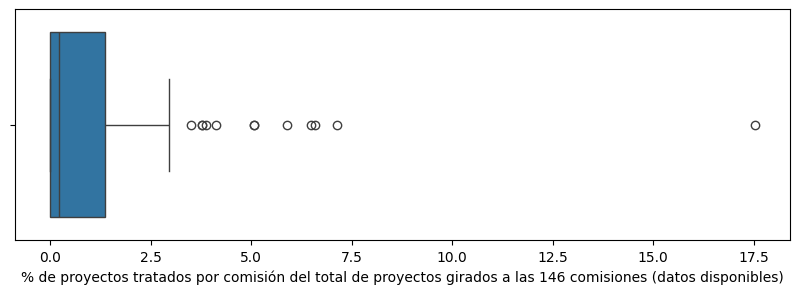

In [121]:
plt.figure(figsize=(10, 3))
sns.boxplot(prop_proyCom_df,
 x = 'proportion'
)
plt.xlabel("% de proyectos tratados por comisión del total de proyectos girados a las 146 comisiones (datos disponibles)")


In [122]:
# Rango intercuartílico (IQR)
# Calculate the percentiles
seventy_fifth = quartiles[0.75]
twenty_fifth = quartiles[0.25]

# Obtain IQR
iqr = seventy_fifth - twenty_fifth

# Upper and lower thresholds
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

# Subset the dataset
outliers = prop_proyCom_df[(prop_proyCom_df['proportion'] < lower) | (prop_proyCom_df['proportion'] > upper)]
outliers.head()


comision_nombre_norm  count  proportion
0         PRESUPUESTO Y HACIENDA  45487       17.52
1            EDUCACION Y CULTURA  18545        7.14
2  RELACIONES EXTERIORES Y CULTO  17108        6.59
3  ACCION SOCIAL Y SALUD PUBLICA  16814        6.48
4            LEGISLACION GENERAL  15323        5.90

*  388202 estudios de proyectos en comisiones (1 a 1). Existen 259585 proyectos únicos (proyecto_id) y 146 comisiones únicas
* En base a los cuartiles del % de proyectos tratados por comisión del total de proyectos girados a las 146 comisiones
    * Menos del 25 % de las comisiones identificadas intervienen en el estudio de proyectos en comisiones. 
        * Se detaca, por comportamiento atípico al intevernenir en mayor cantidad proyectos, las comisiones : PRESUPUESTO Y HACIENDA (17.52%), EDUCACION Y CULTURA (7.14%), RELACIONES EXTERIORES Y CULTO (6.59), ACCION SOCIAL Y SALUD PUBLICA (6.48),LEGISLACION GENERAL(5.90)

In [123]:
# Sumamos a memoria
prop_proyCom_df.columns = ['comision_nombre_norm', 'cant_proy_CP', '%_CP']
fuzz_comisiones_df = pd.merge (fuzz_comisiones_df, prop_proyCom_df,  how='left', left_on='comision_nombre_norm' , right_on = 'comision_nombre_norm')

In [124]:
# Guardamos el archivo binario comisiones relacionadas por similitud de nombre + peso por datos disponibles
with open('com_fuzz_comisiones_df_20241031.pkl', 'wb') as file:
    pickle.dump(fuzz_comisiones_df,file)

#### Analizamos correlaciones para ver relaciones: 
* Existencia = ¿Existe relación entre %_CP  de comision con periodo_inicio? ¿Existe relación entre %_CP  de comision con periodo_final?
* Dinámica = ¿Existe relación entre %_CP y las métricas de centralidad de las comisiones en la red de giros de proyectos? 
* Tipo de comisión =  ¿Existe relación entre %_CP  de comision con tipo de comision?
* Categ de comisión =  ¿Existe relación entre %_CP  de comision con categ_OrtizDeRosa_Shugart? ¿Existe relación entre %_CP  de comision con categ_louvain_LevenshteinMayor_60?


In [125]:
# Chequeamos tipos de variables
fuzz_comisiones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   comision_nombre_norm               153 non-null    object  
 1   fuzz_match                         153 non-null    object  
 2   fuzz_score                         153 non-null    float64 
 3   categ_louvain_LevenshteinMayor_60  153 non-null    float64 
 4   categ_louvain_dinamica             146 non-null    float64 
 5   degree                             146 non-null    float64 
 6   centrality                         146 non-null    float64 
 7   eigenvector                        146 non-null    float64 
 8   pagerank                           146 non-null    float64 
 9   betweenness                        146 non-null    float64 
 10  categ_agg_ward_k7                  146 non-null    float64 
 11  categ_agg_ward_k4                  146 non-nu

In [126]:
# Controlar nulos
fuzz_comisiones_df.isnull().sum().sort_values(ascending=False)

fecha_inicio                         98
fecha_finalizacion                   98
comision_nombre                      98
categ_OrtizDeRosa_Shugart            98
comision_grupo                       98
eigenvector                           7
degree                                7
centrality                            7
%_CP                                  7
cant_proy_CP                          7
categ_agg_ward_k7                     7
betweenness                           7
categ_louvain_dinamica                7
categ_agg_ward_k4                     7
pagerank                              7
categ_louvain_LevenshteinMayor_60     0
comision_nombre_norm                  0
fuzz_match                            0
fuzz_score                            0
id                                    0
periodo_inicio                        0
periodo_finalizacion                  0
tipo de comision                      0
_merge                                0
dtype: int64

In [127]:
# modificamos
values = {"cant_proy_CP": 0, '%_CP' : 0, 'pagerank':0,'centrality':0,'degree':0 ,'eigenvector':0, 'degree':0, 'betweenness':0}
fuzz_comisiones_df.fillna(value=values, inplace = True)

In [128]:
fuzz_comisiones_df.isnull().sum().sort_values(ascending=False)

fecha_inicio                         98
fecha_finalizacion                   98
comision_nombre                      98
categ_OrtizDeRosa_Shugart            98
comision_grupo                       98
categ_louvain_dinamica                7
categ_agg_ward_k4                     7
categ_agg_ward_k7                     7
eigenvector                           0
centrality                            0
degree                                0
categ_louvain_LevenshteinMayor_60     0
fuzz_match                            0
fuzz_score                            0
comision_nombre_norm                  0
pagerank                              0
periodo_inicio                        0
id                                    0
betweenness                           0
periodo_finalizacion                  0
tipo de comision                      0
_merge                                0
cant_proy_CP                          0
%_CP                                  0
dtype: int64

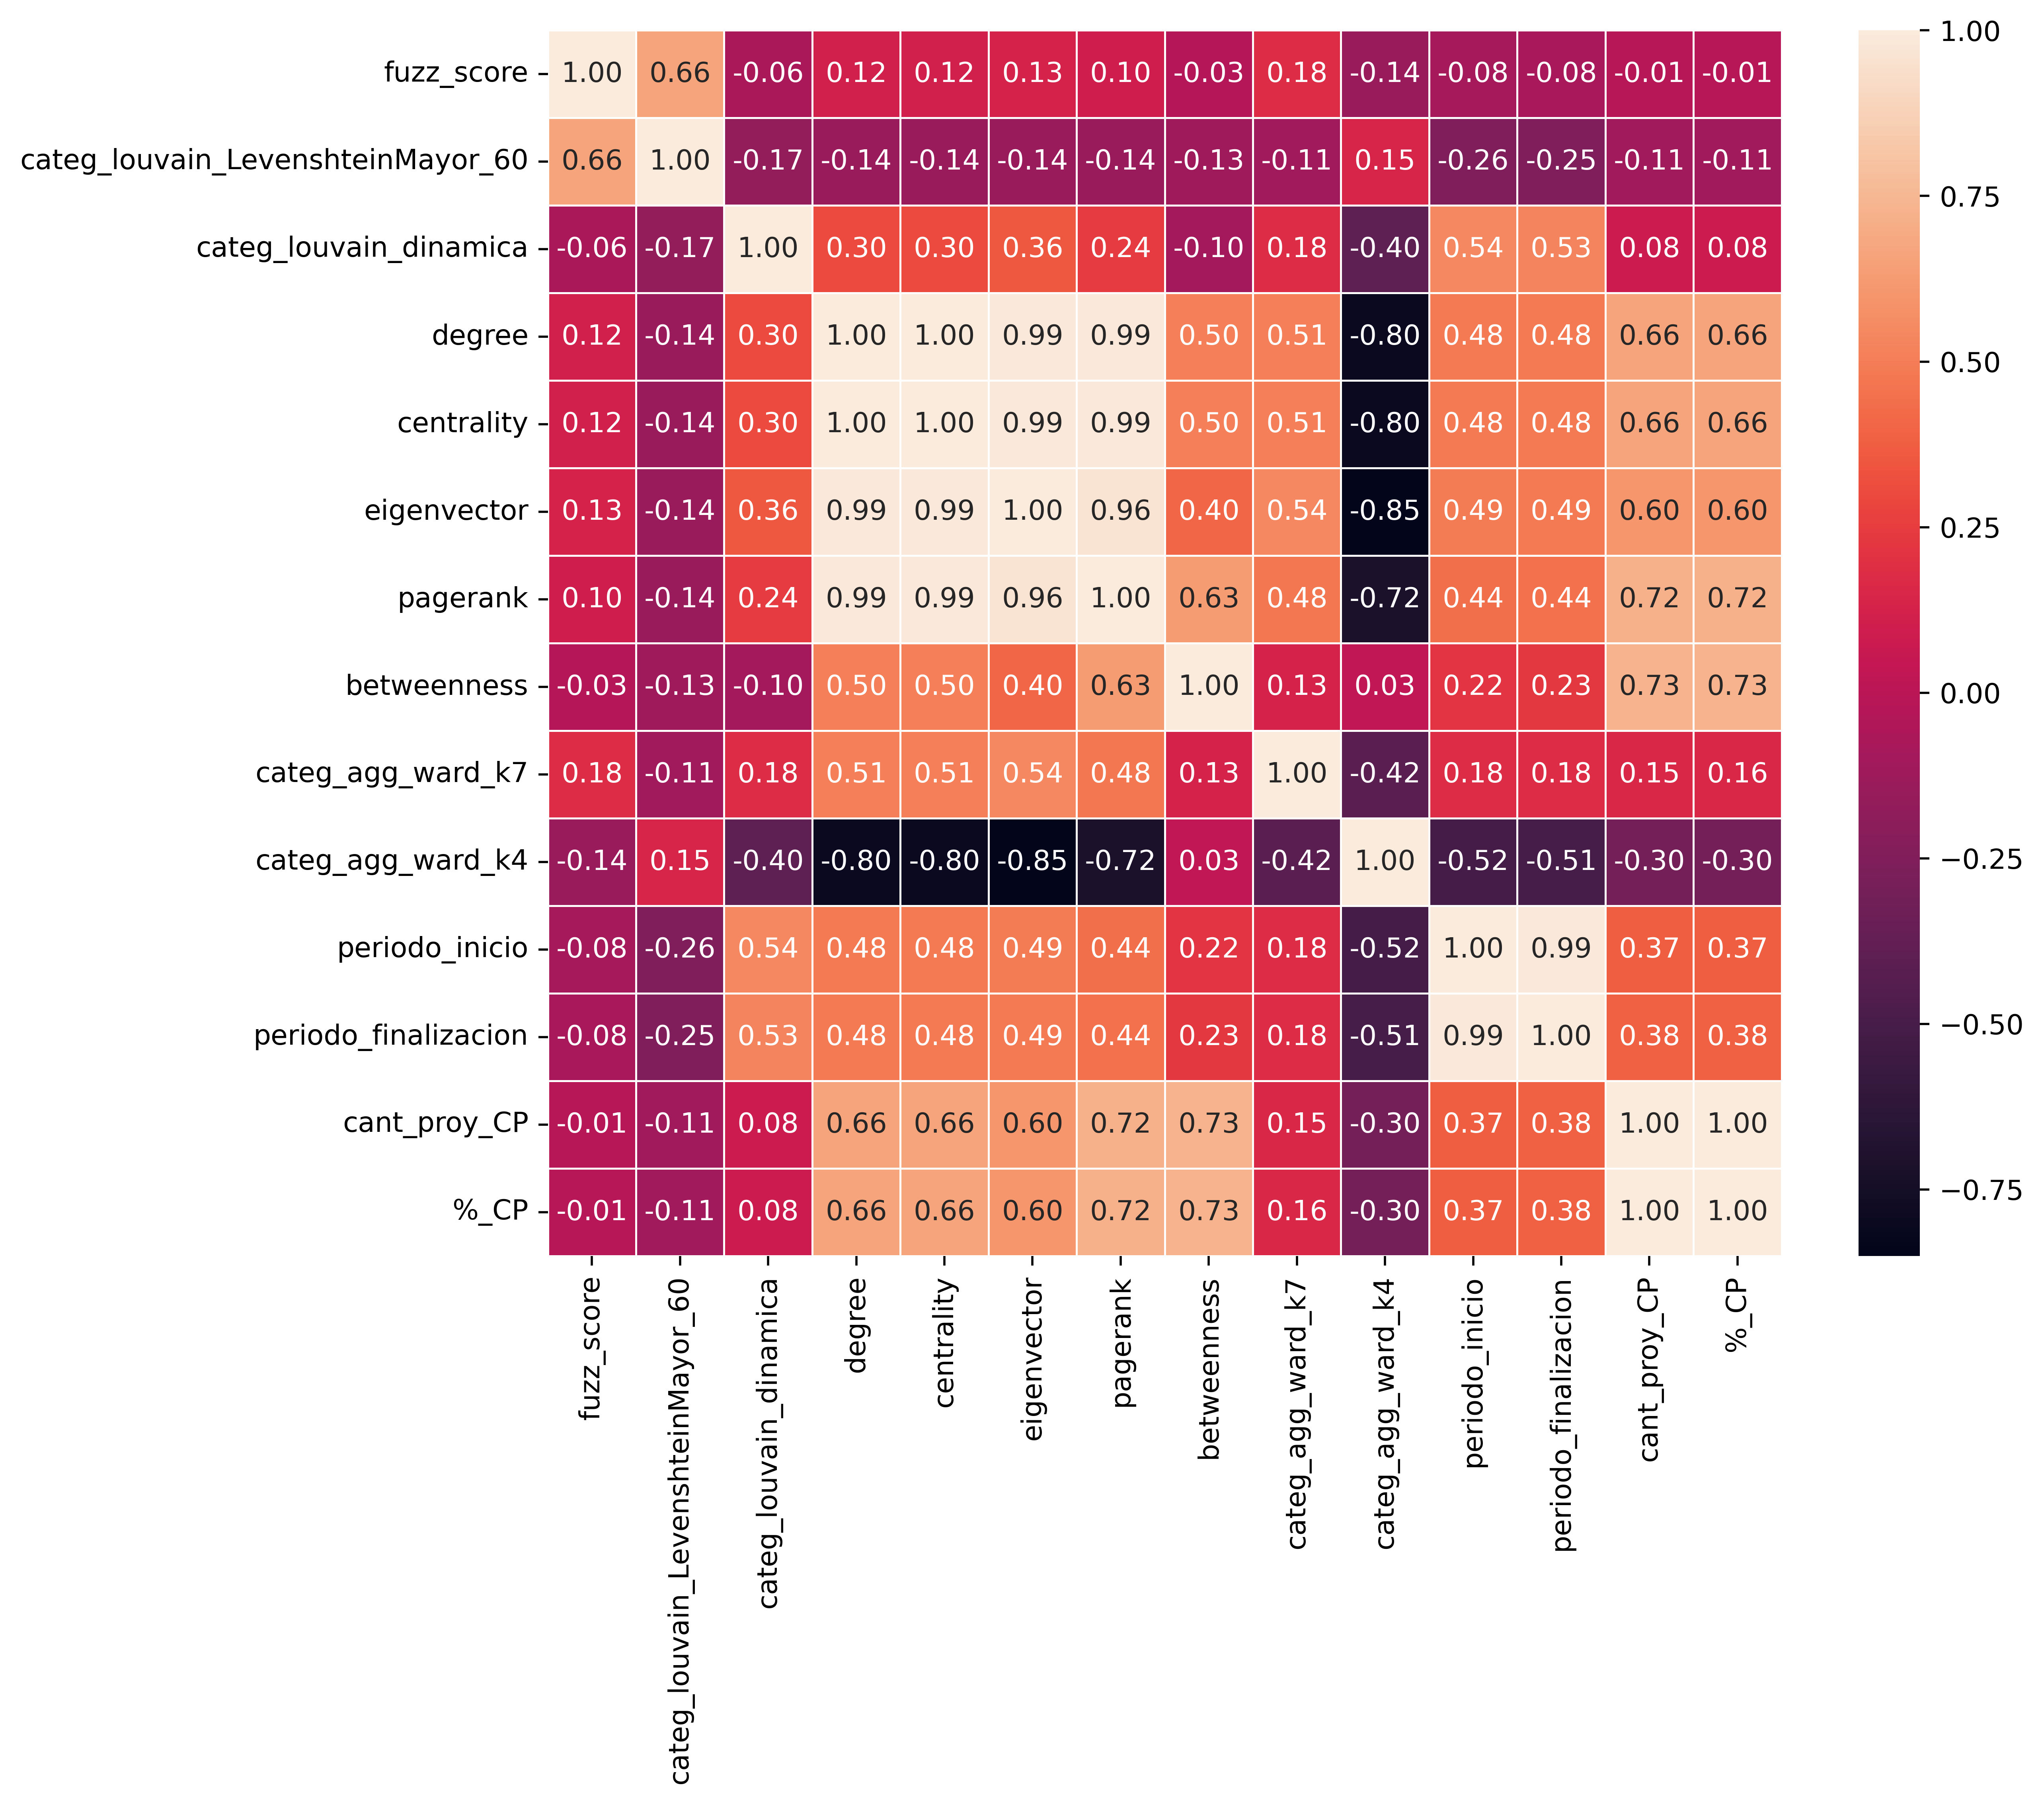

In [129]:
# pearson correlations matrix
corr = fuzz_comisiones_df.select_dtypes(include=np.number).corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings

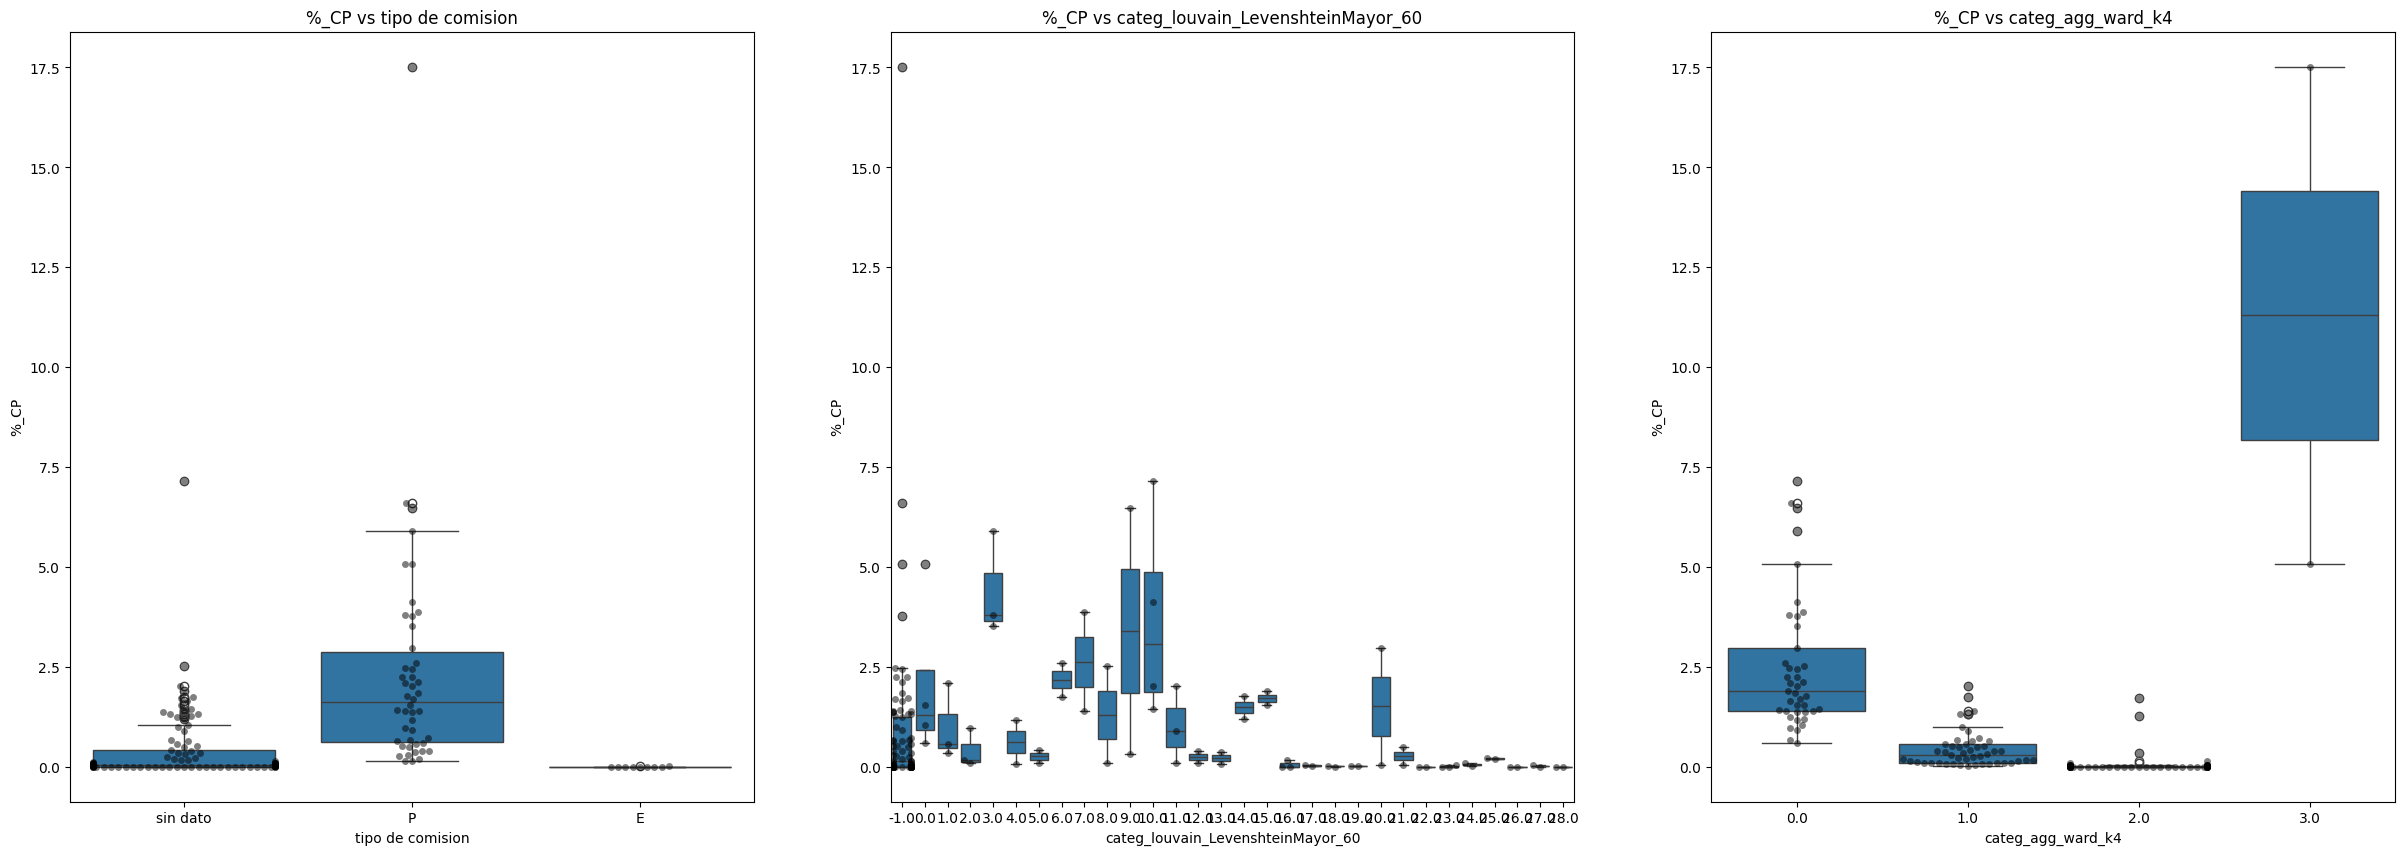

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].set_title('%_CP vs tipo de comision')
sns.boxplot(x="tipo de comision", y="%_CP", data=fuzz_comisiones_df, ax=axs[0])
sns.swarmplot(x="tipo de comision", y="%_CP", data=fuzz_comisiones_df, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('%_CP vs categ_louvain_LevenshteinMayor_60')
sns.boxplot(x="categ_louvain_LevenshteinMayor_60", y="%_CP", data=fuzz_comisiones_df, ax=axs[1])
sns.swarmplot(x="categ_louvain_LevenshteinMayor_60", y="%_CP", data=fuzz_comisiones_df, color='black',
              alpha = 0.5, ax=axs[1]);

axs[2].set_title('%_CP vs categ_agg_ward_k4')
sns.boxplot(x="categ_agg_ward_k4", y="%_CP", data=fuzz_comisiones_df, ax=axs[2])
sns.swarmplot(x="categ_agg_ward_k4", y="%_CP", data=fuzz_comisiones_df, color='black',
              alpha = 0.5, ax=axs[2]);

C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


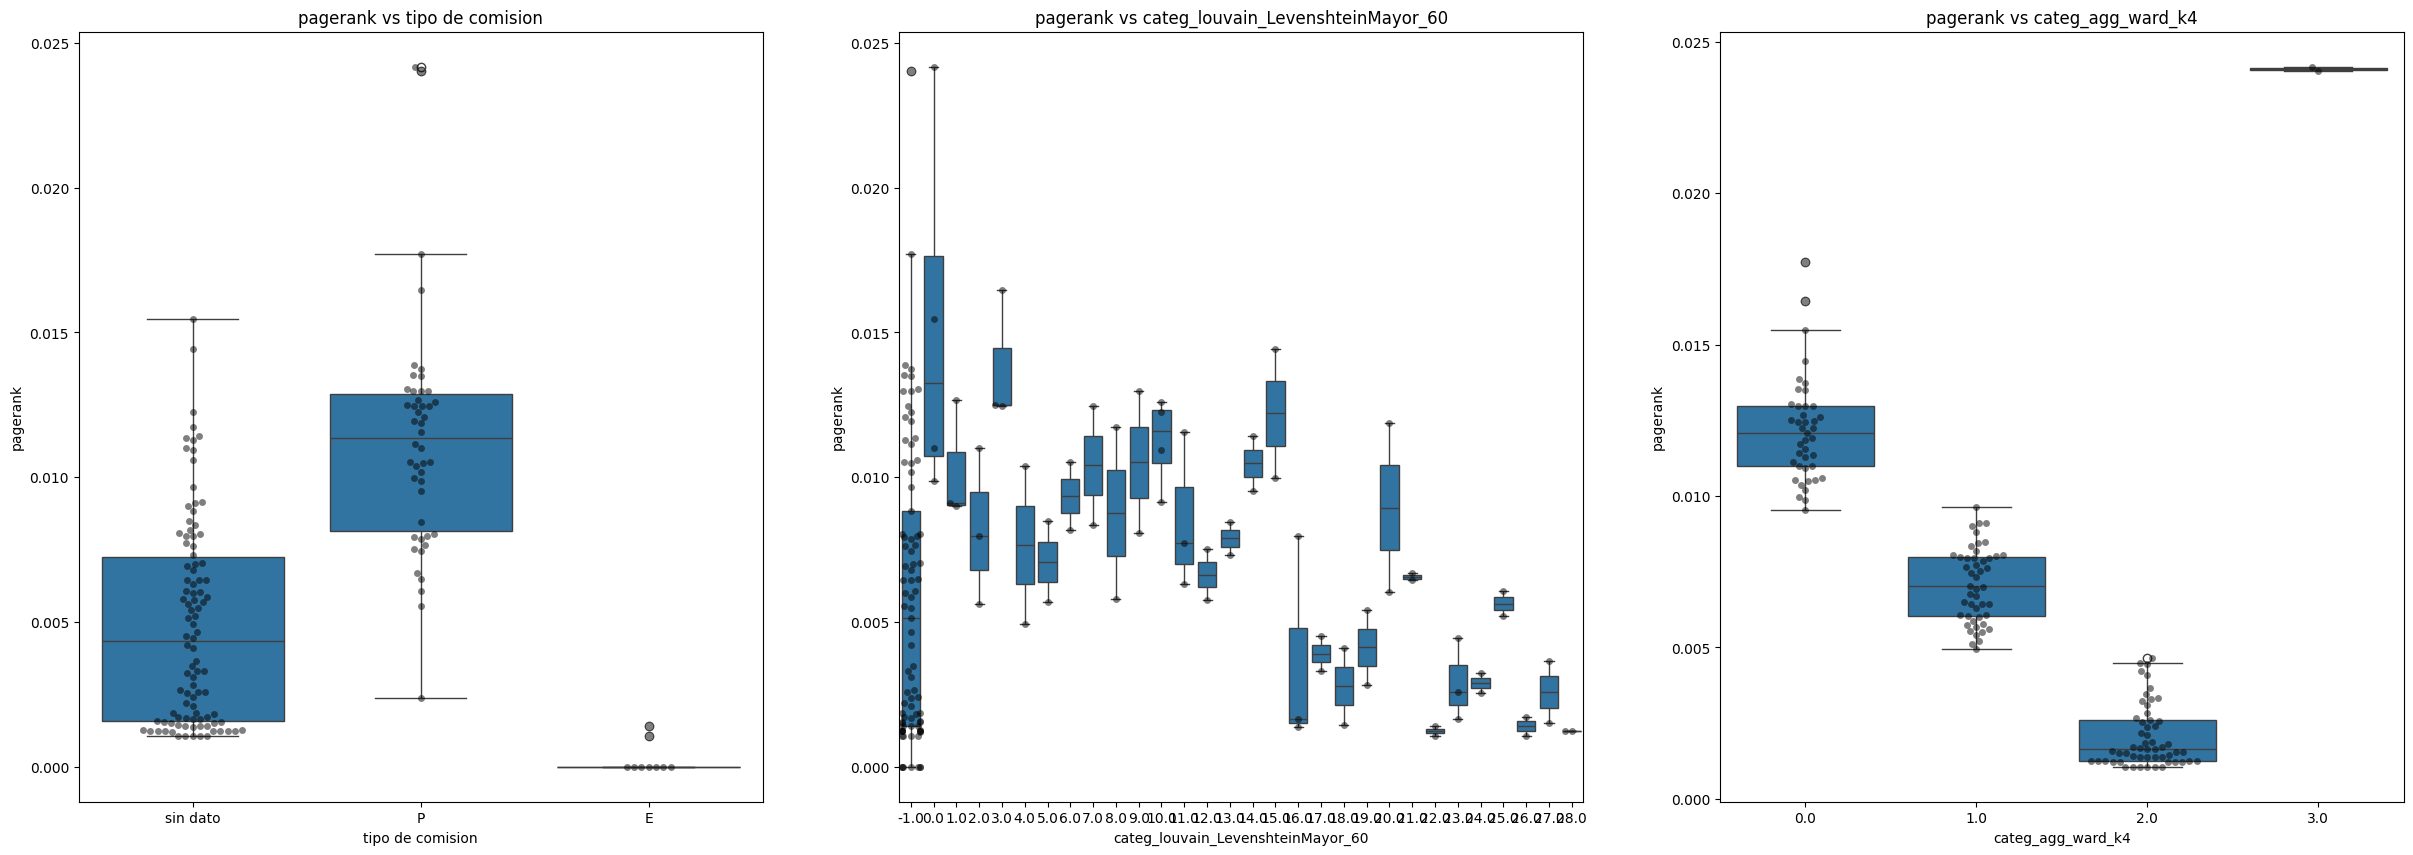

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
axs[0].set_title('pagerank vs tipo de comision')
sns.boxplot(x="tipo de comision", y="pagerank", data=fuzz_comisiones_df, ax=axs[0])
sns.swarmplot(x="tipo de comision", y="pagerank", data=fuzz_comisiones_df, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('pagerank vs categ_louvain_LevenshteinMayor_60')
sns.boxplot(x="categ_louvain_LevenshteinMayor_60", y="pagerank", data=fuzz_comisiones_df, ax=axs[1])
sns.swarmplot(x="categ_louvain_LevenshteinMayor_60", y="pagerank", data=fuzz_comisiones_df, color='black',
              alpha = 0.5, ax=axs[1]);

axs[2].set_title('pagerank vs categ_agg_ward_k4')
sns.boxplot(x="categ_agg_ward_k4", y="pagerank", data=fuzz_comisiones_df, ax=axs[2])
sns.swarmplot(x="categ_agg_ward_k4", y="pagerank", data=fuzz_comisiones_df, color='black',
              alpha = 0.5, ax=axs[2]);

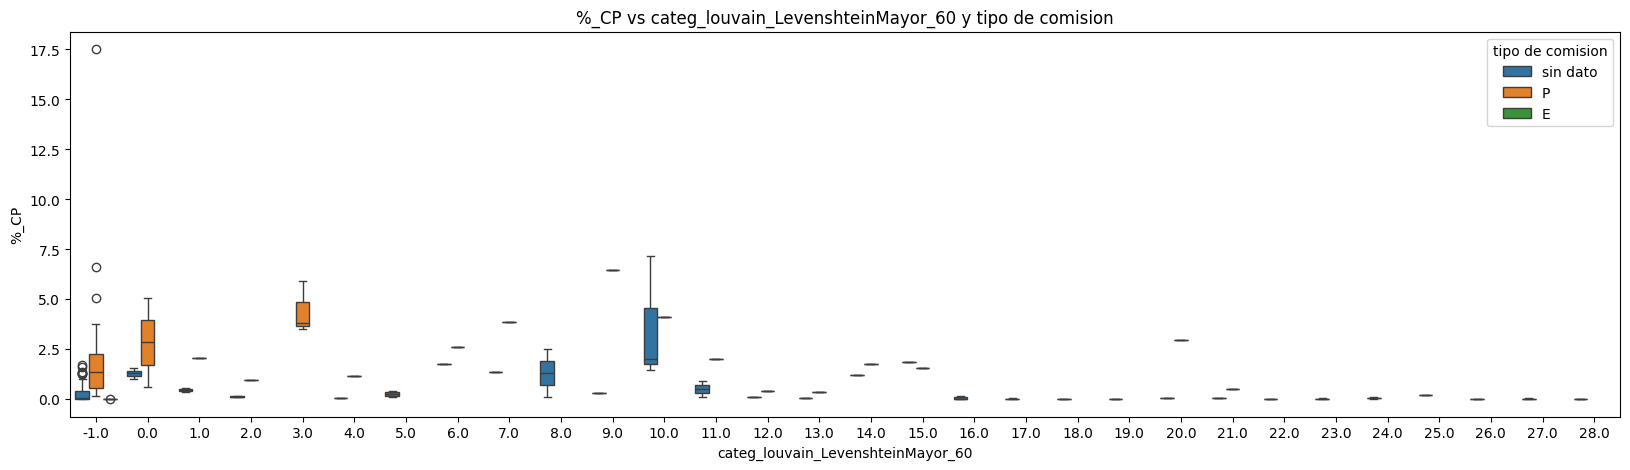

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('%_CP vs categ_louvain_LevenshteinMayor_60 y tipo de comision')
sns.boxplot(x="categ_louvain_LevenshteinMayor_60", y="%_CP", hue='tipo de comision', data=fuzz_comisiones_df, ax=ax);



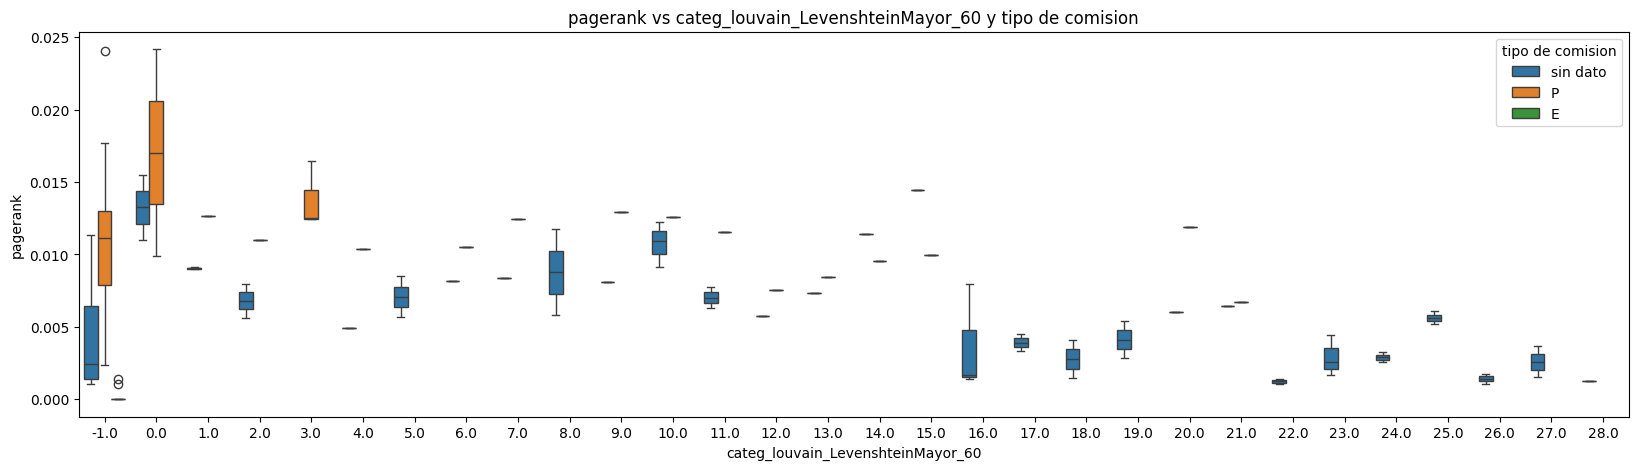

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('pagerank vs categ_louvain_LevenshteinMayor_60 y tipo de comision')
sns.boxplot(x="categ_louvain_LevenshteinMayor_60", y="pagerank", hue='tipo de comision', data=fuzz_comisiones_df, ax=ax);

Text(0.5, 0, 'categ_OrtizDeRosa_Shugart')

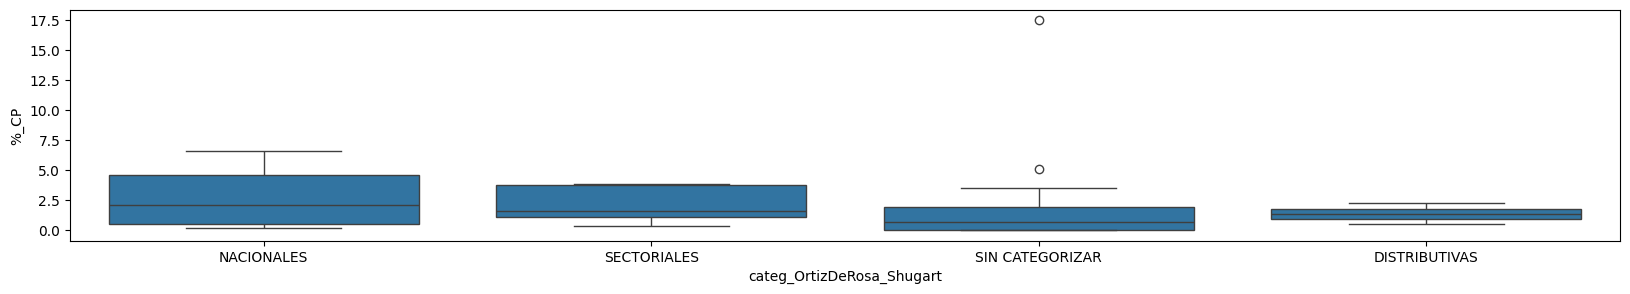

In [134]:
plt.figure(figsize=(20, 3))
sns.boxplot(fuzz_comisiones_df,
 x = 'categ_OrtizDeRosa_Shugart', y = '%_CP'
)
plt.ylabel("%_CP")
plt.xlabel("categ_OrtizDeRosa_Shugart")

Text(0.5, 0, 'categ_OrtizDeRosa_Shugart')

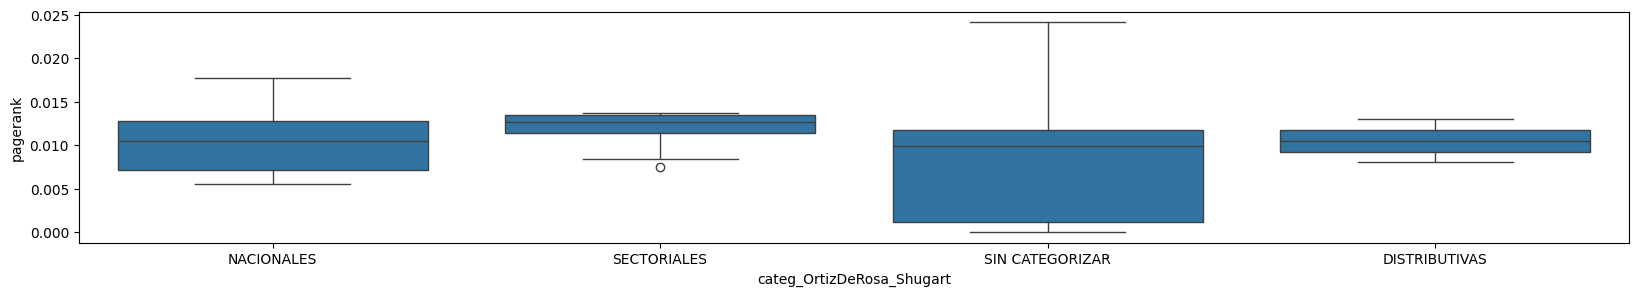

In [135]:
plt.figure(figsize=(20, 3))
sns.boxplot(fuzz_comisiones_df,
 x = 'categ_OrtizDeRosa_Shugart', y = 'pagerank'
)
plt.ylabel("pagerank")
plt.xlabel("categ_OrtizDeRosa_Shugart")

Text(0.5, 0, 'categ_louvain_dinamica')

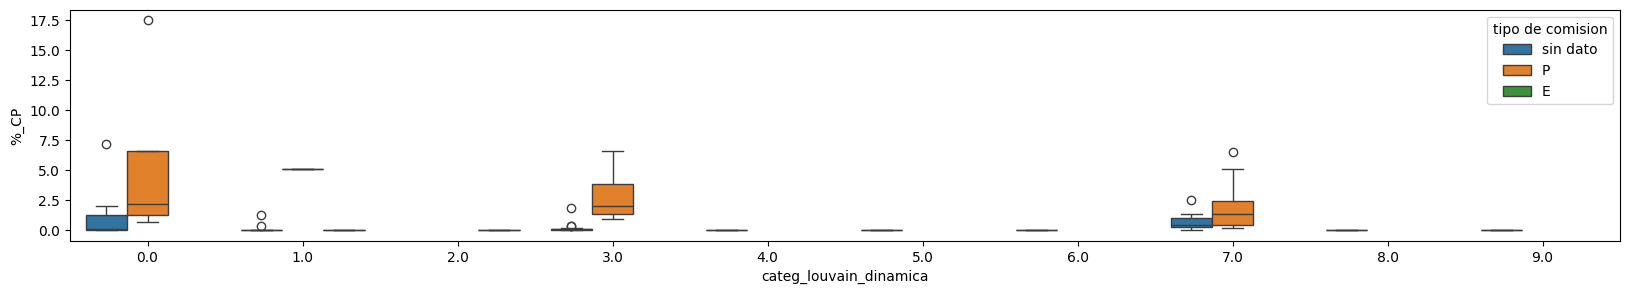

In [136]:
plt.figure(figsize=(20, 3))
sns.boxplot(fuzz_comisiones_df,
 x = 'categ_louvain_dinamica', y = '%_CP', hue='tipo de comision'
)
plt.ylabel("%_CP")
plt.xlabel("categ_louvain_dinamica")

Text(0.5, 0, 'categ_agg_ward_k4')

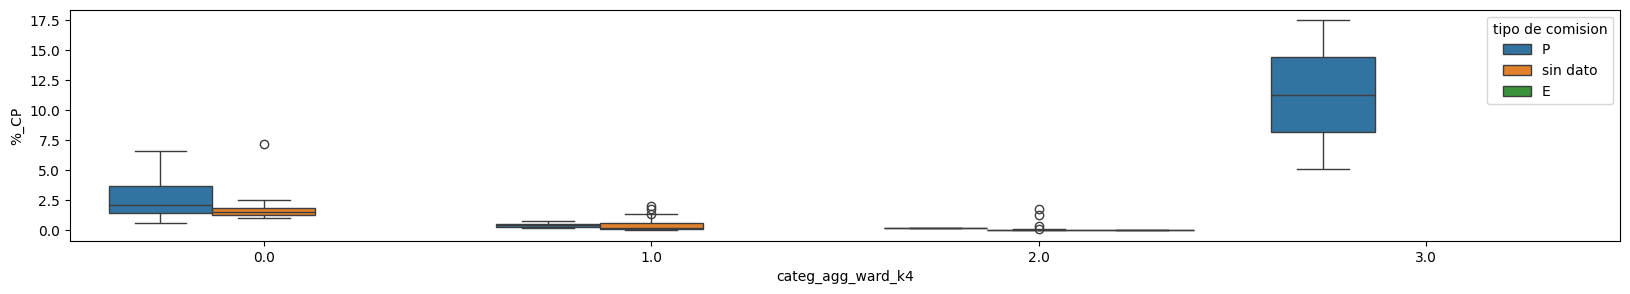

In [137]:
plt.figure(figsize=(20, 3))
sns.boxplot(fuzz_comisiones_df,
 x = 'categ_agg_ward_k4', y = '%_CP', hue='tipo de comision'
)
plt.ylabel("%_CP")
plt.xlabel("categ_agg_ward_k4")

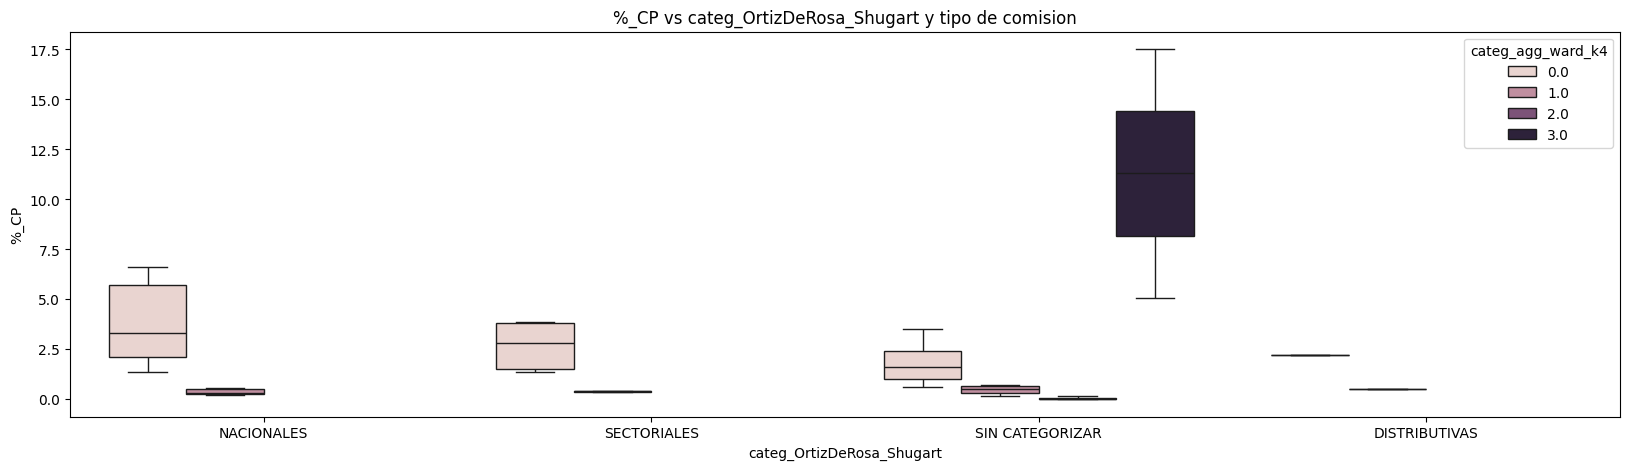

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('%_CP vs categ_OrtizDeRosa_Shugart y tipo de comision')
sns.boxplot(x="categ_OrtizDeRosa_Shugart", y="%_CP", hue='categ_agg_ward_k4', data=fuzz_comisiones_df, ax=ax);



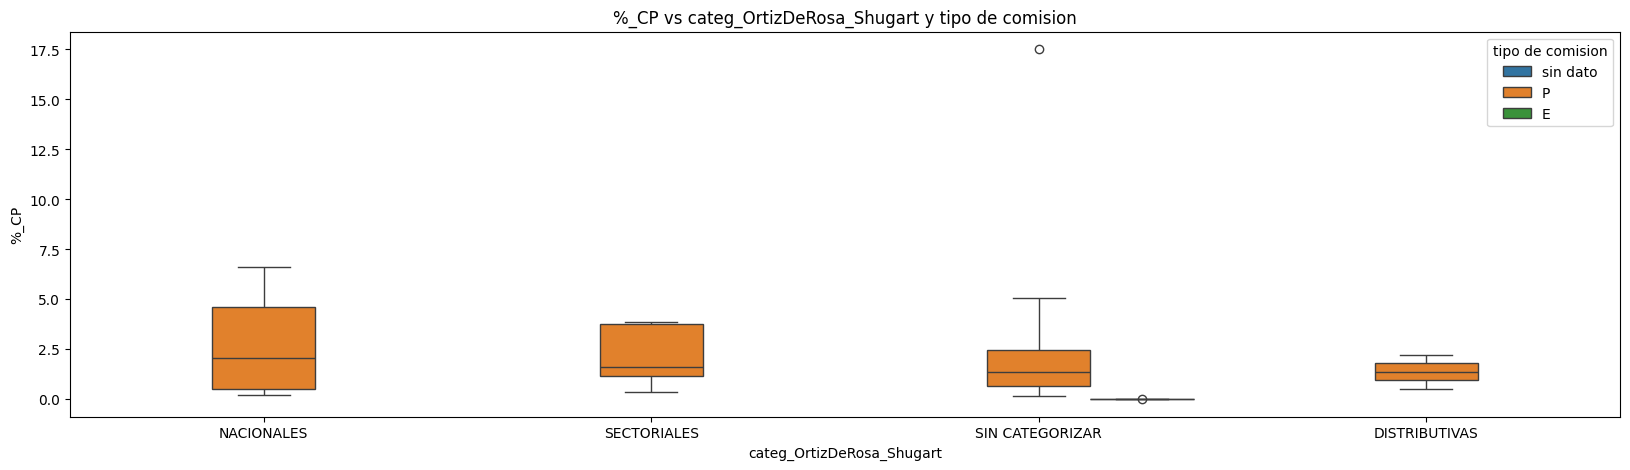

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.set_title('%_CP vs categ_OrtizDeRosa_Shugart y tipo de comision')
sns.boxplot(x="categ_OrtizDeRosa_Shugart", y="%_CP", hue='tipo de comision', data=fuzz_comisiones_df, ax=ax);

In [140]:
print('%_CP media y desviación típica por tipo de comision')
display(fuzz_comisiones_df.groupby('tipo de comision')['%_CP'].agg(['mean', 'std']))
print('%_CP media y desviación típica por categ_louvain_LevenshteinMayor_60')
display(fuzz_comisiones_df.groupby('categ_louvain_LevenshteinMayor_60')['%_CP'].agg(['mean', 'std']))



%_CP media y desviación típica por tipo de comision


mean       std
tipo de comision                    
E                 0.001111  0.003333
P                 2.361739  2.872454
sin dato          0.417347  0.898118

%_CP media y desviación típica por categ_louvain_LevenshteinMayor_60


mean       std
categ_louvain_LevenshteinMayor_60                    
-1.0                               0.868353  2.145854
 0.0                               2.060000  2.043119
 1.0                               0.996667  0.944052
 2.0                               0.403333  0.483356
 3.0                               4.400000  1.306560
 4.0                               0.610000  0.777817
 5.0                               0.255000  0.233345
 6.0                               2.170000  0.608112
 7.0                               2.625000  1.760696
 8.0                               1.295000  1.718269
 9.0                               3.395000  4.362849
 10.0                              3.685000  2.575688
 11.0                              1.003333  0.965004
 12.0                              0.235000  0.219203
 13.0                              0.215000  0.219203
 14.0                              1.485000  0.403051
 15.0                              1.710000  0.240416
 16.0                              0.053333  0.092376
 17.0                              0.025000  0.007071
 18.0                              0.010000  0.014142
 19.0                              0.015000  0.007071
 20.0                              1.505000  2.057681
 21.0                              0.265000  0.304056
 22.0                              0.000000  0.000000
 23.0                              0.010000  0.017321
 24.0                              0.050000  0.042426
 25.0                              0.200000  0.014142
 26.0                              0.000000  0.000000
 27.0                              0.015000  0.021213
 28.0                              0.000000  0.000000

* Existencia = ¿Existe relación entre %_CP  de comision con periodo_inicio? ¿Existe relación entre %_CP  de comision con periodo_final?
    * No se identifica relación lineal
* Dinámica = ¿Existe relación entre %_CP y las métricas de centralidad de las comisiones en la red de giros de proyectos?
    * Se observa que pagerank presenta correlación con las metricas de centralidad y %_CP
             
* Tipo de comisión =  ¿Existe relación entre %_CP  de comision con tipo de comision?
  
    * Podría existir alguna relación entre %_CP y tipo de comisión permanente
    * A partir de la representación gráfica y el cálculo de las medias se puede intuir que existe una diferencia y también distribuciones asimetricas con presencia de outliers
    
* Categ de comisión =  ¿Existe relación entre %_CP  de comision con categ_OrtizDeRosa_Shugart? ¿Existe relación entre %_CP  de comision con categ_louvain_LevenshteinMayor_60?
  
    * Podría existir alguna relación entre %_CP y comision con categ_louvain_LevenshteinMayor_60, particularmente con grupos: -1,0,1,3,7 a 11, 20
    * A partir de la representación gráfica y el cálculo de las medias se puede intuir que existe una diferencia y también distribuciones asimetricas con presencia de outliers

In [141]:
# Import libraries
from scipy import stats


#### Estadística
A pesar de que el ANOVA es bastante robusto aun cuando existe cierta falta de normalidad, si la simetría es muy pronunciada y el tamaño de cada grupo no es muy grande, se puede recurrir en su lugar al test no paramétrico prueba H de Kruskal-Wallis. Con frecuencia se recomienda mantenerse con ANOVA a no ser que la falta de normalidad sea muy extrema.

La prueba H de Kruskal-Wallis prueba la hipótesis nula de que la mediana poblacional de todos los grupos es igual. Es una versión no paramétrica de ANOVA. La prueba funciona con 2 o más muestras independientes, que pueden tener diferentes tamaños. Tenga en cuenta que rechazar la hipótesis nula no indica cuál de los grupos difiere. Se requieren comparaciones post hoc entre grupos para determinar qué grupos son diferentes.


**Tipo de comisión**

Hipótesis nula (HN): La media poblacional %_CP por tipo de comisión (grupo) es igual.
Rechazó de HN : El test encuentra significancia en la diferencia de al menos dos grupos (2.306705954092886e-15) 



In [142]:
# https://cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
# Definiendo grupo por tipo de comision
data_group1 = fuzz_comisiones_df.loc[fuzz_comisiones_df['tipo de comision']=='E','%_CP'].values
data_group2 = fuzz_comisiones_df.loc[fuzz_comisiones_df['tipo de comision']=='P','%_CP'].values
data_group3 = fuzz_comisiones_df.loc[fuzz_comisiones_df['tipo de comision']=='sin dato','%_CP'].values
 
# Kruskal-Wallis Test 
result = stats.kruskal(data_group1, data_group2, data_group3)
 
# Print the result
print(result)


KruskalResult(statistic=np.float64(67.40591176394614), pvalue=np.float64(2.306705954092886e-15))


In [143]:
fuzz_comisiones_df.columns

Index(['comision_nombre_norm', 'fuzz_match', 'fuzz_score',
       'categ_louvain_LevenshteinMayor_60', 'categ_louvain_dinamica', 'degree',
       'centrality', 'eigenvector', 'pagerank', 'betweenness',
       'categ_agg_ward_k7', 'categ_agg_ward_k4', 'id', 'comision_nombre',
       'comision_grupo', 'periodo_inicio', 'periodo_finalizacion',
       'fecha_inicio', 'fecha_finalizacion', 'tipo de comision',
       'categ_OrtizDeRosa_Shugart', '_merge', 'cant_proy_CP', '%_CP'],
      dtype='object')

Hipótesis nula (HN): La media poblacional pagerank por tipo de comisión (grupo) es igual. Rechazó de HN : El test encuentra significancia en la diferencia de al menos dos grupos ((9.048827221280558e-17) 

In [144]:
# https://cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
# Definiendo grupo por tipo de comision
data_group1 = fuzz_comisiones_df.loc[fuzz_comisiones_df['tipo de comision']=='E','pagerank'].values
data_group2 = fuzz_comisiones_df.loc[fuzz_comisiones_df['tipo de comision']=='P','pagerank'].values
data_group3 = fuzz_comisiones_df.loc[fuzz_comisiones_df['tipo de comision']=='sin dato','pagerank'].values
 
# Kruskal-Wallis Test 
result = stats.kruskal(data_group1, data_group2, data_group3)
 
# Print the result
print(result)


KruskalResult(statistic=np.float64(73.88262284078615), pvalue=np.float64(9.048827221280558e-17))


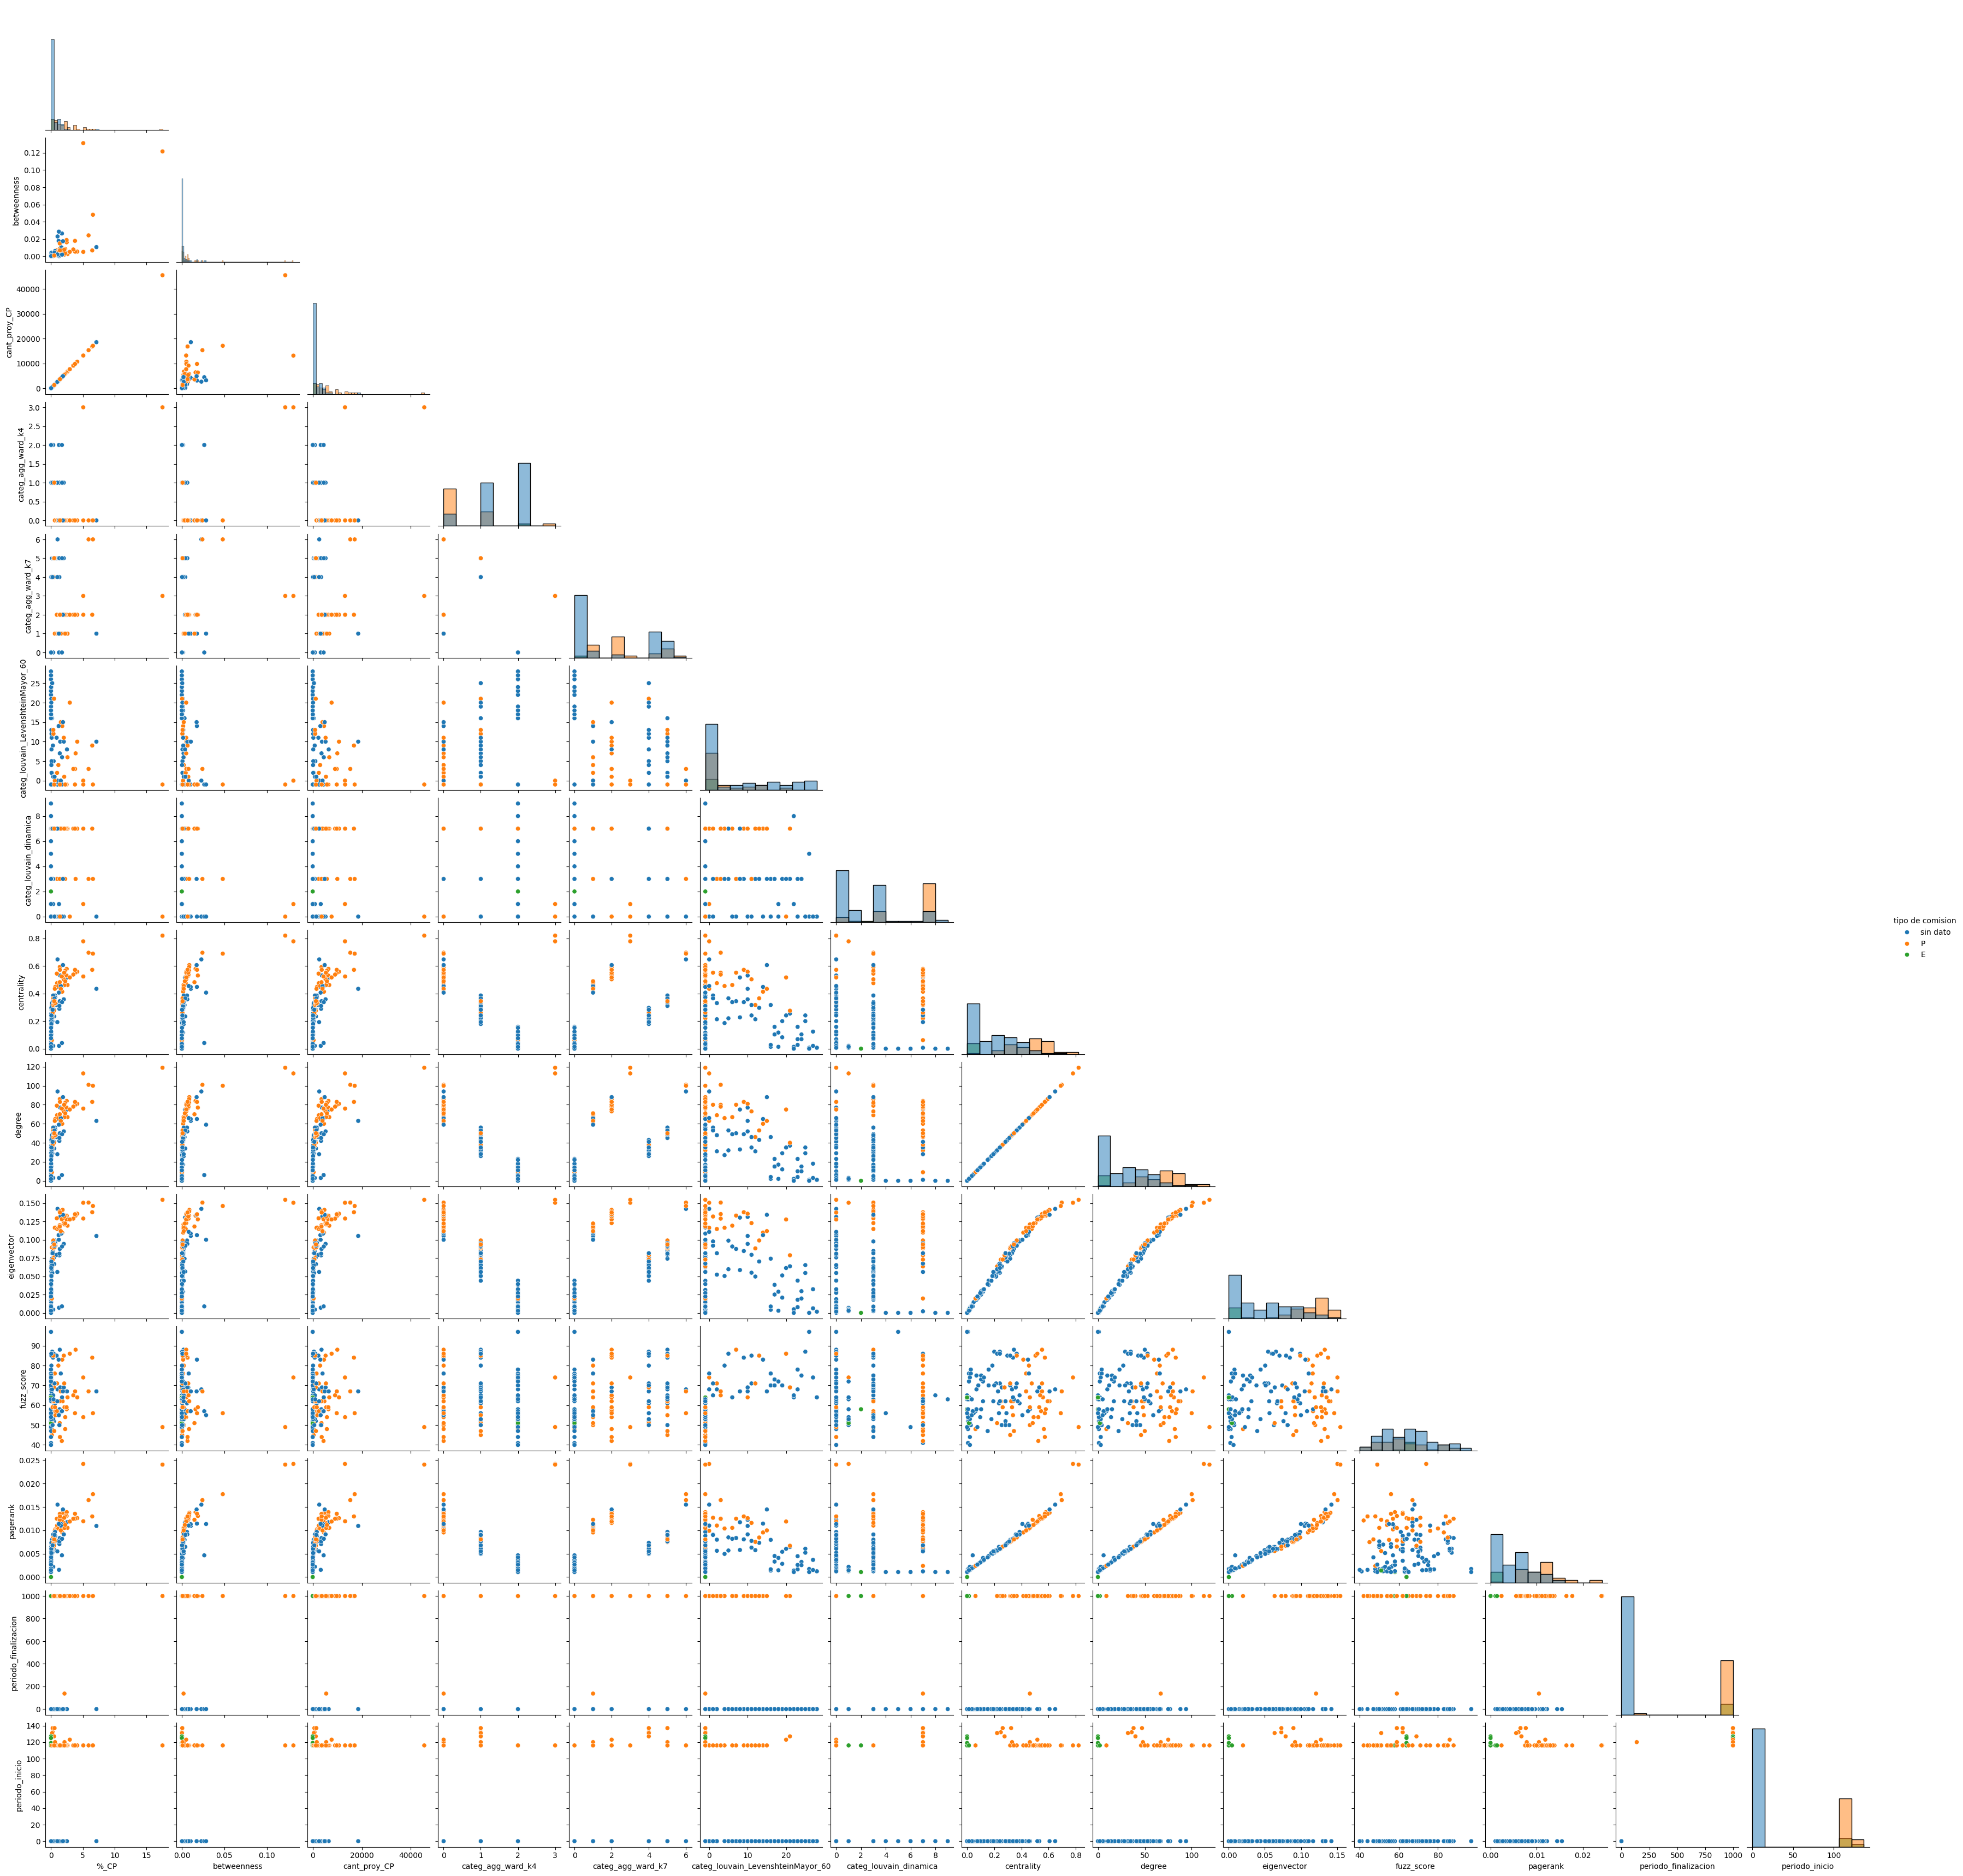

In [145]:
column = fuzz_comisiones_df.select_dtypes(include=np.number).columns.union(["tipo de comision"])
sns.pairplot(fuzz_comisiones_df[column], hue="tipo de comision", diag_kind="hist",corner=True)

#### Analizando existencia de comisiones
* ¿ Las comisiones de Tipo permanente fueron las primeras en crearse y aún en vigencia ?
* ¿Existe relación entre comisiones antiguas y vigentes con %_CP?

periodo_inicio  cant_comisiones
0           116.0               44
1           127.0                2
2           120.0                2
3           137.0                2
4           132.0                1
5           119.0                1
6           131.0                1
7           125.0                1
8           123.0                1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16644\307154338.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x='periodo_inicio', y='cant_comisiones' , data=temp, palette="tab10", linewidth=0.5,linestyle='--')


<Axes: xlabel='periodo_inicio', ylabel='Cantidad dde comisiones'>

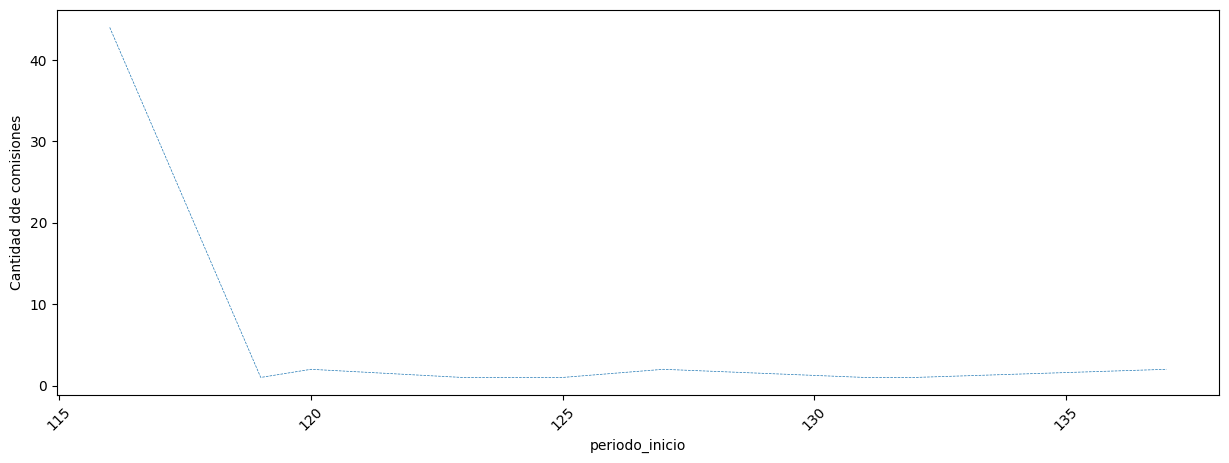

In [146]:
temp = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']>0,'periodo_inicio'].value_counts().reset_index()
temp.columns = ['periodo_inicio', 'cant_comisiones']
display(temp)
plt.figure(figsize=(15, 5))
ax = sns.lineplot(x='periodo_inicio', y='cant_comisiones' , data=temp, palette="tab10", linewidth=0.5,linestyle='--')
plt.xlabel("periodo_inicio")
plt.ylabel("Cantidad dde comisiones")
plt.xticks(rotation=45)
ax

                     

In [147]:
temp = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']>0,['periodo_inicio','periodo_finalizacion','tipo de comision']].value_counts().reset_index()
temp

periodo_inicio  periodo_finalizacion tipo de comision  count
0            116.0                 999.0                P     38
1            116.0                 999.0                E      6
2            137.0                 999.0                P      2
3            119.0                 999.0                E      1
4            120.0                 137.0                P      1
5            120.0                 999.0                P      1
6            125.0                 999.0                E      1
7            123.0                 999.0                P      1
8            127.0                 999.0                E      1
9            127.0                 999.0                P      1
10           131.0                 999.0                P      1
11           132.0                 999.0                P      1

In [148]:
# Existe 1 comision permanente que ya no continua pero cambio de nombre
fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_finalizacion']==137,]

comision_nombre_norm                   fuzz_match  \
91  FAMILIA MUJER NINEZ Y ADOLESCENCIA  FAMILIAS NINEZ Y JUVENTUDES   

    fuzz_score  categ_louvain_LevenshteinMayor_60  categ_louvain_dinamica  \
91        59.0                               -1.0                     7.0   

    degree  centrality  eigenvector  pagerank  betweenness  ...  \
91    67.0    0.462069     0.120949   0.01049     0.001977  ...   

    comision_grupo  periodo_inicio periodo_finalizacion fecha_inicio  \
91              CD           120.0                137.0   09/05/2002   

   fecha_finalizacion  tipo de comision  categ_OrtizDeRosa_Shugart _merge  \
91         20/12/2019                 P                 NACIONALES   both   

   cant_proy_CP  %_CP  
91       5500.0  2.12  

[1 rows x 24 columns]

In [149]:
fuzz_comisiones_df[fuzz_comisiones_df['comision_nombre_norm']== 'FAMILIAS NINEZ Y JUVENTUDES']

comision_nombre_norm                          fuzz_match  \
94  FAMILIAS NINEZ Y JUVENTUDES  FAMILIA MUJER NINEZ Y ADOLESCENCIA   

    fuzz_score  categ_louvain_LevenshteinMayor_60  categ_louvain_dinamica  \
94        59.0                               -1.0                     7.0   

    degree  centrality  eigenvector  pagerank  betweenness  ...  \
94    38.0    0.262069     0.072862  0.006487     0.000597  ...   

    comision_grupo  periodo_inicio periodo_finalizacion fecha_inicio  \
94              CD           137.0                999.0   20/12/2019   

   fecha_finalizacion  tipo de comision  categ_OrtizDeRosa_Shugart _merge  \
94                  0                 P                 NACIONALES   both   

   cant_proy_CP  %_CP  
94        667.0  0.26  

[1 rows x 24 columns]

<Axes: title={'center': '%_CP vs periodo_inicio'}, xlabel='periodo_inicio', ylabel='%_CP'>

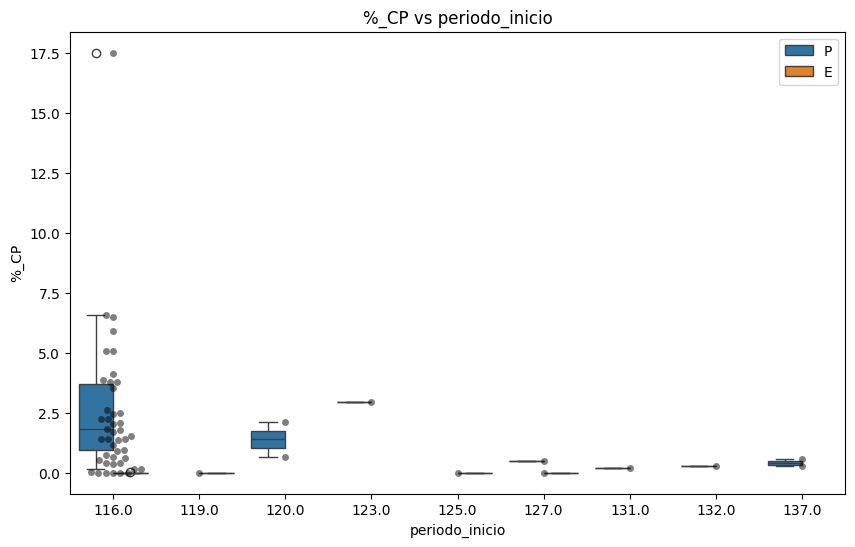

In [150]:
# Si periodo de inicio es 0 es porque no se pudo identificar, no hay información base asociada
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('%_CP vs periodo_inicio')
sns.boxplot(x="periodo_inicio", y="%_CP", hue = 'tipo de comision', data=fuzz_comisiones_df[fuzz_comisiones_df['periodo_inicio']>0], ax=ax)
sns.swarmplot(x="periodo_inicio", y="%_CP", data=fuzz_comisiones_df[fuzz_comisiones_df['periodo_inicio']>0], color='black',
              alpha = 0.5, ax=ax)

* ¿ Las comisiones de Tipo permanente fueron las primeras en crearse y aún en vigencia ? FALSO
Si bien la mayoria se crearon en el período 116 ( identificado como el más antiguo), se identifica la creación comisión 'P' para el periodo 132.
Si asumismo que el cambio de nombre influye en que las comisiones 'P' se consideren vigentes, se  observa la comisión FAMILIA MUJER NINEZ Y ADOLESCENCIA que dejo de estar vigente (120-137), pero cambio de nombre por FAMILIAS NINEZ Y JUVENTUDES que se en el periodo 137 y sigue vigente.

*¿Existe relación entre comisiones antiguas y vigentes con %_CP?
Habría diferencia entre medianas de %_CP por periodo de inicio


**periodo_inicio**

Hipótesis nula (HN): La media poblacional %_CP por periodo_inicio (grupo) es igual.
Se Acepta HN, o sea, que el test no encuentra significancia en la diferencia de al menos dos grupos (0.17563594917310588) . Ver el tema de cantidad de datos

In [151]:
# https://cienciadedatos.net/documentos/pystats09-analisis-de-varianza-anova-python
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
# Definiendo grupo por tipo de comision
data_group1 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==116,'%_CP'].values
data_group2 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==119,'%_CP'].values
data_group3 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==120,'%_CP'].values
data_group4 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==123,'%_CP'].values
data_group5 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==125,'%_CP'].values
data_group6 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==127,'%_CP'].values
data_group7 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==131,'%_CP'].values
data_group8 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==132,'%_CP'].values
data_group9 = fuzz_comisiones_df.loc[fuzz_comisiones_df['periodo_inicio']==137,'%_CP'].values


# Kruskal-Wallis Test 
result = stats.kruskal(data_group1, data_group2, data_group3,data_group4,data_group5,data_group6,data_group7,data_group8,data_group9)
 
# Print the result
print(result)

KruskalResult(statistic=np.float64(11.486323170912264), pvalue=np.float64(0.17563594917310588))


In [152]:
# Guardamos el archivo binario comisiones relacionadas por similitud de nombre + peso por datos disponibles
with open('com_fuzz_comisiones_df_20241031.pkl', 'wb') as file:
    pickle.dump(fuzz_comisiones_df,file)